# Analysis of CAM Parkinson's Study

## Technical Writeup

### Introduction

This project is an analysis of a five year Complementary and Alternative Medicine (CAM) longitudinal study of 1,700 Parkinson’s patients from around the world. Patients completed a survey every six months for up to 11 iterations, totaling 5149 entries. 

The clinician's attitude about Parkinson's is changing due to research into the progression of the disease. While doctors have relied on motor-based symptoms to diagnose and track Parkinson's progression, patients themselves report other symptoms as being significant indicators. As motor-based symptoms may appear only in later stages, diagnosis could be delayed. It would be better if doctors and their patients were tracking the same symptoms. 

The researcher developed a number of questions to be answered:
• How does a person's symptoms change over time?
• What are the significant symptoms in each stage of the disease covered in the study?
• What are any correlations between symptoms and disease progression?
• Does deep brain stimulation treatment affect symptoms or disease progression? 
• What is the impact of loneliness on disease progression?
• What is the impact of education and income on disease progression?

### Problem statement

The researcher developed a number of questions to be answered by this analysis:
• How does a person's symptoms change over time?
• What are the significant symptoms in each stage of the disease covered in the study?
• What are any correlations between symptoms and disease progression?
• Does deep brain stimulation treatment affect symptoms or disease progression? 
• What is the impact of loneliness on disease progression?
• What is the impact of education and income on disease progression?

### Project impact

As the study research has already been published, the immediate audience of this analysis is the researcher. A meeting has been scheduled with the researcher to inform future iterations of the study. 

### Description of data

Sixty-seven columns were selected out of a much larger dataset, and include id, demographic info, symptoms, birthdate, education, and income. 

As this study was conducted in several regions around the world, weight and height needed to be standardized.  As patients completed self-reported every six months there are gaps in the reporting. As some patients condition deteriorated over time, their surveys were filled out by other people. Reporting completion therefore varies.

Analysis of the dataset required addressing a significant amount of NaNs and imputing many missing values. As the "country" column had the most NaNs, and there was no other evidence for country imputation, the analysis will not consider participant nationality. 

Study participants received a record id to anonymize their information, but those ids were not consistently entered. Luckily a computer-generated participation id was also provided. It should therefore be possible to group a participant's study entries.

A participant would ideally fill out the survey every six months, and results would not be synchronized with the entries of other participants.

There are a number of symptoms columns whose scores are summarized as a 'propd' column. This patient reported outcome measure is sum of all variables between symptoms "slow" and "nausea" in range between 0 - 100, with 0 indicating no issue. Any score less than 5 is treated as a zero for each question. 

Additionally, there are 'global' columns measuring quality of life through questions standardized by the National Institutes of Health (NIH). 

### Data preparation

Key date fields of patient birthdate, survey completion date, first diagnosis date, and first symptom date needed to be converted to datetime objects. An age column was created by subtracting birthdate from survey completion date. Some birth dates appeared as 2042 rather than 1942, and those errors were addressed through a calculation on the age column. 

Weight and height were text fields imported as strings rather than entered as numbers. Much time was taken to standardize the data, impute from errors, translate the various measurements, and convert to centimeters and kilograms in order to create a Body Mass Index (BMI) score. The BMI score could provide an indication of disease progression.

The gender column was dummied into male and female. 

The study version was converted from a string to a number. 

Entries in the consent column were corrected, and those who did not consent were dropped from the dataset. 

Several columns were renamed to aid comprehension. 'Dxpd' became 'diagnosis_date' for example. 

### Analysis

A comparison of the cleaned versus uncleaned data yielded important differences. Below is a chart indicating the number of participants in each iteration of the survey.

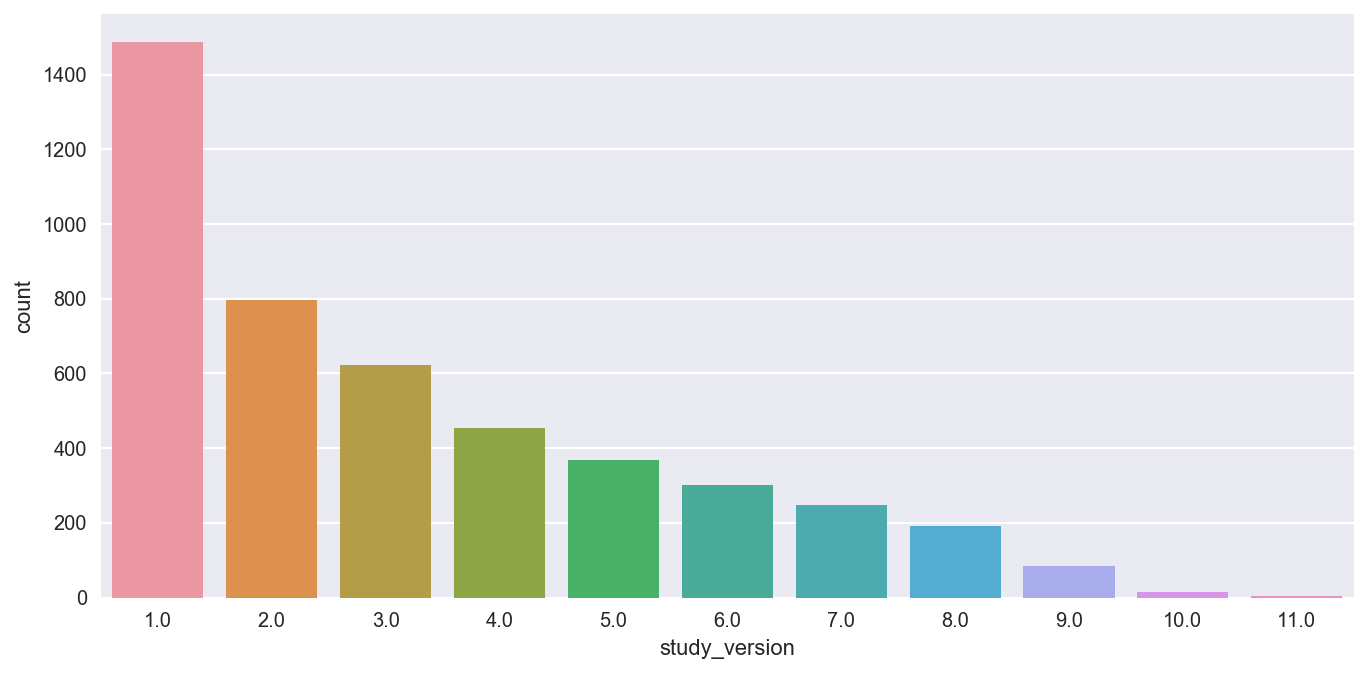

In [265]:
# Uncleaned data
fig, ax = plt.subplots(figsize =(10,5))
sns.countplot(data=df, x = 'study_version', ax=ax);

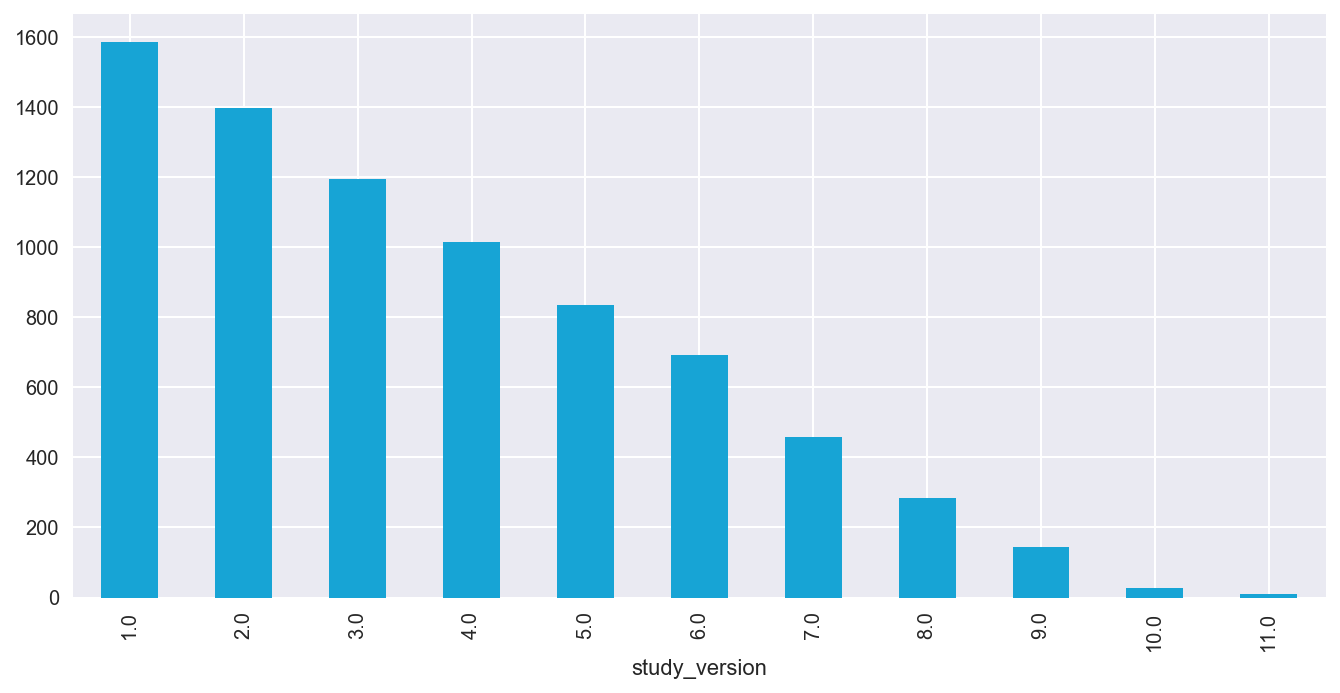

In [268]:
# Number of participants across study versions - cleaned data
fig, ax = plt.subplots(figsize =(10,5))
df_clean.groupby("study_version")['participant_id'].mean().plot(kind='bar', color='#17a4d5', ax=ax);
plt.savefig('number_in_study_versions.pdf')

The chart below indicates that gender is relatively consistent across study versions, so there is not an unbalanced class problem regarding gender. 

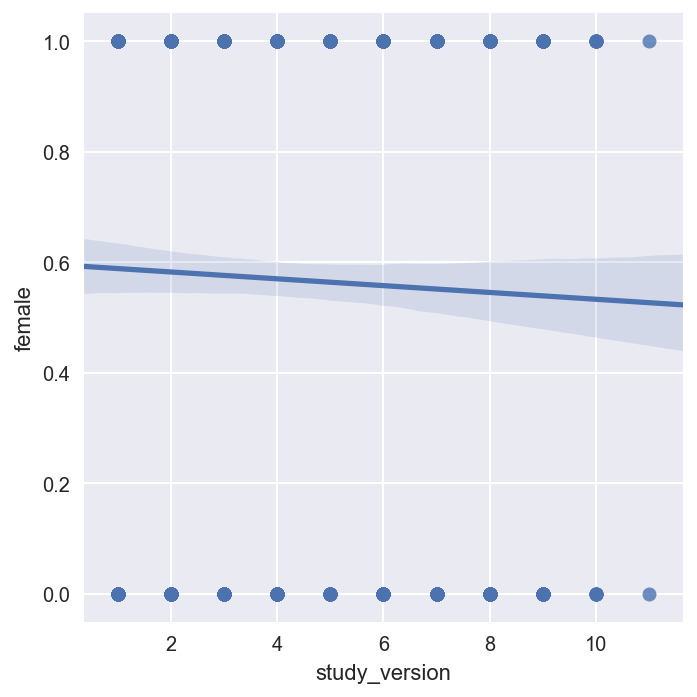

In [270]:
sns.lmplot(x='study_version', y='female', data=df_clean);

## Imports

In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_biclusters
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import lime
import impyute as impy
from pprint import pprint
from scipy.stats import chisquare
from sklearn.preprocessing import Imputer
from fancyimpute import KNN

from pandas.tools.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import missingno as msno
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
import re

import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from sklearn.svm import SVC
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.preprocessing import StandardScaler

# from feature_selector import FeatureSelector
import requests 
# import lightgbm as lgb

sns.set(font_scale=1)
sns.set(font_scale=2.5)

% matplotlib inline

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'

## Functions to print in full

In [18]:
def print_full_rows(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [ ]:
# pd.set_option('display.max_columns', None)

## Project schedule

In [273]:
df_schedule = pd.read_csv('CapstoneProjectSchedule.csv')
df_schedule

Item            Deadline  \
0                                       Define goals     Tuesday, May 22   
1   Determine actions / interventions to be informed     Tuesday, May 22   
2             Determine data in hand and data needed      Monday, May 28   
3                  Determine analyis to be completed   Wednesday, May 30   
4                                   Initial insights      Monday, June 4   
5                                      Data cleaning      Monday, July 9   
6                                Research other work  Wednesday, July 11   
7                                 Determine audience  Wednesday, July 11   
8                                 Determine modeling  Wednesday, July 11   
9                                        Test models   Thursday, July 12   
10                                  Conduct analysis     Friday, July 13   
11                                 Technical writeup     Friday, July 13   
12                                      Presentation     Monday, July 16   

       Status  
0   Completed  
1   Completed  
2   Completed  
3   Completed  
4   Completed  
5   Completed  
6   Completed  
7   Completed  
8   Completed  
9   Completed  
10  Completed  
11  Completed  
12  Completed

## Communication with researcher

Notes
I am checking in with the capstone project in class on Thursday and wanted to run by what I have so far:

Problem statement: In this five year longitudinal study, how does a person’s symptoms change over time?

Yes. And specifically, does the proportion of non-motor symptoms increase/ decrease?(These (non-motor sx) are listed out in the nature paper)

What are the significant symptoms in each stage of the disease covered in the study? 

Clinically significant doesn’t equal stat sig ...so careful with this.

- compare propd patient reported outcome measure with global quality of life measure

I did this in the cross-sectional study, not sure this will be terribly valuable to do again 

- does deep brain stimulation affect symptoms or disease progression? 

This is a HUGE question that may not be easily addressed here. IE the folks getting DBS are likely progressing faster than those who don’t get DBS. can you look longitudinally and see whether RATE changes in the same person before /after DBS? That would be very valuable, not sure we have the numbers for that...,

- impact of loneliness on disease progression

Awesome 

- impact of education and income on disease progression

Awesome 

## Capstone project class requirements

### PART 1
SELECTING A TOPIC
You can think about selecting a topic (at least) two ways:

1. Start with an idea then look for potential data that could support that idea.
2. Look for interesting data then think about what problems could be solved with that data.

> Throughout the capstone process it will be very valuable if you *document as you go!*  Perhaps keep a project journal (hard copy, text file or digital notebook) describing your decisions and findings.  This is will be a useful reminder for "future you" (who tends to forget your past decisions), and it will also be useful fodder for generating your final report.

WHAT IS A LIGHTENING TALK
For our purposes, a lightning talk is a talk lasting **no more than five minutes**, in which you will discuss the following about your three proposed projects:

1. What is your problem statement?  What will you actually be doing?
2. Who is your audience?  Why will they care?
3. What is your success metric?  How will you know if you are actually solving the problem in a useful way?
4. What is your data source?  What format is your data in?  How much cleaning and munging will be required?
5. What are potential challenges or obstacles and how will you mitigate them?
6. Is this a reasonable project given the time constraints that you have?

Time limits will be strictly enforced.

RECOMMENDATIONS FOR TALK
Think about your talk as a short pitch.  It will be helpful to practice your talk beforehand!  Keep it short, succinct and to the point.

Bolded and capitalized for as much effect as possible:

**HAVE YOUR DATA IN HAND AS SOON AS POSSIBLE**

There is no penalty for having to switch topics or datasets in the middle of the project, provided that you can still deliver on the other portions of this work. However, if you can get the data in hand as soon as possible, you can prevent yourself a lot of extra work. 

PART 2
In this section you will update us on your project, including the project you have chosen, your problem statement, an extensive outline of EDA and modeling to date, the goal of your predictive model, and the data you will use to explore that model. 

**Your data must be fully in hand by this point OR you must have a solid, achievable plan to do so that has been communicated to your local instructor.**

REQUIREMENTS
We expect a formatted and complete Jupyter Notebook by end of class on March 9, 2018 which accomplishes the following:

- Identifies which of the three proposals you outlined in your lightning talk you have chosen
- Articulates the main goal of your project (your problem statement)
- Outlines your proposed methods and models
- Defines the risks & assumptions of your data 
- Revises initial goals & success criteria, as needed
- Documents your data source
- Performs & summarizes preliminary EDA of your data

FORMULATING YOUR PROBLEM STATEMENT
Your problem statement should the guiding principle for your project.  You can think about this as a "SMART" goal.

- Specific: 
  - What precisely do you plan to do?
  - What type of model will you need to develop?
- Measurable: 
  - What metrics will you be using to assess performance? 
  - MSE? Accuracy? Precision? AUC?
- Achievable: 
  - Is your project appropriately scoped?
  - Is it too aggressive?  Too easy?
  - *Note:* If your project is too big, break it up into smaller pieces.  Sometimes a good project is the simply one part of a larger, longer-term agenda.
- Relevant:
  - Does anyone care about this?
  - Why should people be interested in your results?
  - What value will the completion of your project be adding?
- Time-bound
  - What's your deadline?
  
- **BAD**: I will model emergency room visits.
- **GOOD**: I will build a regression model to predict the number of daily emergency room visits for St. Someone's Hospital.  Model performance will be guided by RMSE, and the model should at least improve upon baseline by 10%.  Baseline is defined as the monthly average of visits over the last 10 years.

- **BAD**: I will investigate the aftermarket pricing of sneakers.
- **GOOD**: Specific image and text features of sports sneakers are predictive of determinding wether they will sell for more or less in the aftermarket.  The guiding metric will be area under the ROC curve.

- **BAD**: I will explore the link between obesity and blood pressure.
- **GOOD**: I will quantify the association between obesity and blood pressure through regression modeling.
- **BETTER**: As obesity increases, how does blood pressure change?

- **BAD**: I will predict that sources of news are liberal or conservative.
- **GOOD**:  I will look at text features to undersatnd how news can be classified as liberal or conservative.
- **BETTER**: Specific text feature frequencies can determine the broader category of news sources using classification.  I will describe what makes each class charactitaristically unique, describe what is both certain and uncertain using precision and recall as success metrics.  Then I will conclude with a description of "why" my model describes potential to predict these two categories.

RESOURCES
- [How to Find the Data You Need](http://flowingdata.com/2009/10/01/30-resources-to-find-the-data-you-need/)
- [16 Ways to Prepare for a Lightning Talk](https://www.semrush.com/blog/16-ways-to-prepare-for-a-lightning-talk/)

DATA GUIDELINES
What should you thinking about and looking for as you collect your capstone data?

- Source and format your data
  - Have a way to save data locally (e.g., SQL or CSV), especially if scraping from the web or collecting from an API.
  - Create a data dictionary to accompany your data.
- Perform initial cleaning and munging.
  - Organize your data relevant to your project goals.
  - Write functions to automatically clean and munge data as necessary.
  - Take copious notes, for both others and yourself, describing your assumptions and approach.

EDA GUIDELINES
  Think about the following as you perform your initial EDA.

- Identify the data types you are working with.
- Examine the distributions of your data, numerically and/or visually.
- Identify outliers.
- Identify missing data and look for patterns of missing data.
- Describe how your EDA will inform your modeling decisions and process.

NECESSARY DELIVERABLES
Materials must be presented in a Jupyter Notebook stored within a repository on your personal (*not* GA) GitHub. Please submit a link to this repository by the due date ([submission link](https://docs.google.com/forms/d/e/1FAIpQLScez-8PsyIgP548fNtsoDpuNTdKxsr6tVvKPDtbr-mQov6NCw/viewform?usp=sf_link)).

BONUS
- Create roadmap of your project with milestones.
- Write a blog post on what you learned from your EDA.

RESOURCES
- [Best practices for data documentation](https://www.dataone.org/all-best-practices) 
- [Describing data visually](http://www.statisticsviews.com/details/feature/6314441/Visualising-Statistics-The-importance-of-seeing-not-just-describing-data.html)
- [WSJ Guide to Information Graphics (book)](https://www.amazon.com/Street-Journal-Guide-Information-Graphics/dp/0393347281)
- [Storytelling with Data (book)](https://www.amazon.com/Storytelling-Data-Visualization-Business-Professionals/dp/1119002257/)

PART 3
The finish line is in sight! You should have your data in hand and some models made. This portion of the Capstone contains two parts to help really hone your model and develop mastery over your final project.

*Goal*: A written progress report on your project and a detailed 1:1 with your instructor.

REQUIREMENTS
The actual deliverable for this section is fairly small. You are expected to submit, via Google Form, a progress report detailing where you are at with your Capstone. The format and content is up to you but, at a minimum, we expect the following:

1. Do you have data fully in hand and if not, what blockers are you facing?
2. Have you done a full EDA on all of your data?
3. Have you begun the modeling process? How accurate are your predictions so far?
4. What blockers are you facing, including processing power, data acquisition, modeling difficulties, data cleaning, etc.? How can we help you overcome those challenges?
5. Have you changed topics since your lightning talk? Since you submitted your Problem Statement and EDA? If so, do you have the necessary data in hand (and the requisite EDA completed) to continue moving forward?
6. What is your timeline for the next week and a half? What do you _have_ to get done versus what would you _like_ to get done?
7. What topics do you want to discuss during your 1:1?

We will use your progress report as a leaping off point for a deep 1:1 with a member of the instructional staff. The best use of your time is to really flesh out this document so that your remaining time here can be most productive.

After you submit this document no later than *end of day, March 29, 2018* (a submission link will be provided prior to the due date), the instructional team will set up times to meet individually with you to discuss the Capstone with your progress report as a jumping off point.

- Your progress report (touching on the points above) submitted no later than *end of day, March 29, 2018* and a successful 1:1 with a member of the instructional staff.

PART 4
Data science requires clean data, logical study design, and reproducible results. The best way to do this (and build your portfolio) is to get in the habit of fully documenting your work for your peers and colleagues.

In Part 4 you'll assemble a GitHub repo with your full analysis, results and reporting.  Your notebook(s) should be written in a straightforward manner, with concisely commented code, documented procedures and reasoning, and logical analysis. Where applicable, include clearly labeled plots, graphs, and other visualizations, explaining any outliers and relationships between features and data.  Walk us through each portion of your notebook, step by step. 

You should also include a brief "executive summary" that includes your problems statement, a description of your analysis and your key takeaways and results.  Data science reporting is technical, but don’t forget that your approach should tell us a compelling story about your data.

> Your problem statement is critical! Do not leave this out! Also, make sure your key-metrics are tied to every milestone within your findings.

Include any additional code, data, or other materials as appendices in your notebook or separate files, as needed. Above all, your process descriptions should be concise and relevant to your goals.

_Goal_: A fully documented repository for technical stakeholders.

REQUIREMENTS
1. An executive summary:
  - What is your goal?
  - Where did you get your data?
  - What are your metrics?
  - What were your findings?
  - What risks/limitations/assumptions affect these findings?
2. Summarize your statistical analysis, including:
  - implementation
  - evaluation
  - inference
3. Clearly document and label each section of your notebook(s)
  - Logically organize your information in a persuasive, informative manner.
  - Include notebook headers and subheaders, as well as clearly formatted markdown for all written  
  components.
  - Include graphs/plots/visualizations with clear labels.
  - Comment and explain the purpose of each major section/subsection of your code.
  - Document your code for your future self, as if another person needed to replicate your approach.
4. Clearly document all of your decision points in the relevant sections
  - How did you acquire your data?
  - How did you transform or engineer your data?  Why?
  - How did you select your model?
  - How did you optimize hyperparameters?
5. Host your notebook and any other materials in your own public Github Repository.
  - You repo should have README file that guides us through the repository and links to important files.
  - Include links and explanations to any outside libraries or source code used.
  - Host a copy of your dataset or include a link to a remotely hosted version.

BONUS
Create a blog post of at least 1000 words summarizing your approach in a tutorial format and link to it in your notebook.  In your tutorial, address a slightly less technical audience; think back to Day 1 of the program - how would you explain and walk through your capstone project to your earlier self?

BEST PRACTICES
1. The README
  - The README is the landing page of your repo.  
  - It should start with a summary of what the repo contains and provide links to important files.
  - Think of it as a table of contents for your repo.
  - You should list the external libraries/packages that you use, especially if they are not standard (i.e., not part of the base Anaconda distribution.)
  - If you wrote a blog about this project, link to it from your README.
  - Include your website, twitter handle, etc., if you would like.
2. Organizing your repo
  - If you have multiple notebooks, start each filename with a number to assist in organization.
  - Give you notebooks descriptive filenames.  For example,
    - `1_Scraping.ipynb`
    - `2_EDA.ipynb`
    - `3_Model_Development.ipynb`
  - Keep data files in a single folder off the "root" of the repo.
  - Keep documentation/reports in a dedicated folder (like data).
  - If you have any other resources (images or PDFs), keep them in a dedicated folder (called `assets`, for example.)
3. Jupyter Notebooks
  - Data science is a non-linear, iterative process, but your final notebook should contain a linear "narrative."
  - Notebooks should be reproducible, which means that I will get the _same results_ as you did if I clone your repo and run your notebook.  Consider the following:
    - Is your data stored in the repo or available via a link?
    - If you use _any_ (_ANY_) random numbers anywhere, do you have a random seed so that you **always** get the same result?
    - Is your notebook 100% free of runtime errors?
    - In short, if I open your notebook and click "Cell -> Run All", will your notebook run completely, without errors and give me the same result _evert_ time?

NECESSARY DELIVERABLES / REQUIREMENTS
Your code and technical notebook should be posted to your **personal GitHub** (not **git.generalassemb.ly**) and linked to us no later than  _end of day, April 6, 2018_.

RESOURCES
- [How to Report Statistics to Technical Audiences](http://abacus.bates.edu/~ganderso/biology/resources/writing/HTWstats.html)
- [What is a good way for a data scientist to construct an online portfolio?](https://www.quora.com/What-is-a-good-way-for-a-data-scientist-to-construct-an-online-portfolio)

PART 5

Welcome to the final day and final submission for DSI-EAST-1! It has been a long road and a challenging 3 months, but welcome to your final stop: the presentation!

DELIVERABLE
You will present your project and findings in a 5-10 minute presentation on _April 10, 2018_! You should expect the members of your audience to be non-technical in nature. Your presentation should provide a summary of your problem, your approach to modeling that problem, and your ultimate findings. 

THINGS TO KEEP IN MIND
- Make sure your presentation fits within the allotted time!  Check with your local instructor for exactly how much time you have.
- Your presentation should focus on summarizing your problem statement, your approach, your findings, and how it might be used in the future.
- You will not be able to present every facet of your work, so please do not try to do that! Instead, try and identify the most salient points of your project and show those off instead. 
- Particularly when presenting to a non-technical audience, remember that what and why can be much more interesting than how:
  - What are you trying to predict?
  - Why are you doing it?  Who cares?
  - What are some predictions your model has made?  Where they any good?
  - What will you use it for in the future?  Are there limitations or risks?
  - Do not use technical terms unless you can clearly and succinctly define them.
- Note, you will not need to go into _how_ you picked your model or _how_ you chose your hyperparameters (in fact, usually better to keep hyperparameters just to us data scientists!) 
- Try to craft a story/narrative around your project.  Don't just dump facts on your audience.
- Have _fun_! This is a celebration of the 12 weeks of hard work that you have done!

REQUIREMENTS
One 5-10 minute presentation given to your fellow classmates and well-wishers.  This presentation should be geared for a *non-technical* audience.

RESOURCES
- [Visual Analysis Best Practices](https://drive.google.com/file/d/0Bx2SHQGVqWasWUpNX28yMTVuS1U/view)
- [Importance of Storytelling with Data](https://drive.google.com/file/d/0Bx2SHQGVqWasTmhYM1FHX3JfNEU/view)
- [Sample Projects](https://gallery.generalassemb.ly/DS?metro=)

## Load data

In [20]:
df = pd.read_csv('CAMCareDataFinal.csv', parse_dates=['todaydate', 'dxpd', 'firstpdsx','patientbirthdate'])

In [21]:
df.head(30)

participant_id     redcap_event_name record_id patientbirthdate consent  \
0              758  v06__30_months_arm_1    EPHE58       1958-05-08       1   
1             1605   v01__baseline_arm_1    EPHE58       1958-05-08       1   
2              758  v03__12_months_arm_1    EAHE58       1958-05-08       1   
3              171  v08__42_months_arm_1    CCTC74       1974-05-14       1   
4              231   v01__baseline_arm_1    JCKB56       1956-01-30       1   
5              758   v01__baseline_arm_1    EAHE58       1958-05-08       1   
6              974  v03__12_months_arm_1    kksp64       1964-09-28       1   
7              503  v06__30_months_arm_1    PFNI59       1959-07-20       1   
8              171  v04__18_months_arm_1    CCTC74       1974-05-14       1   
9              171  v05__24_months_arm_1    CCTC74       1974-05-14       1   
10             469  v08__42_months_arm_1    KBHN65       1965-06-29       1   
11             469  v04__18_months_arm_1    KBHN65       1965-06-29       1   
12             469  v07__36_months_arm_1    KBHN65       1965-06-29       1   
13             545   v02__6_months_arm_1    tapd65       1965-06-26       1   
14             545  v04__18_months_arm_1    TAPD65       1965-06-26       1   
15             545  v05__24_months_arm_1    TAPD65       1965-06-26       1   
16             545  v06__30_months_arm_1    TAPD65       1965-06-26       1   
17             545  v03__12_months_arm_1    tapd65       1965-06-26       1   
18             469  v06__30_months_arm_1    KBHN65       1965-06-29       1   
19             430   v02__6_months_arm_1    RJGD57       1957-07-15       1   
20             171  v03__12_months_arm_1    CCTC74       1974-05-14     NaN   
21             469   v02__6_months_arm_1    KFHN65       1965-06-29       1   
22             469  v03__12_months_arm_1    KBHN65       1965-06-29       1   
23             100   v01__baseline_arm_1    MMMC69       1969-09-21       1   
24            1547   v01__baseline_arm_1    KCGN44       1944-03-28       1   
25             545  v08__42_months_arm_1    TPPD65       1965-06-26       1   
26             145  v08__42_months_arm_1    VGRW51       1951-12-22       1   
27             100  v03__12_months_arm_1    MJMC69       1969-09-21       1   
28            1419   v01__baseline_arm_1        78       1978-09-28       1   
29             974  v04__18_months_arm_1    kbsp64       1964-09-28       1   

    whosays  country  todaydate       dxpd  firstpdsx   ...    gender  dbs  \
0       1.0      1.0 2018-01-25        NaT        NaT   ...       2.0  0.0   
1       1.0      1.0 2017-11-14 2012-03-01 2005-08-15   ...       2.0  0.0   
2       1.0      NaN 2016-07-05 2012-07-15 1998-07-15   ...       2.0  0.0   
3       1.0      1.0 2017-10-29 2013-09-09 2007-07-15   ...       2.0  0.0   
4       NaN      NaN 2014-05-22 1996-01-30 1992-05-01   ...       1.0  1.0   
5       1.0      NaN 2015-07-31 2014-07-15 2003-07-15   ...       NaN  0.0   
6       1.0      NaN 2017-05-07 2014-10-28 2014-07-04   ...       2.0  0.0   
7       1.0      NaN 2017-03-13 2007-12-12 2002-07-15   ...       1.0  0.0   
8       1.0      NaN 2015-10-17 2013-09-16 2010-05-03   ...       2.0  0.0   
9       1.0      NaN 2016-04-23 2013-09-15 2006-01-15   ...       2.0  0.0   
10      1.0      1.0 2018-02-23 2014-04-15 2013-12-15   ...       2.0  0.0   
11      1.0      NaN 2016-02-16 2013-04-01 2011-01-01   ...       2.0  0.0   
12      1.0      1.0 2017-08-16 2014-04-30 2012-04-15   ...       2.0  0.0   
13      NaN      NaN 2015-04-28 2014-07-15 2012-10-17   ...       1.0  0.0   
14      1.0      NaN 2016-04-20 2014-07-15 2011-10-10   ...       1.0  0.0   
15      1.0      NaN 2016-11-16 2014-07-15        NaT   ...       1.0  0.0   
16      1.0      1.0 2017-06-06 2015-07-15 2011-08-15   ...       1.0  0.0   
17      1.0      NaN 2015-10-21 2014-07-15 2011-10-15   ...       1.0  0.0   
18      1.0      NaN 2017-02-13 2013-04-01 2011-04-15   ...       2.0  0

## Load data dictionary

In [22]:
df_dict = pd.read_csv('CAMCareDataDictionary.csv', encoding = 'unicode_escape')

In [23]:
df_dict

Variable / Field Name                  Form Name  \
0               participant_id  cam_care_pd_questionnaire   
1                      consent  cam_care_pd_questionnaire   
2                 savetillater  cam_care_pd_questionnaire   
3                      whosays  cam_care_pd_questionnaire   
4                    otherhelp  cam_care_pd_questionnaire   
5                    record_id  cam_care_pd_questionnaire   
6                    firstname  cam_care_pd_questionnaire   
7                     lastname  cam_care_pd_questionnaire   
8                      country  cam_care_pd_questionnaire   
9                   uk_country  cam_care_pd_questionnaire   
10                      street  cam_care_pd_questionnaire   
11                        city  cam_care_pd_questionnaire   
12                  state_list  cam_care_pd_questionnaire   
13                       state  cam_care_pd_questionnaire   
14                 province_ca  cam_care_pd_questionnaire   
15              province_other  cam_care_pd_questionnaire   
16                         zip  cam_care_pd_questionnaire   
17                       email  cam_care_pd_questionnaire   
18                       phone  cam_care_pd_questionnaire   
19                   todaydate  cam_care_pd_questionnaire   
20                        dxpd  cam_care_pd_questionnaire   
21                   firstpdsx  cam_care_pd_questionnaire   
22                   diagnosis  cam_care_pd_questionnaire   
23              otherdiagnosis  cam_care_pd_questionnaire   
24              progression6mo  cam_care_pd_questionnaire   
25                    pd_stage  cam_care_pd_questionnaire   
26                        slow  cam_care_pd_questionnaire   
27                      tremor  cam_care_pd_questionnaire   
28                     balance  cam_care_pd_questionnaire   
29                     fatigue  cam_care_pd_questionnaire   
..                         ...                        ...   
229            ropinirole_dose  cam_care_pd_questionnaire   
230            ropinirole_freq  cam_care_pd_questionnaire   
231            rotigotine_dose  cam_care_pd_questionnaire   
232            rotigotine_freq  cam_care_pd_questionnaire   
233                rytary_dose  cam_care_pd_questionnaire   
234                rytary_freq  cam_care_pd_questionnaire   
235            selegiline_dose  cam_care_pd_questionnaire   
236            selegiline_freq  cam_care_pd_questionnaire   
237             tolcapone_dose  cam_care_pd_questionnaire   
238             tolcapone_freq  cam_care_pd_questionnaire   
239                artane_dose  cam_care_pd_questionnaire   
240                artane_freq  cam_care_pd_questionnaire   
241                otherpdmeds  cam_care_pd_questionnaire   
242            pharmaceuticals  cam_care_pd_questionnaire   
243           supplement_herbs  cam_care_pd_questionnaire   
244                    caminfo  cam_care_pd_questionnaire   
245                camprovider  cam_care_pd_questionnaire   
246                   othercam  cam_care_pd_questionnaire   
247                   other_dx  cam_care_pd_questionnaire   
248                     clinic  cam_care_pd_questionnaire   
249                doctornames  cam_care_pd_questionnaire   
250                   referral  cam_care_pd_questionnaire   
251  contact_for_other_studies  cam_care_pd_questionnaire   
252                 qrquestion  cam_care_pd_questionnaire   
253                     thanks  cam_care_pd_questionnaire   
254                       kcal                      asa24   
255              current_email           designated_email   
256              baseline_date           designated_email   
257           study_withdrawal           designated_email   
258                excludedata           designated_email   

                                        Section Header   Field Type  \
0                                                  NaN         text   
1                                                  NaN        yesno   
2            

## Questions and descriptions of data

how does one persons' symptoms change over time intra-individual

participant id is repeating survey every six months - how many took the survey over 5 years , 1700 participants overall

participant record number should be the same for each participant ID

posted consent form - drop non consent

whosays - around 2015, others started to fill out the survey for the patient - not a relevant column could numericize

country - ?  - will find map of countries

todaydate - date survey completed

dxpd - date of diagnosis - go with first answer vo. 1

firstpdsx - date of when patient believed symptoms first occurred - compare to dxpd we could look at range 

diagnosis - map of diagnosis terms - ideopathic parkinson's disease only - drop any non ideopathic disease

progression6mo - "do you believe your disease is worse better than the same than six months ago" - look at who answered improved

pd_stage -  conventional measure of disease progression (about 8 years each stage)

propd - patient reported outcome measure is sum of all variables between slow and nausea in range between 0 - 100 (0 is no problem (anything less than 5 is treated as a zero for each question))

look at correlation between symptoms - what is symptom profile of people in first five years - what symptoms are more prevalent in first five years 
Global 1-10 quality of life measure promise global short form from NIH - look at form as values reverse cumulative score - is there is a significant symptom that influences quality of life

gender - only 2; 1= male , 2 = female

patientbirthdate - date of birth

dbs - deep brain stimulation surgery - end stage treatment - what is rate of progession after dbs

weight - current weight need to be converted to lbs 

hgt - current height need to be converted - combine for BMI score (people with higher BMI could lead to faster rate of progession)

marital - married (loneliness is a significant predictor)

race-ethnicity 

highest edu - highest education level (check distribution for income and education )

income -  higher income slowed progression, but higher education did not

friends - "I have lots of friends = True/False

lonely - "I am lonely" True/False 


NOTES:

need clean height and weight to get BMI

consider rate of change for progression of disease

## Exploratory data analysis

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5147 entries, 0 to 5146
Data columns (total 67 columns):
participant_id       5147 non-null int64
redcap_event_name    5147 non-null object
record_id            5033 non-null object
patientbirthdate     5057 non-null datetime64[ns]
consent              4941 non-null object
whosays              3756 non-null float64
country              1481 non-null float64
todaydate            4926 non-null datetime64[ns]
dxpd                 4845 non-null datetime64[ns]
firstpdsx            4719 non-null datetime64[ns]
diagnosis            4901 non-null float64
progression6mo       4929 non-null float64
pd_stage             4834 non-null float64
slow                 4885 non-null float64
tremor               4892 non-null float64
balance              4885 non-null float64
fatigue              4886 non-null float64
sleepy               4886 non-null float64
motivation           4883 non-null float64
constipation         4878 non-null float64
walk      

In [25]:
df.shape

(5147, 67)

In [ ]:
# drop any rows that have at least 65 NaNs (71 total columns - 6 columns with completely filled rows)
# df.dropna(thresh=df.shape[1]-65)

## Review columns

### Convert date columns to datetime objects

In [26]:
# convert todaydate to datetime object
df['todaydate'] = pd.to_datetime(df.todaydate, dayfirst=False, yearfirst=False, errors = 'coerce')

In [27]:
# convert dxpd to datetime object
df['dxpd'] = pd.to_datetime(df.dxpd, dayfirst=False, yearfirst=False, errors = 'coerce')

In [28]:
# convert firstpdsx to datetime object
df['firstpdsx'] = pd.to_datetime(df.firstpdsx, dayfirst=False, yearfirst=False, errors = 'coerce')

In [29]:
# convert patientbirthdate to datetime object
df['patientbirthdate'] = pd.to_datetime(df.patientbirthdate, dayfirst=False, yearfirst=False, errors = 'coerce')

In [ ]:
# df['patientbirthdate'].apply(lambda x: x.year)

In [ ]:
# df['new_date'] = df['patientbirthdate'].apply(lambda x: x.year - pd.DateOffset(years=1000) if x.year > 1999)
# y = 1000
# df.apply(lambda x: x['patientbirthdate'] - y if x['patientbirthdate'] > 1999 else x, axis=1)

### Address Y2K issue with dates

Year 2000 (Y2K) issues: Python depends on the platform’s C library, which generally doesn’t have year 2000 issues, since all dates and times are represented internally as seconds since the epoch. Function strptime() can parse 2-digit years when given %y format code. When 2-digit years are parsed, they are converted according to the POSIX and ISO C standards: values 69–99 are mapped to 1969–1999, and values 0–68 are mapped to 2000–2068.

The solution is to re-import dates with year represented with four digits such as 1/1/1933 instead of 1/1/33 to avoid ambiguity

In [30]:
df['patientbirthdate'].sort_values(ascending = False)

647    1994-08-14
4521   1992-08-25
4458   1992-08-25
3918   1992-08-25
4257   1992-08-25
3388   1992-03-19
3928   1989-03-20
3486   1988-10-30
3854   1988-10-30
1464   1985-02-10
1463   1985-02-10
2755   1984-11-10
962    1983-05-10
659    1983-05-10
1503   1983-05-10
1082   1983-05-10
2110   1983-03-09
2100   1982-09-01
3886   1982-01-19
1191   1981-06-25
1390   1981-06-25
1864   1981-06-25
1101   1981-06-25
1526   1981-06-25
4192   1981-05-31
1485   1979-10-12
1729   1979-10-12
2106   1979-10-12
1168   1979-04-29
1007   1979-02-20
          ...    
4976          NaT
5000          NaT
5001          NaT
5004          NaT
5005          NaT
5006          NaT
5007          NaT
5012          NaT
5017          NaT
5019          NaT
5021          NaT
5022          NaT
5023          NaT
5024          NaT
5034          NaT
5035          NaT
5042          NaT
5043          NaT
5045          NaT
5060          NaT
5063          NaT
5070          NaT
5071          NaT
5074          NaT
5077      

### Add age column

In [31]:
# Age as of date of study entry
# df['age'] = df['todaydate'] - df['patientbirthdate'].astype('<m8[Y]')
df['age'] = (df['todaydate'] - df['patientbirthdate']).astype('<m8[Y]')

In [32]:
df[['todaydate','patientbirthdate','age']].sort_values(by = 'age', ascending=True)

todaydate patientbirthdate   age
647  2015-10-12       1994-08-14  21.0
3918 2015-10-19       1992-08-25  23.0
4458 2016-05-19       1992-08-25  23.0
4521 2016-11-02       1992-08-25  24.0
4257 2017-04-15       1992-08-25  24.0
3928 2014-11-06       1989-03-20  25.0
3486 2014-10-11       1988-10-30  25.0
3388 2018-04-23       1992-03-19  26.0
3854 2015-04-14       1988-10-30  26.0
659  2016-02-03       1983-05-10  32.0
1082 2015-08-29       1983-05-10  32.0
2110 2015-04-15       1983-03-09  32.0
1464 2017-03-02       1985-02-10  32.0
2755 2017-05-06       1984-11-10  32.0
1191 2015-04-21       1981-06-25  33.0
1503 2016-08-14       1983-05-10  33.0
1101 2014-10-27       1981-06-25  33.0
1463 2018-02-23       1985-02-10  33.0
962  2017-02-08       1983-05-10  33.0
1864 2016-05-21       1981-06-25  34.0
1390 2015-09-23       1981-06-25  34.0
1811 2014-06-07       1979-01-26  35.0
1168 2015-01-30       1979-04-29  35.0
2100 2018-04-20       1982-09-01  35.0
1526 2016-10-03       1981-06-25  35.0
1292 2015-10-24       1979-02-20  36.0
1225 2015-05-22       1979-02-20  36.0
4192 2018-04-09       1981-05-31  36.0
3886 2018-03-26       1982-01-19  36.0
1729 2016-04-06       1979-10-12  36.0
...         ...              ...   ...
5096        NaT       1947-03-14   NaN
5101        NaT       1944-09-23   NaN
5102        NaT       1952-04-29   NaN
5103        NaT       1952-04-29   NaN
5112        NaT       1946-05-12   NaN
5113        NaT       1940-08-31   NaN
5115        NaT       1950-03-13   NaN
5116        NaT       1952-07-09   NaN
5117        NaT       1960-10-05   NaN
5118        NaT       1969-08-05   NaN
5119        NaT       1944-03-13   NaN
5120        NaT              NaT   NaN
5121        NaT       1948-04-14   NaN
5122        NaT              NaT   NaN
5124        NaT              NaT   NaN
5127        NaT       1974-03-20   NaN
5128        NaT       1974-03-20   NaN
5129        NaT       1951-09-17   NaN
5130        NaT       1938-08-27   NaN
5131        NaT       1952-09-06   NaN
5133        NaT       1931-06-06   NaN
5134        NaT       1949-06-14   NaN
5135        NaT       1950-04-03   NaN
5136        NaT       1942-07-25   NaN
5137        NaT       1942-07-25   NaN
5139        NaT       1951-10-19   NaN
5140        NaT       1941-06-30   NaN
5141        NaT              NaT   NaN
5142        NaT       1936-06-24   NaN
5145        NaT       1912-04-05   NaN

[5147 rows x 3 columns]

In [ ]:
# df['age'] = df.apply(lambda x: x['age'] + 100 if x['age'] < 0 else x['age'], axis=1)

In [33]:
df[['todaydate','patientbirthdate','age']].sort_values(by = 'age', ascending=True)

todaydate patientbirthdate   age
647  2015-10-12       1994-08-14  21.0
3918 2015-10-19       1992-08-25  23.0
4458 2016-05-19       1992-08-25  23.0
4521 2016-11-02       1992-08-25  24.0
4257 2017-04-15       1992-08-25  24.0
3928 2014-11-06       1989-03-20  25.0
3486 2014-10-11       1988-10-30  25.0
3388 2018-04-23       1992-03-19  26.0
3854 2015-04-14       1988-10-30  26.0
659  2016-02-03       1983-05-10  32.0
1082 2015-08-29       1983-05-10  32.0
2110 2015-04-15       1983-03-09  32.0
1464 2017-03-02       1985-02-10  32.0
2755 2017-05-06       1984-11-10  32.0
1191 2015-04-21       1981-06-25  33.0
1503 2016-08-14       1983-05-10  33.0
1101 2014-10-27       1981-06-25  33.0
1463 2018-02-23       1985-02-10  33.0
962  2017-02-08       1983-05-10  33.0
1864 2016-05-21       1981-06-25  34.0
1390 2015-09-23       1981-06-25  34.0
1811 2014-06-07       1979-01-26  35.0
1168 2015-01-30       1979-04-29  35.0
2100 2018-04-20       1982-09-01  35.0
1526 2016-10-03       1981-06-25  35.0
1292 2015-10-24       1979-02-20  36.0
1225 2015-05-22       1979-02-20  36.0
4192 2018-04-09       1981-05-31  36.0
3886 2018-03-26       1982-01-19  36.0
1729 2016-04-06       1979-10-12  36.0
...         ...              ...   ...
5096        NaT       1947-03-14   NaN
5101        NaT       1944-09-23   NaN
5102        NaT       1952-04-29   NaN
5103        NaT       1952-04-29   NaN
5112        NaT       1946-05-12   NaN
5113        NaT       1940-08-31   NaN
5115        NaT       1950-03-13   NaN
5116        NaT       1952-07-09   NaN
5117        NaT       1960-10-05   NaN
5118        NaT       1969-08-05   NaN
5119        NaT       1944-03-13   NaN
5120        NaT              NaT   NaN
5121        NaT       1948-04-14   NaN
5122        NaT              NaT   NaN
5124        NaT              NaT   NaN
5127        NaT       1974-03-20   NaN
5128        NaT       1974-03-20   NaN
5129        NaT       1951-09-17   NaN
5130        NaT       1938-08-27   NaN
5131        NaT       1952-09-06   NaN
5133        NaT       1931-06-06   NaN
5134        NaT       1949-06-14   NaN
5135        NaT       1950-04-03   NaN
5136        NaT       1942-07-25   NaN
5137        NaT       1942-07-25   NaN
5139        NaT       1951-10-19   NaN
5140        NaT       1941-06-30   NaN
5141        NaT              NaT   NaN
5142        NaT       1936-06-24   NaN
5145        NaT       1912-04-05   NaN

[5147 rows x 3 columns]

### Add column for time difference between first symptoms and first diagnosis

In [34]:
df['time_between_symptom_diagnosis'] = (df['dxpd'] - df['firstpdsx']).astype('<m8[Y]')

In [ ]:
# df['time_between_symptom_diagnosis'] = df.apply(lambda x: x['time_between_symptom_diagnosis'] + 100 if x['time_between_symptom_diagnosis'] < 0 else x['time_between_symptom_diagnosis'], axis=1)

In [35]:
df[['dxpd','firstpdsx','time_between_symptom_diagnosis']].sort_values(by = 'time_between_symptom_diagnosis', ascending = False)

dxpd  firstpdsx  time_between_symptom_diagnosis
747  2013-07-15 1962-03-15                            51.0
1226 2013-07-30 1962-10-15                            50.0
4334 2014-10-22 1966-08-15                            48.0
4333 2014-11-20 1966-08-15                            48.0
4331 2014-10-20 1968-07-15                            46.0
4423 2010-10-15 1966-09-15                            44.0
4332 2010-10-15 1966-09-15                            44.0
306  2013-10-15 1974-10-15                            39.0
2103 2003-07-03 1964-01-01                            39.0
144  2013-01-01 1975-01-15                            37.0
1435 2007-06-01 1971-09-01                            35.0
1291 2007-06-01 1971-09-01                            35.0
1031 1995-08-15 1960-10-15                            34.0
2386 2003-09-25 1970-03-25                            33.0
3426 2010-12-10 1978-03-15                            32.0
744  1995-08-15 1963-03-15                            32.0
3046 2010-12-10 1978-01-15                            32.0
3856 2010-12-01 1978-03-01                            32.0
3425 2010-12-06 1978-12-12                            31.0
884  1995-08-23 1963-10-15                            31.0
3777 2007-01-15 1975-10-15                            31.0
3813 2010-12-01 1979-03-15                            31.0
2597 1998-06-28 1968-06-02                            30.0
278  2014-05-14 1984-09-03                            29.0
4557 2010-07-05 1980-07-12                            29.0
4622 2010-07-05 1980-07-15                            29.0
2798 2008-03-17 1981-01-30                            27.0
4610 2014-10-14 1988-02-01                            26.0
258  2014-04-15 1988-08-01                            25.0
381  2013-07-01 1990-07-01                            23.0
...         ...        ...                             ...
5095        NaT        NaT                             NaN
5096        NaT        NaT                             NaN
5100        NaT        NaT                             NaN
5101        NaT        NaT                             NaN
5103        NaT        NaT                             NaN
5112        NaT        NaT                             NaN
5113        NaT        NaT                             NaN
5114        NaT        NaT                             NaN
5115        NaT        NaT                             NaN
5116        NaT        NaT                             NaN
5117        NaT        NaT                             NaN
5118        NaT        NaT                             NaN
5119        NaT        NaT                             NaN
5120        NaT        NaT                             NaN
5121        NaT        NaT                             NaN
5122        NaT        NaT                             NaN
5124        NaT        NaT                             NaN
5129        NaT        NaT                             NaN
5130        NaT        NaT                             NaN
5131        NaT        NaT                             NaN
5133        NaT        NaT                             NaN
5134        NaT        NaT                             NaN
5135        NaT        NaT                             NaN
5136        NaT        NaT                             NaN
5137        NaT        NaT                             NaN
5139        NaT        NaT                             NaN
5140        NaT        NaT                             NaN
5141        NaT        NaT                             NaN
5142        NaT        NaT                             NaN
5145        NaT        NaT                             NaN

[5147 rows x 3 columns]

### Dummy column for gender

In [36]:
df_gender = pd.get_dummies(df['gender'])

In [37]:
df_gender.columns = ['male', 'female']

In [38]:
df_gender.head()

male  female
0     0       1
1     0       1
2     0       1
3     0       1
4     1       0

In [39]:
df = pd.concat([df, df_gender], axis=1)

In [40]:
df['female'] = df.female.astype(int)
df['male'] = df.male.astype(int)

In [ ]:
# df.drop('female', axis=1, inplace =True)

In [41]:
female_count = df['female'].value_counts()

In [42]:
female_count

1    2738
0    2409
Name: female, dtype: int64

### Convert strings to numbers in redcap_event column

In [43]:
df['redcap_event_name'].unique()

array(['v06__30_months_arm_1', 'v01__baseline_arm_1',
       'v03__12_months_arm_1', 'v08__42_months_arm_1',
       'v04__18_months_arm_1', 'v05__24_months_arm_1',
       'v07__36_months_arm_1', 'v02__6_months_arm_1',
       'v09__48_months_arm_1', 'v10__54_months_arm_1',
       'v11__60_months_arm_1'], dtype=object)

In [44]:
# create dictionary to map values as numeric months
study_version = {"redcap_event_name":     {"v01__baseline_arm_1": 1.0, 
                                           "v02__6_months_arm_1": 2.0,
                                           "v03__12_months_arm_1": 3.0,
                                           "v04__18_months_arm_1": 4.0,
                                           "v05__24_months_arm_1": 5.0,
                                           "v06__30_months_arm_1": 6.0,
                                           "v07__36_months_arm_1": 7.0,
                                           "v08__42_months_arm_1": 8.0,
                                           "v09__48_months_arm_1": 9.0,
                                           "v10__54_months_arm_1": 10.0,
                                           "v11__60_months_arm_1": 11.0
                                       }
                }

df.replace(study_version, inplace=True)

In [45]:
df.head()

participant_id  redcap_event_name record_id patientbirthdate consent  \
0             758                6.0    EPHE58       1958-05-08       1   
1            1605                1.0    EPHE58       1958-05-08       1   
2             758                3.0    EAHE58       1958-05-08       1   
3             171                8.0    CCTC74       1974-05-14       1   
4             231                1.0    JCKB56       1956-01-30       1   

   whosays  country  todaydate       dxpd  firstpdsx   ...    marital  \
0      1.0      1.0 2018-01-25        NaT        NaT   ...        1.0   
1      1.0      1.0 2017-11-14 2012-03-01 2005-08-15   ...        1.0   
2      1.0      NaN 2016-07-05 2012-07-15 1998-07-15   ...        1.0   
3      1.0      1.0 2017-10-29 2013-09-09 2007-07-15   ...        5.0   
4      NaN      NaN 2014-05-22 1996-01-30 1992-05-01   ...        1.0   

   race_ethnicity  highestedu  income  friends  lonely   age  \
0             1.0         7.0     5.0      0.0     1.0  59.0   
1             1.0         7.0     4.0      1.0     1.0  59.0   
2             1.0         7.0     4.0      0.0     1.0  58.0   
3             1.0         7.0     2.0      0.0     1.0  43.0   
4             1.0         6.0     2.0      NaN     0.0  58.0   

   time_between_symptom_diagnosis  male  female  
0                             NaN     0       1  
1                             6.0     0       1  
2                            14.0     0       1  
3                             6.0     0       1  
4                             3.0     1       0  

[5 rows x 71 columns]

In [46]:
df.redcap_event_name = df.redcap_event_name.astype(float)

### Correct mis-entered values in consent column

In [47]:
# Consent column tracks consent:
# 1 = consent
# 0 = no consent
df['consent'].value_counts()

1                           4925
0                             14
dlittlejohn1@cox.net           1
laxallens@centurytel.net       1
Name: consent, dtype: int64

In [48]:
# create dictionary to map consent values as numeric
updated_consent = {"consent":     {"laxallens@centurytel.net": 1, 
                                   "dlittlejohn1@cox.net": 1,
                                   "1": 1,
                                   "0": 0
                                  }
                }
df.replace(updated_consent, inplace=True)

In [49]:
df.consent = df.consent.astype(float)

### Drop non-consent rows

In [50]:
df = df[df.consent != 0]

In [51]:
df.shape

(5133, 71)

### Drop diagnoses of any non ideopathic Parkinson's disease

In [52]:
# 1, Parkinson's disease/ Idiopathic Parkinson's disease (PD) 
# 2, Parkinsonism | 
# 3, Multiple system atrophy (MSA)/ Shy-Drager syndrome 
# 4, Progressive supranuclear palsy (PSP) 
# 5, Corticobasal degeneration (CBD)
# 6, Dementia with Lewy bodies (DLB) 
# 7, Pick's disease 
# 8, Olivopontocerebellar atrophy (OPCA) 
# 9, Other

df = df[df.diagnosis == 1]

In [53]:
df.shape

(4571, 71)

### Rename columns to maintain consistency and improve comprehension

In [54]:
df.rename(columns={'redcap_event_name': 'study_version',
                   'dxpd': 'diagnosis_date',
                   'firstpdsx': 'first_symptoms_date',
                   'pd_stage': 'disease_stage',
                   'propd': 'patient_reported_outcome',
                   'patientbirthdate': 'patient_birthdate',
                   'dbs': 'deep_brain_stimulation',
                   'progression6mo': 'progression_6_months'}, inplace=True)

In [55]:
df.columns

Index(['participant_id', 'study_version', 'record_id', 'patient_birthdate',
       'consent', 'whosays', 'country', 'todaydate', 'diagnosis_date',
       'first_symptoms_date', 'diagnosis', 'progression_6_months',
       'disease_stage', 'slow', 'tremor', 'balance', 'fatigue', 'sleepy',
       'motivation', 'constipation', 'walk', 'rising', 'dressing', 'freezing',
       'falls', 'handwriting', 'drool', 'speech', 'visual', 'musclepain',
       'restlesslegs', 'rbd', 'insomnia', 'smell', 'nausea', 'depression',
       'anxiety', 'withdrawn', 'dizzy', 'stoop', 'memory', 'comprehension',
       'sexual', 'urinary', 'dyskinesia', 'hallucinations',
       'patient_reported_outcome', 'global01', 'global02', 'global03',
       'global04', 'global05', 'global09', 'global06', 'global10', 'global08',
       'global07', 'gender', 'deep_brain_stimulation', 'wgt', 'hgt', 'marital',
       'race_ethnicity', 'highestedu', 'income', 'friends', 'lonely', 'age',
       'time_between_symptom_diagnosis', 

### Plotting

In [56]:
study_versions = df['study_version'].value_counts()

In [57]:
study_versions

1.0     1487
2.0      796
3.0      623
4.0      455
5.0      367
6.0      300
7.0      248
8.0      191
9.0       85
10.0      15
11.0       4
Name: study_version, dtype: int64

In [ ]:
# df['study'] = study_versions

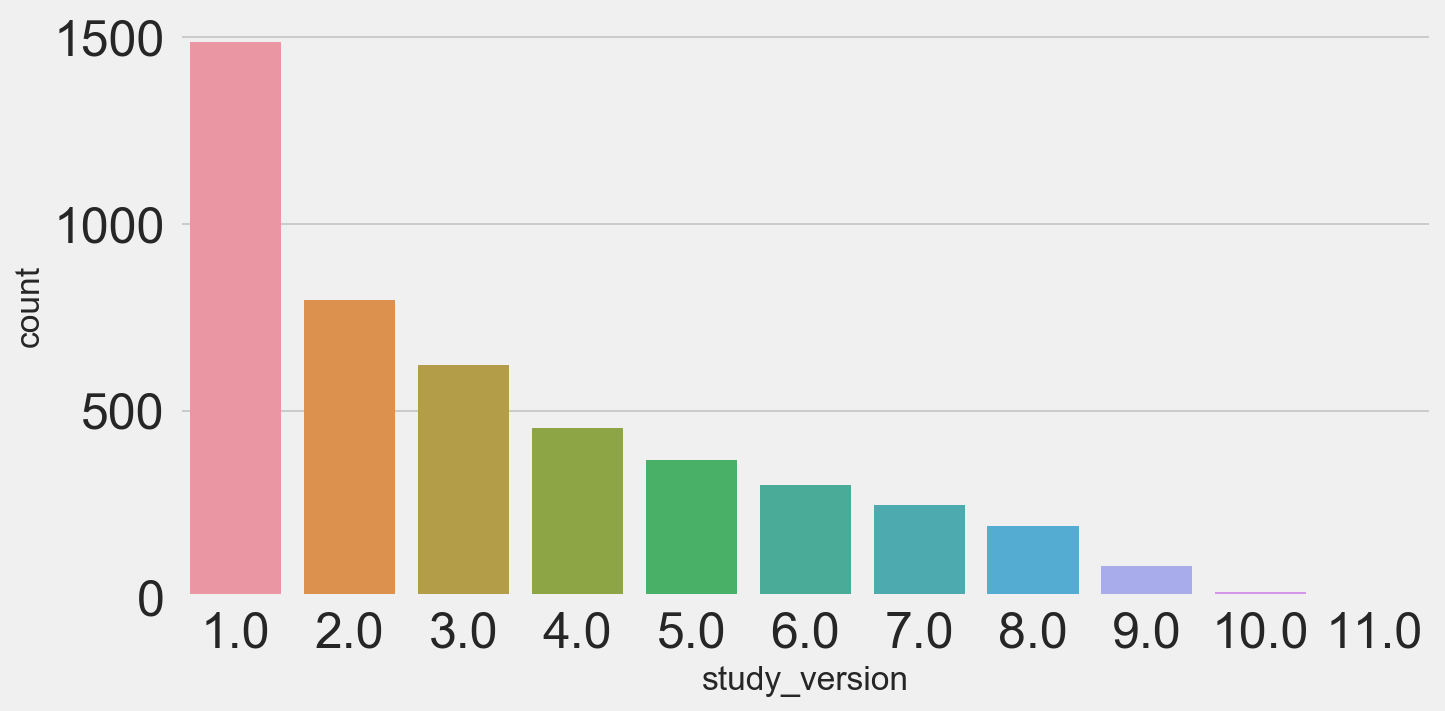

In [58]:
fig, ax = plt.subplots(figsize =(10,5))
sns.countplot(data=df, x = 'study_version', ax=ax);
plt.savefig('number_in_study_versions.pdf')

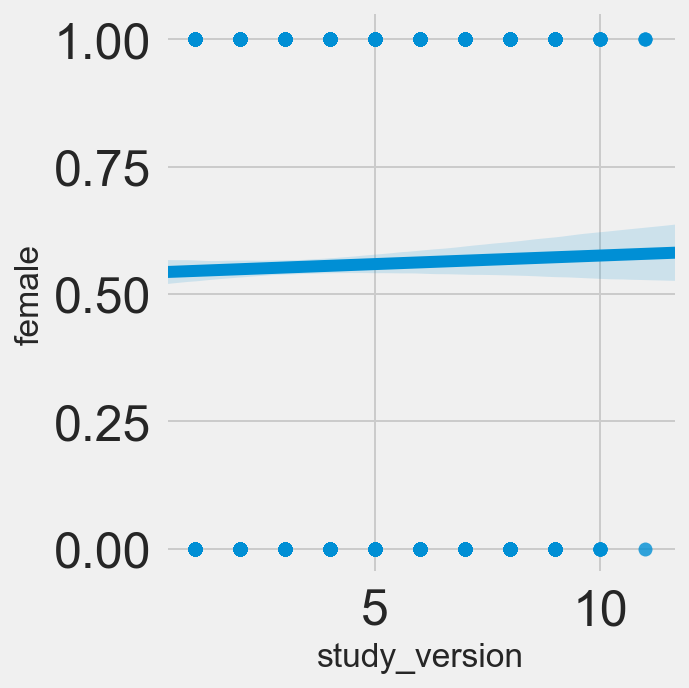

In [60]:
sns.lmplot(x='study_version', y='female', data=df);
plt.savefig('gender_in_study_versions.pdf')

In [ ]:
# sns.pairplot(df, hue = 'female')

### Convert height column values into numerics as meters

Need to clean and convert height and weight data to centimeters and kilograms to calculate BMI for each participant in study

In [61]:
df['hgt'] = df['hgt'].apply(str)

In [62]:
df['hgt'].dtype

dtype('O')

In [63]:
df['clean_hgt'] = df['hgt']

In [64]:
df['clean_hgt'].unique()

array(['70.0', '51.6', '80.0', '67.0', '74.0', '78.0', '66.0', '72.0',
       '68.0', '69.0', '64.0', '43.2', '71.0', 'nan', '75.0', '73.0',
       '65.0', '76.8', '76.0', '63.0', '70.5', '73.5', '61.0', '62.0',
       '67.5', '60.0', '57.0', '74.25', '77.0', '75.2', '58.0', '67.2',
       '72.04', '69.5', '66.5', '68.5', '59.0', '73.2', '83.0', '45.28',
       '65.5', '70.4', '71.65', '66.9', '62.5', '71.5', '72.5', '74.5',
       '70.1', '70.07', '62.63', '63.39', '69.29', '61.5', '64.5', '54.0',
       '59.06', '72.22', '63.75', '64.96', '62.99', '79.0', '78.75',
       '85.0', '62.4', '69.7', '68.9', '60.5', '69.75', '68.25', '63.5',
       '62.6', '65.75', '52.0', '70.8', '61.41', '63.78', '56.0', '43.31',
       '51.0', '55.0', '63.6', '62.2', '66.54', '65.4', '64.17', '68.11',
       '60.75', '64.6', '64.56', '68.4', '61.42', '61.81', '61.4', '61.1',
       '61.25', '46.8', '63.25', '64.57', '66.96', '62.24', '64.25',
       '59.5', '70.86', '0.0', '66.14', '70.08'], dtype=objec

In [ ]:
# old formula
# df['clean_hgt'] = df.clean_hgt.str.replace(r'(^.*feet.*$)', 'ft', case = True)

#### Make height column numeric and convert from inches to centimeters

In [65]:
df['clean_hgt'] = pd.to_numeric(df['clean_hgt'], errors='coerce')

In [66]:
df['clean_hgt'] = round(df['clean_hgt'] * 2.54)

In [67]:
df['clean_hgt'].dtype

dtype('float64')

#### Make weight column numeric and convert from pounds to kilograms

In [68]:
df['clean_wgt'] = pd.to_numeric(df['wgt'], errors='coerce')

In [69]:
df['clean_wgt'] = round(df['clean_wgt'] * 0.45)

In [70]:
df['clean_wgt'].dtype

dtype('float64')

#### Calculate BMI

In [71]:
# BMI = kg/m2
df['BMI'] = df['clean_wgt'] / (df['clean_hgt'] * 0.1) **2

In [72]:
df['BMI'] = df['BMI'] * 100

In [73]:
df[['BMI', 'clean_hgt', 'clean_wgt']].sort_values(by ='BMI', ascending=False)

BMI  clean_hgt  clean_wgt
4813         inf        0.0       38.0
28    111.570248      110.0      135.0
1      96.730960      131.0      166.0
674    69.565217      115.0       92.0
1366   68.595041      110.0       83.0
1493   66.942149      110.0       81.0
1494   66.942149      110.0       81.0
1620   66.115702      110.0       80.0
1683   65.289256      110.0       79.0
232    62.933395      131.0      108.0
399    58.271662      131.0      100.0
475    56.523513      131.0       97.0
497    56.523513      131.0       97.0
2934   56.198347      110.0       68.0
3      56.055363      170.0      162.0
677    53.609929      131.0       92.0
0      52.707991      178.0      167.0
835    52.444496      131.0       90.0
775    52.444496      131.0       90.0
6      52.437642      168.0      148.0
23     51.940231      163.0      138.0
27     51.187474      163.0      136.0
10     49.826990      170.0      144.0
8      49.826990      170.0      144.0
103    49.531738      155.0      119.0
12     49.480969      170.0      143.0
11     49.480969      170.0      143.0
294    49.464923      145.0      104.0
47     48.929203      163.0      130.0
50     48.929203      163.0      130.0
...          ...        ...        ...
5086         NaN        NaN        NaN
5087         NaN      168.0        NaN
5088         NaN        NaN        NaN
5089         NaN        NaN        NaN
5090         NaN        NaN        NaN
5091         NaN        NaN        NaN
5093         NaN        NaN        NaN
5094         NaN        NaN        NaN
5097         NaN        NaN        NaN
5098         NaN        NaN        NaN
5099         NaN        NaN        NaN
5102         NaN        NaN        NaN
5104         NaN        NaN        NaN
5105         NaN        NaN        NaN
5106         NaN      156.0        NaN
5107         NaN      168.0        NaN
5108         NaN        NaN        NaN
5109         NaN      165.0        NaN
5110         NaN      168.0        NaN
5111         NaN        NaN        NaN
5114         NaN        NaN        NaN
5123         NaN        NaN        NaN
5125         NaN        NaN        NaN
5126         NaN      165.0        NaN
5127         NaN        NaN        NaN
5128         NaN        NaN        NaN
5132         NaN        NaN        NaN
5143         NaN        NaN        NaN
5144         NaN        NaN        NaN
5146         NaN      175.0        NaN

[4571 rows x 3 columns]

In [74]:
df.shape

(4571, 74)

In [75]:
# convert inf to NaN
df.replace([np.inf, -np.inf], np.nan, inplace =True)

#### Review missing values

In [76]:
print_full_rows(df.isnull().sum().sort_values(ascending=False))

country                           3206
whosays                           1110
patient_reported_outcome           729
income                             393
time_between_symptom_diagnosis     248
first_symptoms_date                216
BMI                                184
clean_hgt                          159
clean_wgt                          138
wgt                                138
deep_brain_stimulation             131
memory                             121
disease_stage                      121
lonely                             117
race_ethnicity                     115
highestedu                         115
rising                             115
speech                             110
sexual                             109
friends                            109
drool                              108
stoop                              107
handwriting                        104
diagnosis_date                     101
consent                            100
gender                   

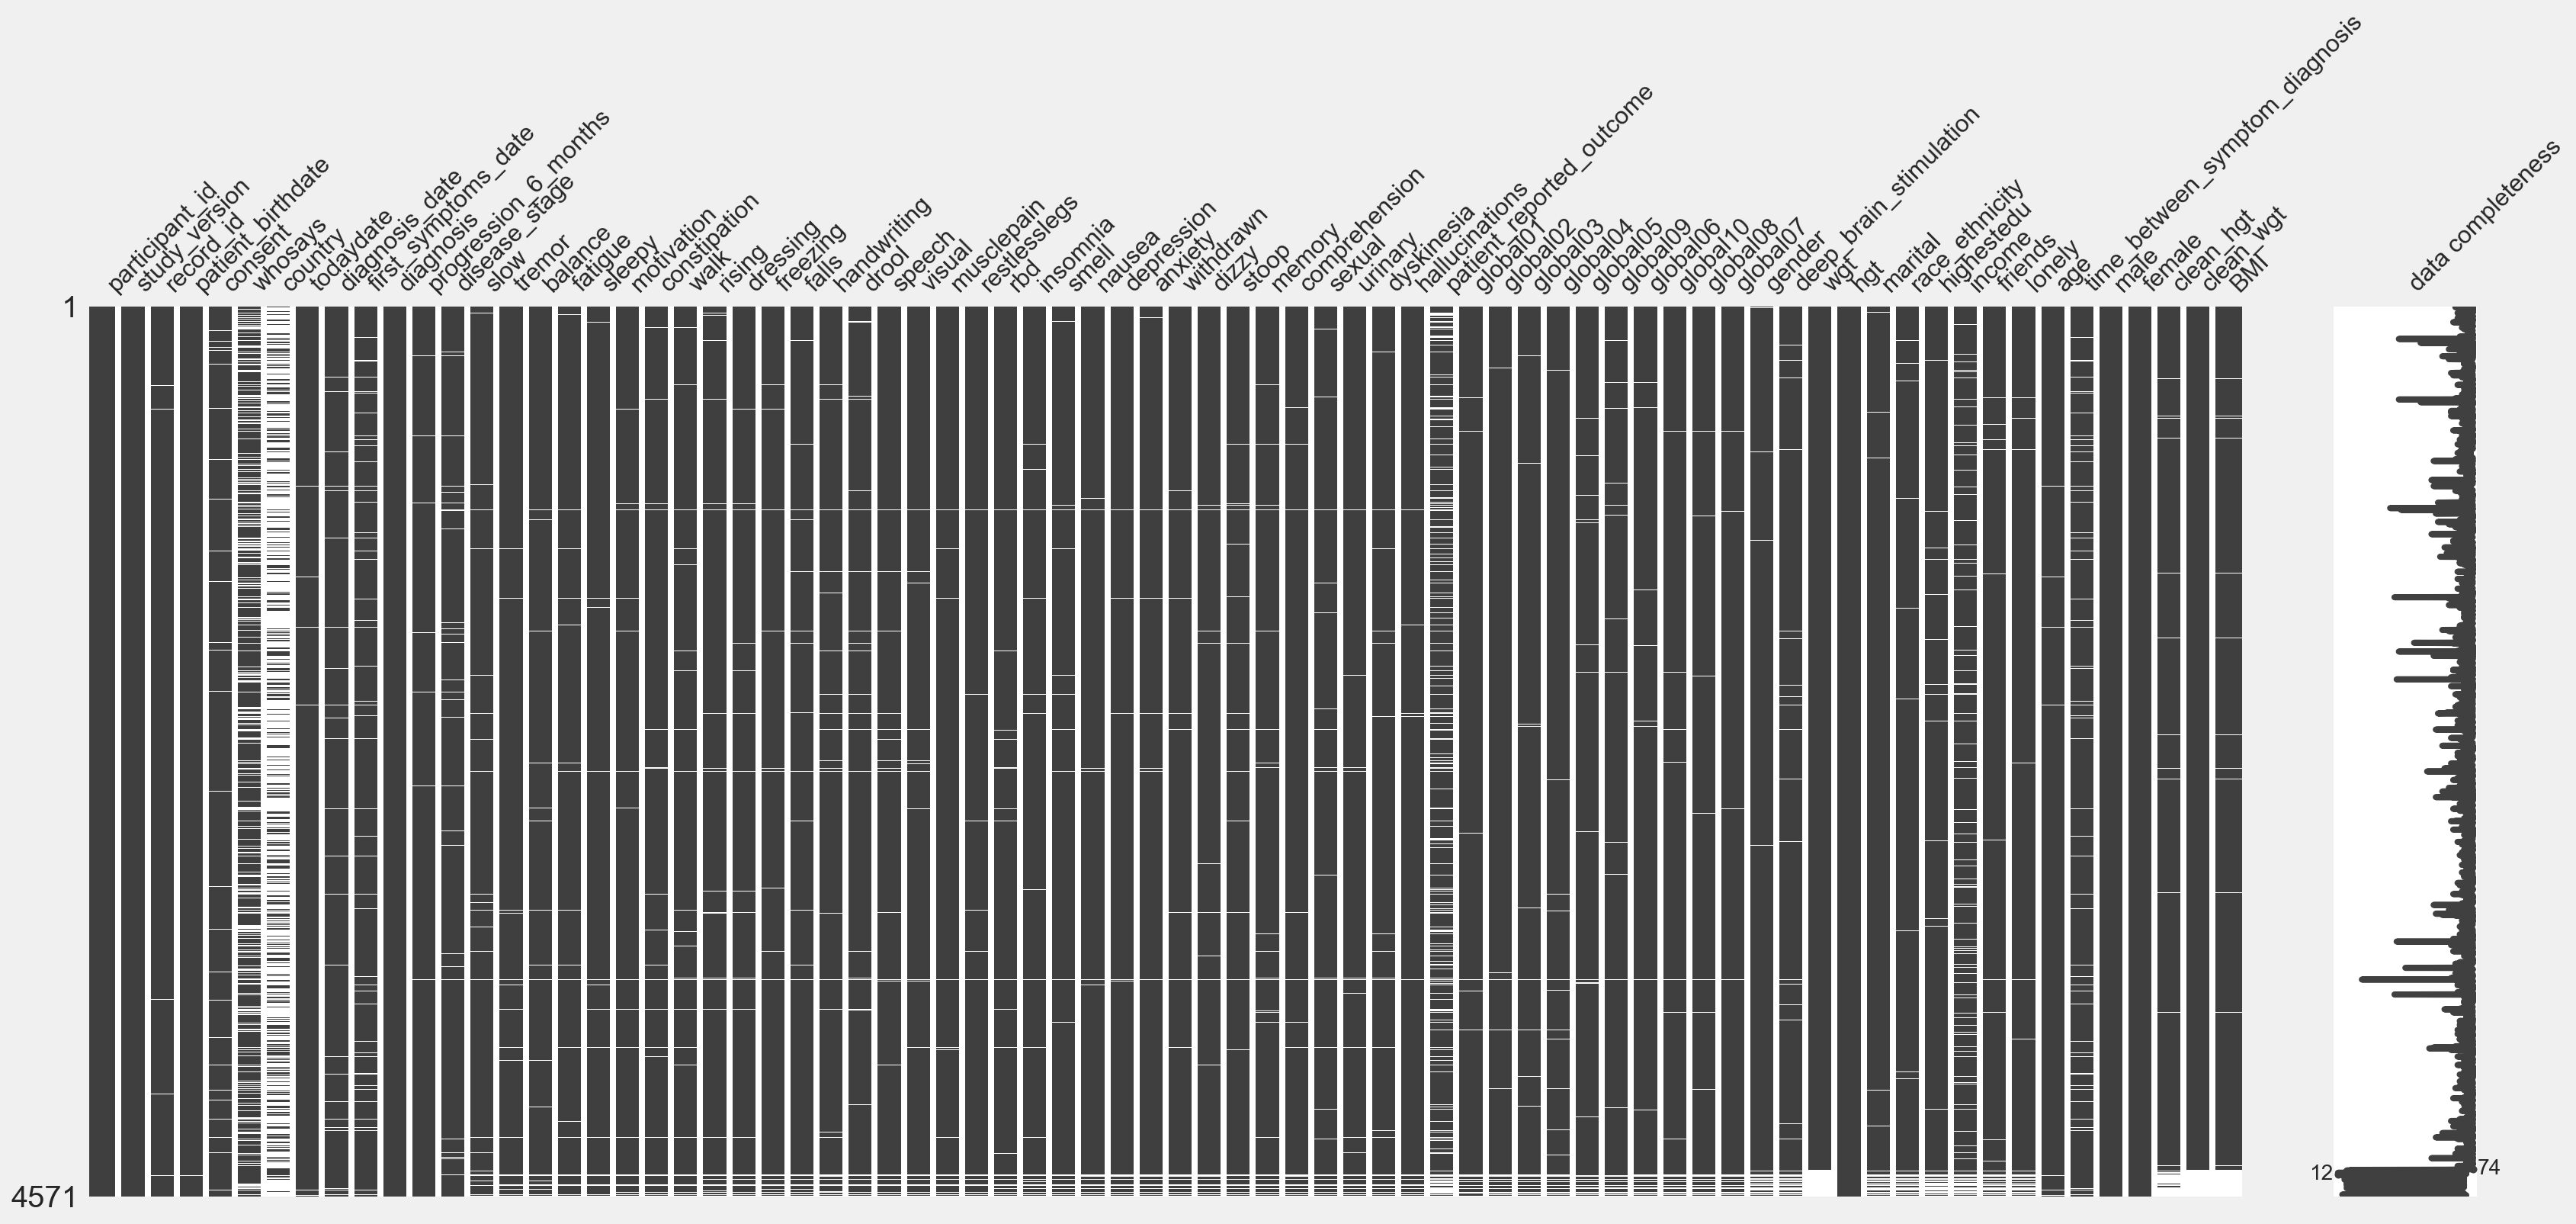

In [78]:
msno.matrix((df), labels = True);
plt.savefig('NaN_matrix.pdf')

In [79]:
df_clean = df.dropna()

In [80]:
df_clean.isnull().sum().head()

participant_id       0
study_version        0
record_id            0
patient_birthdate    0
consent              0
dtype: int64

#### Drop country column due to large number of NaNs

In [81]:
df_clean.drop('country', axis=1, inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
df_clean.head()

participant_id  study_version record_id patient_birthdate  consent  \
1             1605            1.0    EPHE58        1958-05-08      1.0   
3              171            8.0    CCTC74        1974-05-14      1.0   
10             469            8.0    KBHN65        1965-06-29      1.0   
12             469            7.0    KBHN65        1965-06-29      1.0   
16             545            6.0    TAPD65        1965-06-26      1.0   

    whosays  todaydate diagnosis_date first_symptoms_date  diagnosis  \
1       1.0 2017-11-14     2012-03-01          2005-08-15        1.0   
3       1.0 2017-10-29     2013-09-09          2007-07-15        1.0   
10      1.0 2018-02-23     2014-04-15          2013-12-15        1.0   
12      1.0 2017-08-16     2014-04-30          2012-04-15        1.0   
16      1.0 2017-06-06     2015-07-15          2011-08-15        1.0   

      ...      income  friends  lonely   age  time_between_symptom_diagnosis  \
1     ...         4.0      1.0     1.0  59.0                             6.0   
3     ...         2.0      0.0     1.0  43.0                             6.0   
10    ...         5.0      1.0     0.0  52.0                             0.0   
12    ...         5.0      1.0     0.0  52.0                             2.0   
16    ...         5.0      0.0     1.0  51.0                             3.0   

    male  female  clean_hgt  clean_wgt        BMI  
1      0       1      131.0      166.0  96.730960  
3      0       1      170.0      162.0  56.055363  
10     0       1      170.0      144.0  49.826990  
12     0       1      170.0      143.0  49.480969  
16     1       0      173.0      141.0  47.111497  

[5 rows x 73 columns]

### Check for unbalanced classes

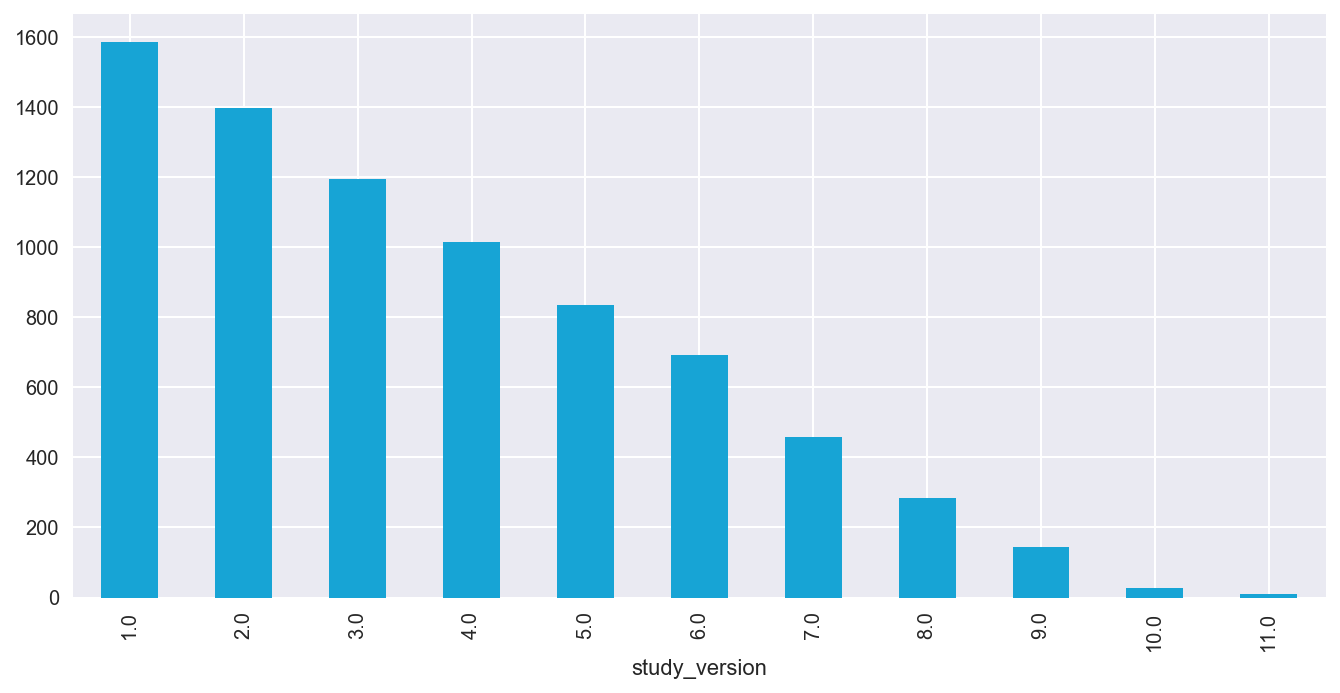

In [238]:
# Number of participants across study versions
fig, ax = plt.subplots(figsize =(10,5))
df_clean.groupby("study_version")['participant_id'].mean().plot(kind='bar', color='#17a4d5', ax=ax);
plt.savefig('number_in_study_versions.pdf')

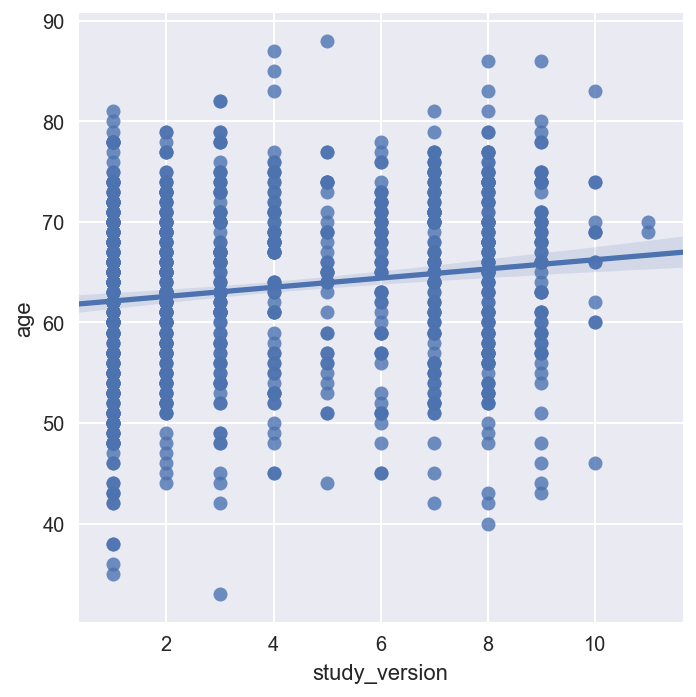

In [240]:
# Age across study versions
# df_clean.groupby("study_version")['age'].mean().plot(kind='line');
sns.lmplot(x='study_version', y='age',data=df_clean, palette ='Blue');
plt.savefig('age_in_study_versions.pdf')

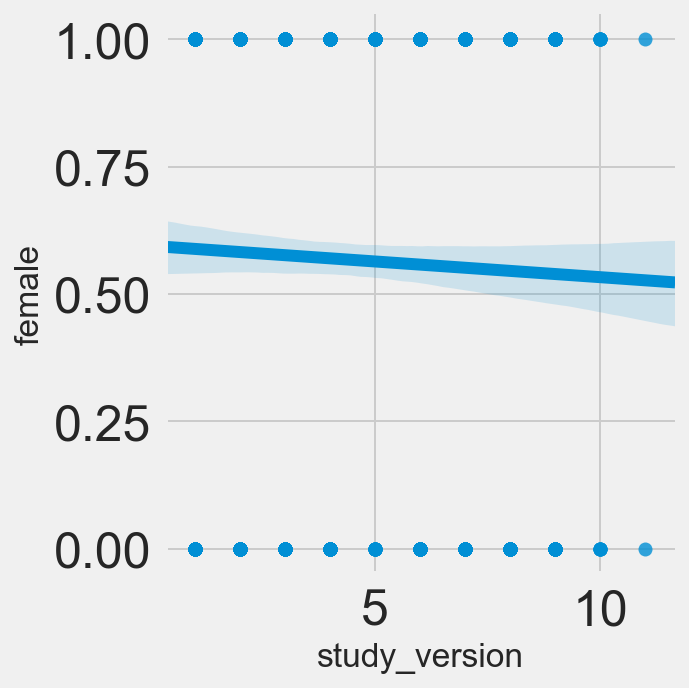

In [90]:
# Gender across study versions
sns.lmplot(x='study_version', y='female', data=df_clean);
plt.savefig('gender_in_study_versions2.pdf')

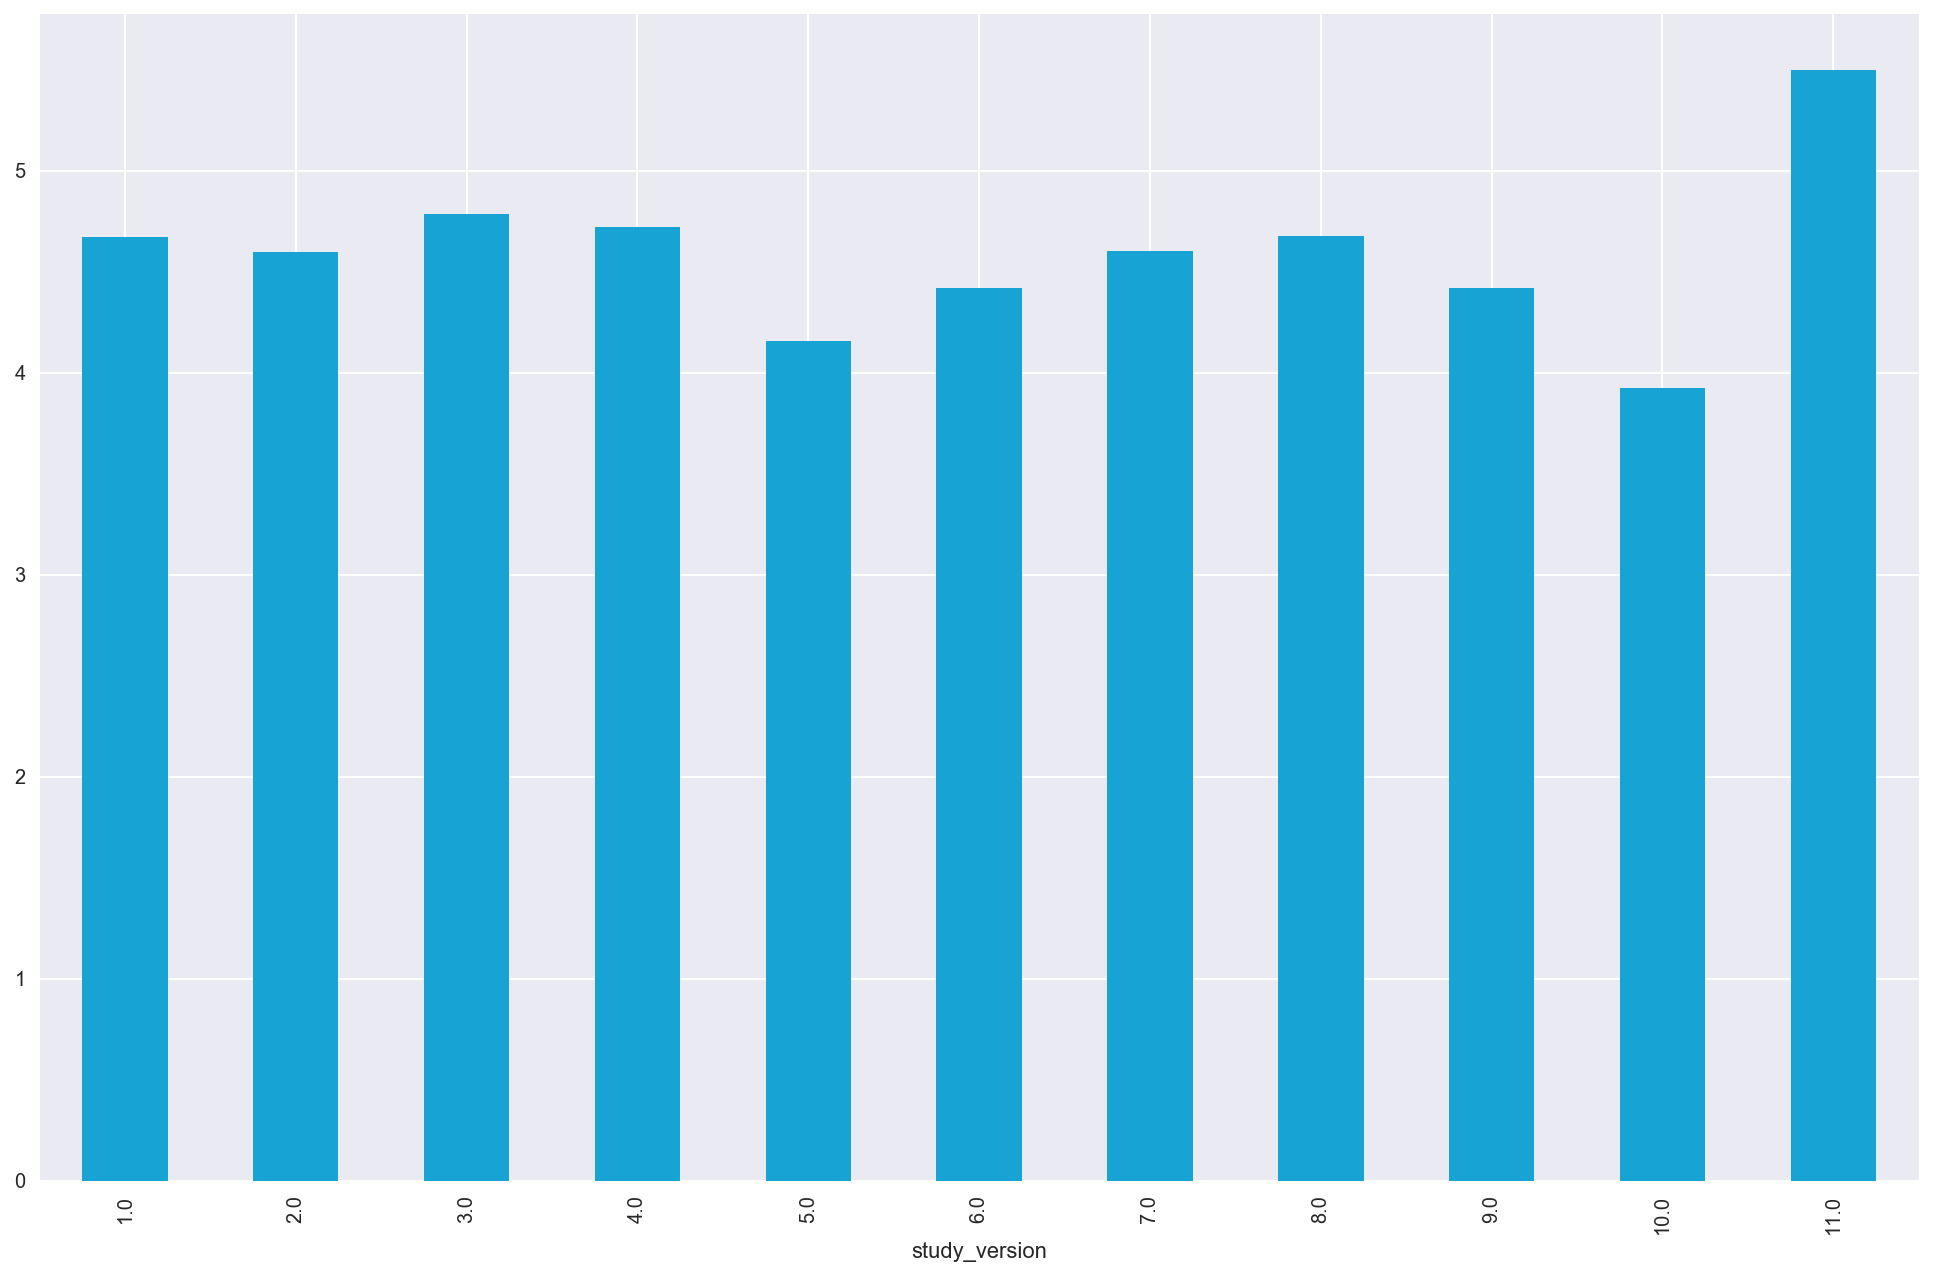

In [248]:
# Income across study versions
fig, ax = plt.subplots(figsize =(15,10))
df_clean.groupby("study_version")['income'].mean().plot(kind='bar', color='#17a4d5', ax=ax);
plt.savefig('income_in_study_versions.pdf')

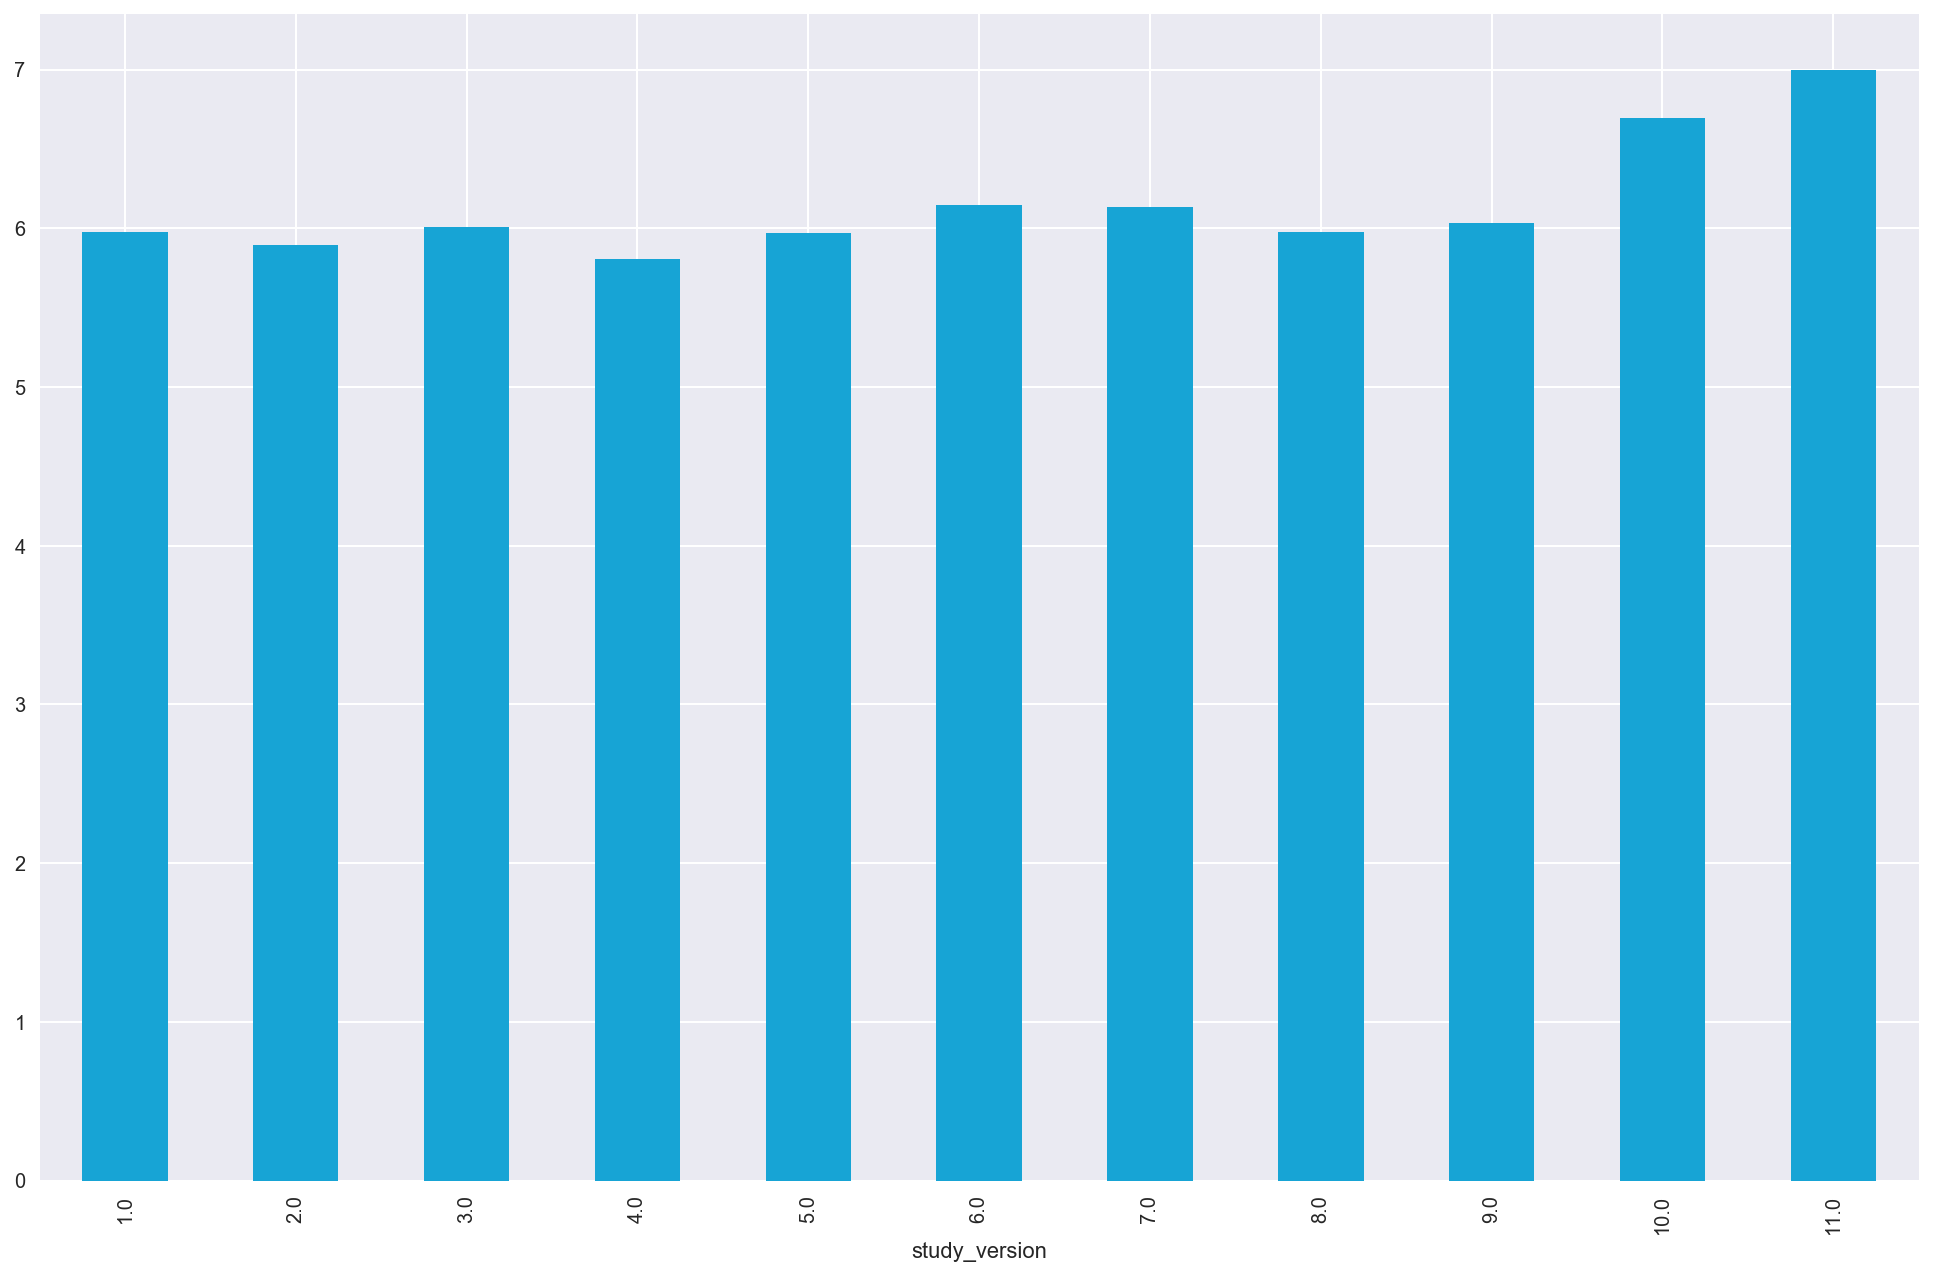

In [263]:
# Education across study versions
fig, ax = plt.subplots(figsize =(15,10))
df_clean.groupby("study_version")['highestedu'].mean().plot(kind='bar', color='#17a4d5', ax=ax);
plt.savefig('education_in_study_versions.pdf')

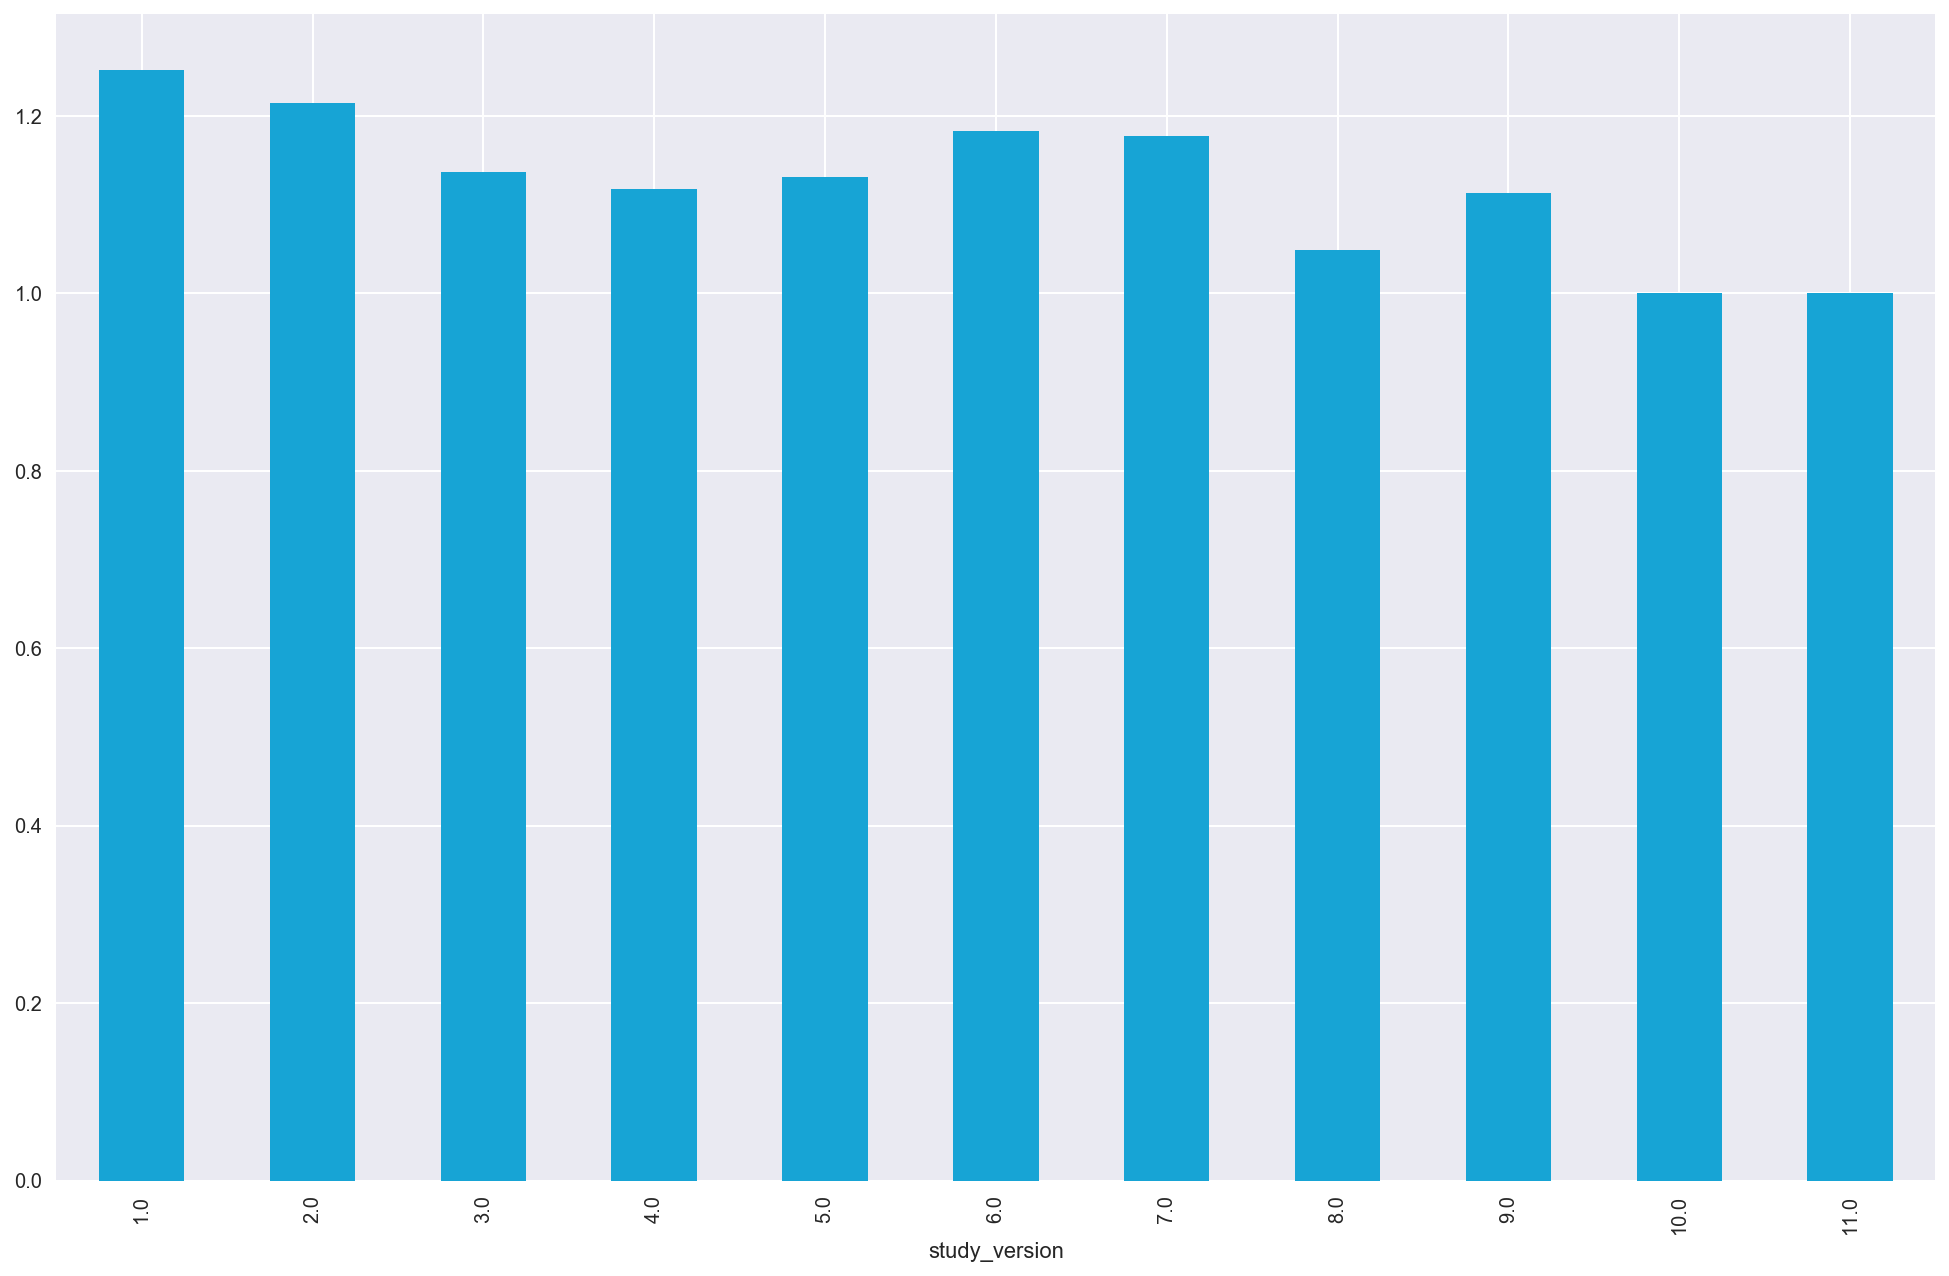

In [247]:
# Race/ethnicity across study versions
fig, ax = plt.subplots(figsize =(15,10))
df_clean.groupby("study_version")['race_ethnicity'].mean().plot(kind='bar', color='#17a4d5', ax=ax);
plt.savefig('race_in_study_versions.pdf')

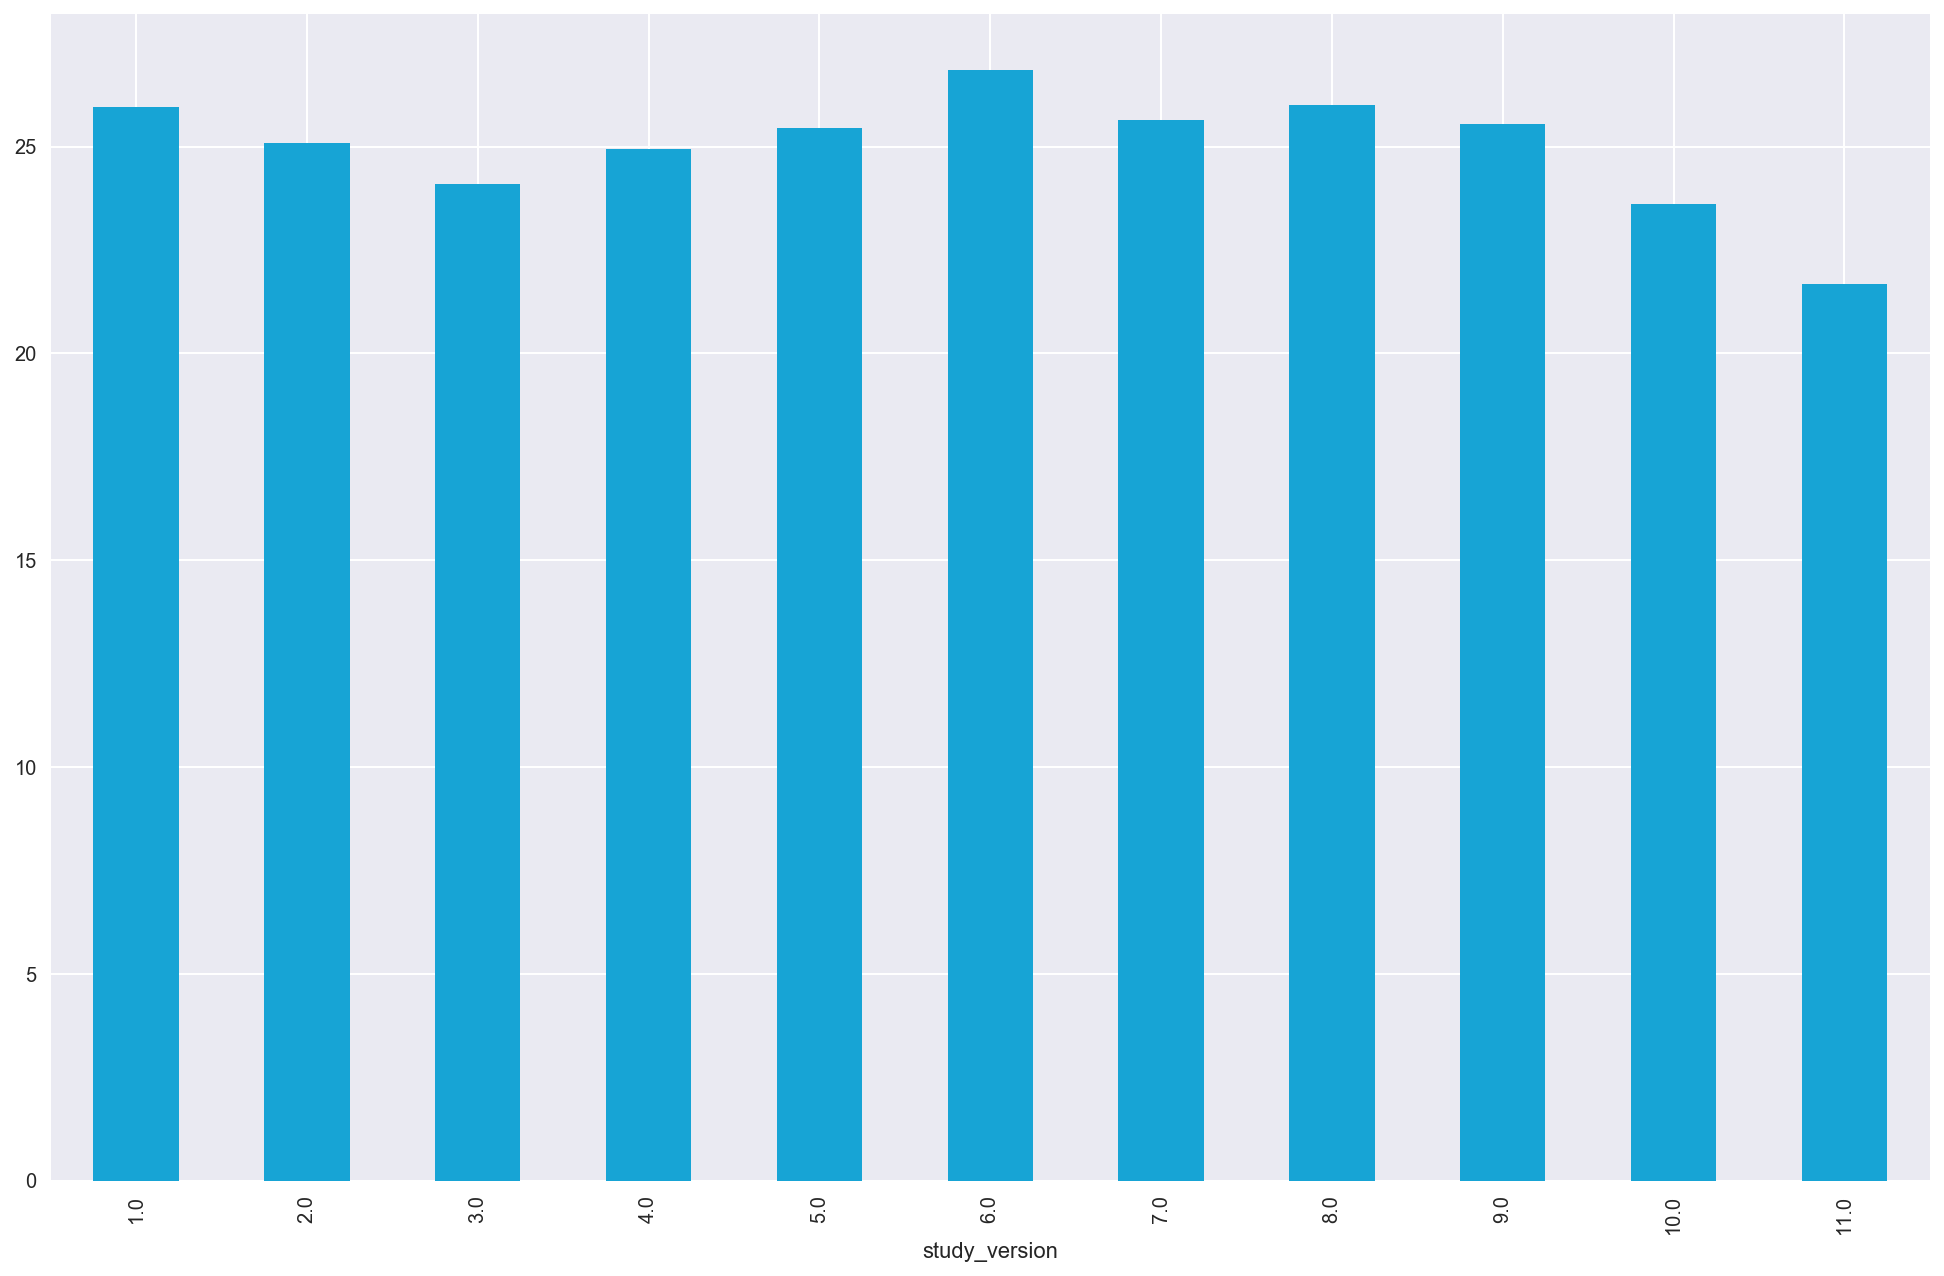

In [252]:
# BMI across study versions
fig, ax = plt.subplots(figsize =(15,10))
df_clean.groupby("study_version")['BMI'].mean().plot(kind='bar', color='#17a4d5', ax=ax);
plt.savefig('BMI_in_study_versions.pdf')

In [96]:
df_clean.columns

Index(['participant_id', 'study_version', 'record_id', 'patient_birthdate',
       'consent', 'whosays', 'todaydate', 'diagnosis_date',
       'first_symptoms_date', 'diagnosis', 'progression_6_months',
       'disease_stage', 'slow', 'tremor', 'balance', 'fatigue', 'sleepy',
       'motivation', 'constipation', 'walk', 'rising', 'dressing', 'freezing',
       'falls', 'handwriting', 'drool', 'speech', 'visual', 'musclepain',
       'restlesslegs', 'rbd', 'insomnia', 'smell', 'nausea', 'depression',
       'anxiety', 'withdrawn', 'dizzy', 'stoop', 'memory', 'comprehension',
       'sexual', 'urinary', 'dyskinesia', 'hallucinations',
       'patient_reported_outcome', 'global01', 'global02', 'global03',
       'global04', 'global05', 'global09', 'global06', 'global10', 'global08',
       'global07', 'gender', 'deep_brain_stimulation', 'wgt', 'hgt', 'marital',
       'race_ethnicity', 'highestedu', 'income', 'friends', 'lonely', 'age',
       'time_between_symptom_diagnosis', 'male', 'fe

### Correlation

In [97]:
# significant correlations
print_full_rows(df_clean.corr().unstack().sort_values(ascending =False).drop_duplicates())

BMI                             BMI                               1.000000
clean_wgt                       wgt                               0.999866
global01                        global03                          0.864058
motivation                      withdrawn                         0.814402
balance                         falls                             0.800158
walk                            patient_reported_outcome          0.787060
wgt                             BMI                               0.782887
BMI                             clean_wgt                         0.782857
patient_reported_outcome        fatigue                           0.772849
rising                          dressing                          0.769833
patient_reported_outcome        rising                            0.766253
slow                            patient_reported_outcome          0.765289
sleepy                          fatigue                           0.755586
withdrawn                

In [98]:
df_clean['deep_brain_stimulation'].corr(df_clean['disease_stage'])

0.2689293625285878

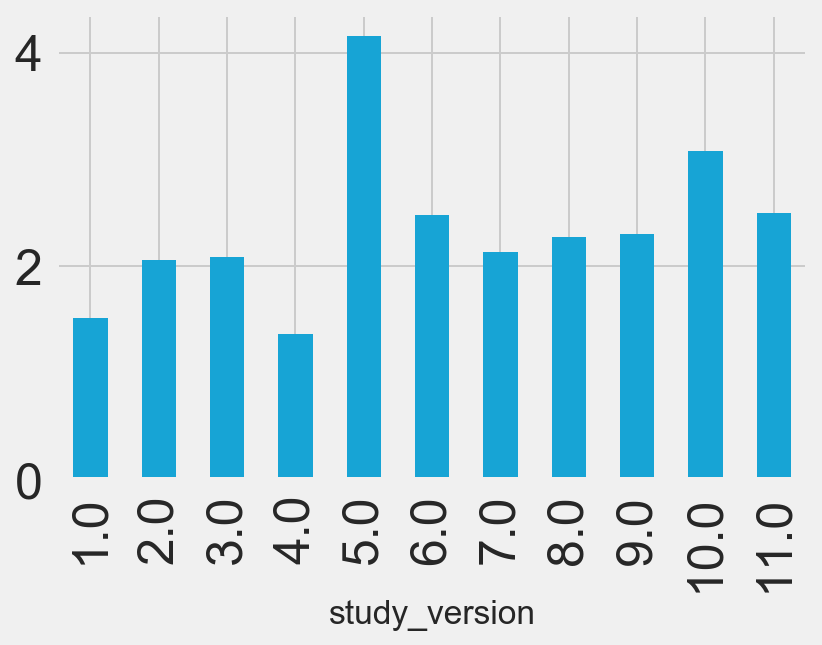

In [100]:
# first symptoms date - date of when patient believed symptoms first occurred - compared to diagnosis date
df_clean.groupby('study_version')['time_between_symptom_diagnosis'].mean().plot(kind='bar', color ='#17a4d5');
plt.savefig('time_in_study_versions.pdf')

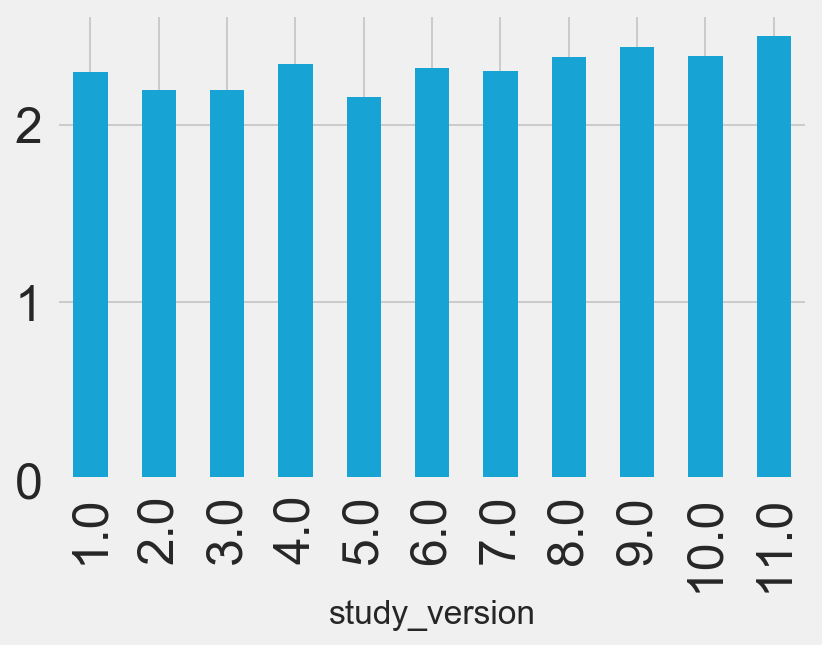

In [102]:
# progression6mo - "do you believe your disease is worse better than the same than six months ago" 
# 1, Improved | 2, Been stable | 3, Worsened - look at who answered improved
df_clean.groupby('study_version')['progression_6_months'].mean().plot(kind='bar', color ='#17a4d5');
plt.savefig('disease_progession_in_study_versions.pdf')

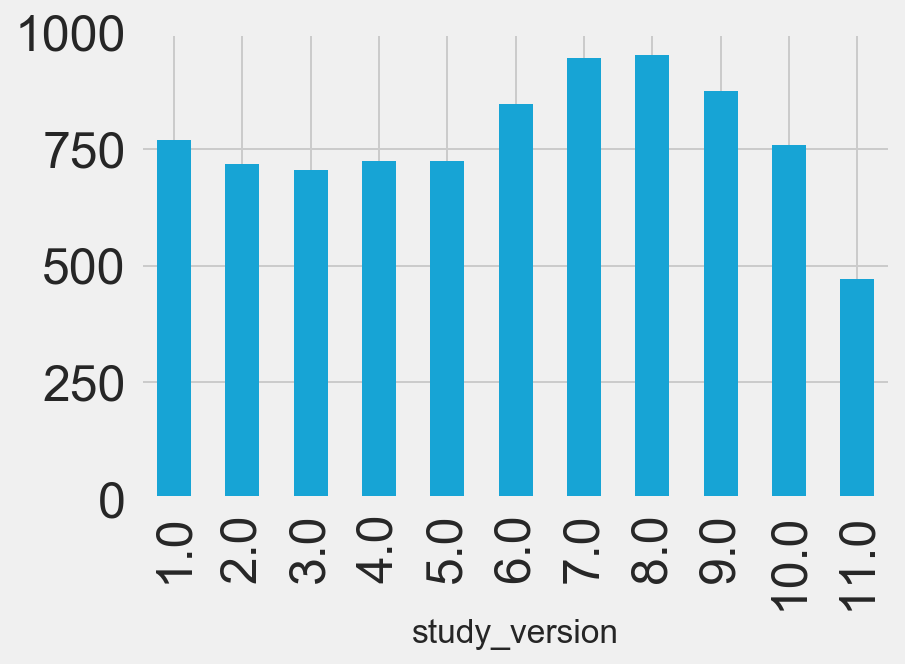

In [104]:
df_clean.groupby('study_version')['patient_reported_outcome'].mean().plot(kind='bar', color ='#17a4d5');
plt.savefig('patient_outcome_in_study_versions.pdf')

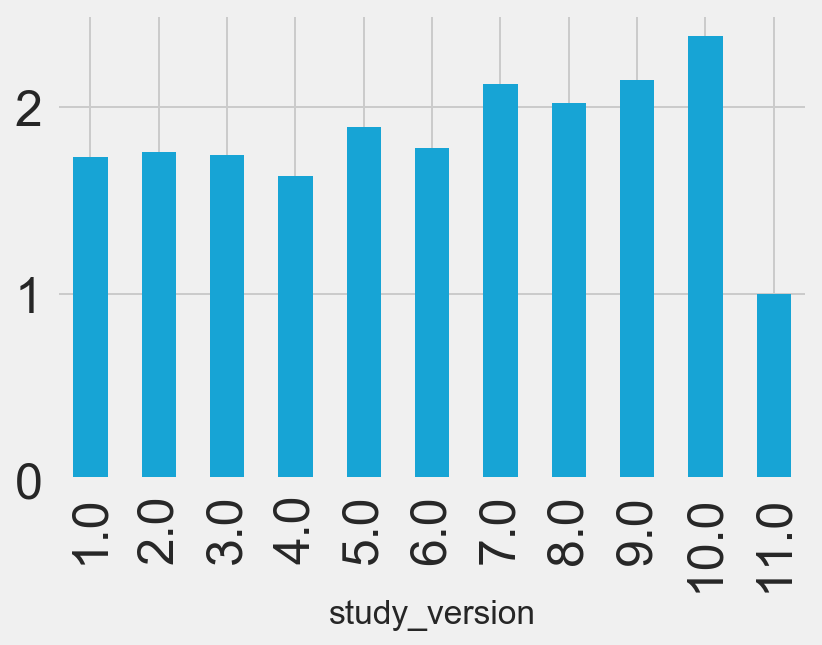

In [106]:
df_clean.groupby('study_version')['disease_stage'].mean().plot(kind='bar', color ='#17a4d5');
plt.savefig('disease_stage_in_study_versions.pdf')

### Deep Brain Stimulation

In [ ]:
# # Compare 
# def percConvert(ser):
#   return ser/float(ser[-1])
# pd.crosstab(df_clean["deep_brain_stimulation"],df_clean["patient_reported_outcome"],margins=True).apply(percConvert, axis=1)

In [ ]:
# df_clean.boxplot(column='progression_6_months',by='deep_brain_stimulation')

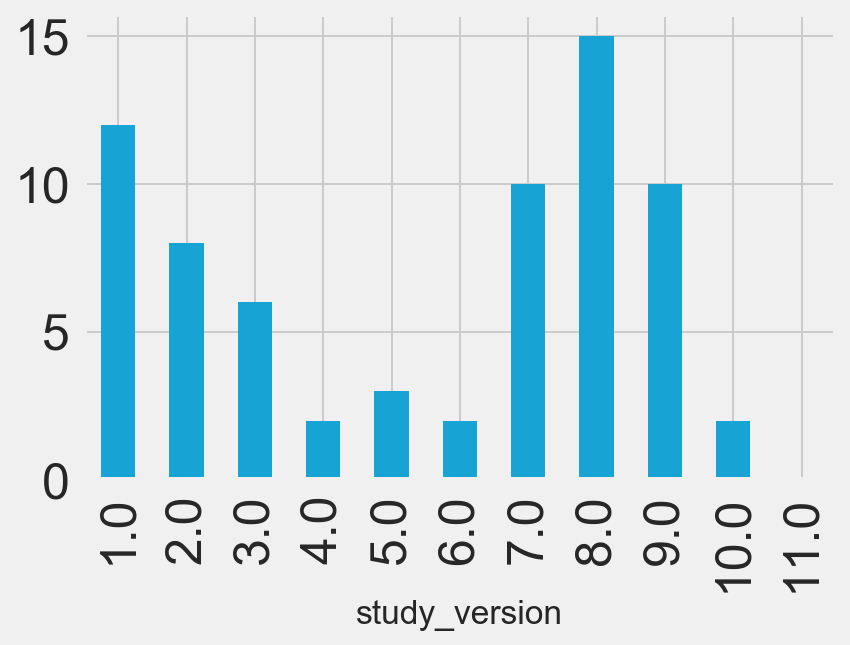

In [110]:
df_clean.groupby('study_version')['deep_brain_stimulation'].sum().plot(kind='bar', color ='#17a4d5');

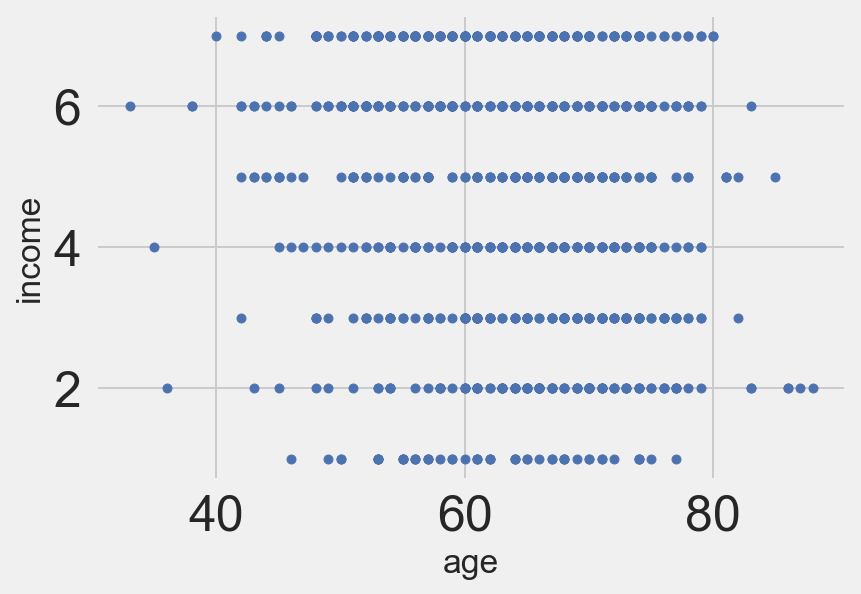

In [112]:
# comparing population of those who received deep brain stimulation and whose self-reported condition improved with study population
df_clean.plot(kind ='scatter', x = 'age', y = 'income');
plt.savefig('dbs_age_income.pdf')

In [113]:
# Review participants who received deep brain stimulation and whose disease progression improved
df_deep_brain_improved = df_clean[(df_clean['progression_6_months']  ==1) & (df_clean['deep_brain_stimulation'] == 1)]

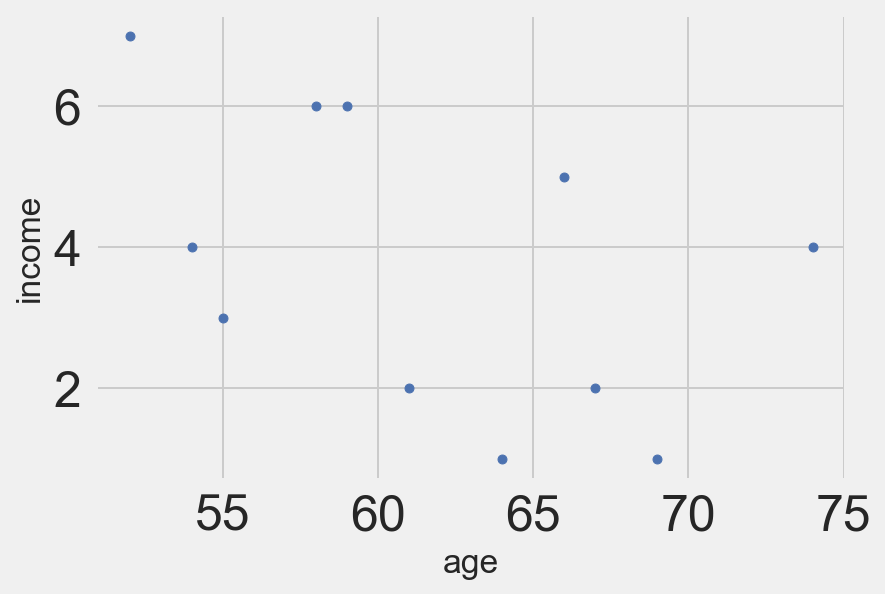

In [114]:
df_deep_brain_improved.plot(kind ='scatter', x = 'age', y = 'income');

In [115]:
# df_clean.groupby("study_version")['race_ethnicity'].mean().plot(kind='bar', color='#17a4d5');
df_deep_brain = df_clean[(df_clean['deep_brain_stimulation']  ==1)]

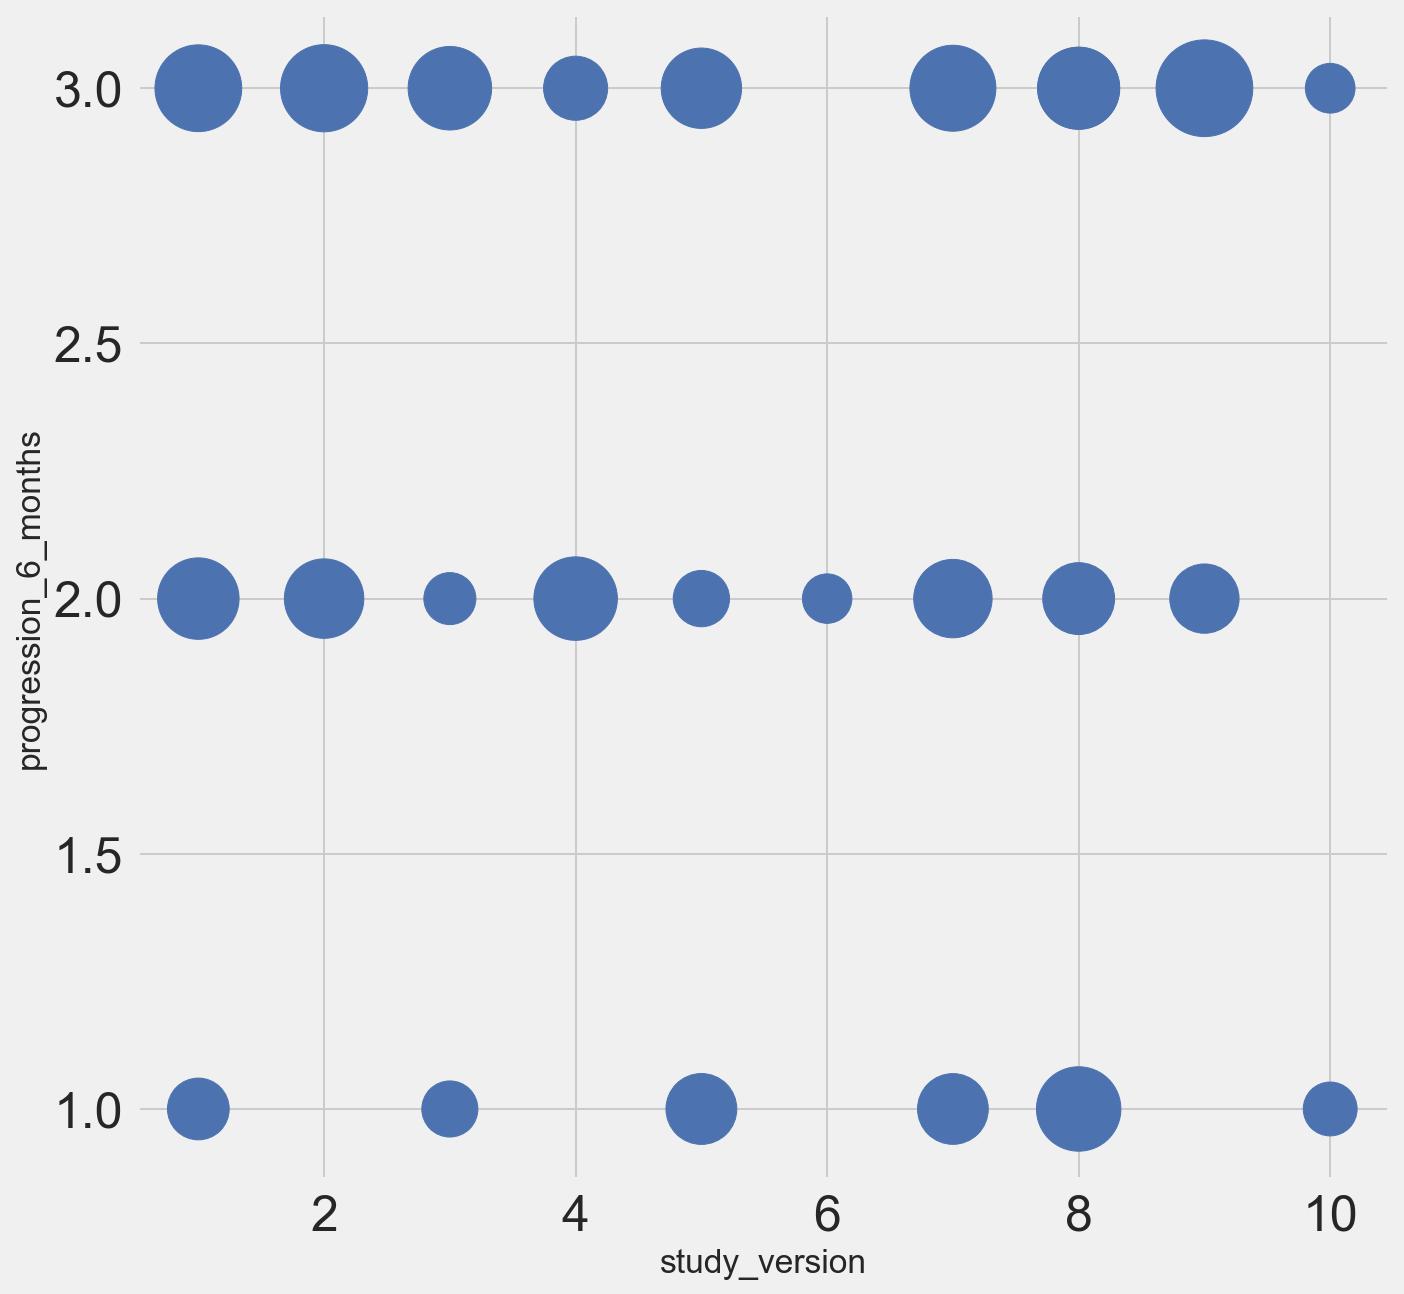

In [122]:
fig, ax = plt.subplots(figsize =(10,10))
df_deep_brain.plot(kind='scatter', x='study_version', y='progression_6_months', s=df_deep_brain.patient_reported_outcome, ax=ax);
plt.savefig('dbs_disease_progression.pdf')

### Symptom profile

#### Identify key symptoms within first five years time between symptom and diagnosis

In [ ]:
# look at correlation between symptoms - what is symptom profile of people in first five years

In [123]:
first_five = df_clean['time_between_symptom_diagnosis'] < 6
more_than_zero = df_clean['time_between_symptom_diagnosis'] > 0
df_first_five_years = df_clean[first_five & more_than_zero]

In [124]:
df_first_five_years[['diagnosis_date', 'first_symptoms_date', 'time_between_symptom_diagnosis']].sort_values(by = 'time_between_symptom_diagnosis', ascending = False)

diagnosis_date first_symptoms_date  time_between_symptom_diagnosis
878      2015-01-29          2009-08-15                             5.0
4493     2013-07-01          2007-07-15                             5.0
768      2012-05-18          2007-03-15                             5.0
1652     2016-02-15          2011-01-15                             5.0
546      2014-10-26          2009-06-15                             5.0
2788     2014-06-01          2009-01-15                             5.0
1408     2012-01-20          2007-01-15                             5.0
337      2011-08-23          2006-08-15                             5.0
339      2006-04-15          2000-07-15                             5.0
3104     2013-01-01          2007-08-01                             5.0
1740     2015-07-25          2010-01-15                             5.0
1059     2015-01-15          2009-08-15                             5.0
2008     2013-12-01          2008-07-01                             5.0
3012     2014-02-02          2009-01-15                             5.0
858      2013-03-01          2008-01-01                             5.0
3891     2009-06-30          2003-12-26                             5.0
654      2016-12-12          2011-05-15                             5.0
2762     2016-04-08          2010-09-01                             5.0
2477     2017-01-01          2011-04-15                             5.0
609      2012-11-01          2007-11-01                             5.0
1455     2016-02-01          2010-02-15                             5.0
4286     2009-10-07          2004-08-15                             5.0
2695     2015-08-15          2010-04-15                             5.0
2696     2015-08-15          2010-04-15                             5.0
4298     2012-06-15          2007-06-15                             5.0
4741     2008-03-26          2003-03-01                             5.0
2736     2014-08-01          2009-03-09                             5.0
2486     2013-02-01          2007-09-15                             5.0
2342     2014-05-01          2008-09-15                             5.0
4703     2002-02-15          1997-01-15                             5.0
...             ...                 ...                             ...
3570     2002-06-01          2000-06-15                             1.0
3553     2016-01-20          2014-10-01                             1.0
1978     2012-02-10          2010-06-15                             1.0
3530     2011-10-24          2010-09-15                             1.0
1966     2017-12-15          2016-01-15                             1.0
3258     2011-11-01          2010-06-15                             1.0
3263     2013-05-15          2012-04-10                             1.0
3288     2008-08-15          2007-08-15                             1.0
3289     2008-08-28          2007-07-04                             1.0
1951     2012-06-15          2011-06-15                             1.0
1944     2004-07-22          2003-07-15                             1.0
1942     2011-07-14          2010-01-15                             1.0
1928     2012-11-01          2011-01-15                             1.0
1921     2010-10-01          2008-10-15                             1.0
1892     2013-10-01          2011-10-03                             1.0
1888     2015-09-01          2013-09-01                             1.0
3371     2006-05-03          2004-05-15                             1.0
1880     2016-07-01          2015-01-01                             1.0
3403     1999-05-25          1998-03-15                             1.0
1840     2013-12-01          2012-05-15                             1.0
3418     2014-07-06          2013-01-01                             1.0
1819     2010-10-15          2008-12-08                             1.0
3435     2016-01-20          2014-10-15                             1.0
3441     2012-04-04          2010-06-15      

In [125]:
df_first_five_years.corr().unstack().sort_values(ascending =False).drop_duplicates()
# print_full_rows(df_first_five_years.corr().unstack().sort_values(ascending =False).drop_duplicates())

BMI                       BMI                         1.000000
clean_wgt                 wgt                         0.999861
global01                  global03                    0.844931
motivation                withdrawn                   0.826724
balance                   falls                       0.806134
rising                    dressing                    0.801470
wgt                       BMI                         0.780207
BMI                       clean_wgt                   0.780038
fatigue                   patient_reported_outcome    0.777903
rising                    patient_reported_outcome    0.776232
walk                      patient_reported_outcome    0.769636
sleepy                    fatigue                     0.767987
dressing                  patient_reported_outcome    0.758592
slow                      walk                        0.752213
patient_reported_outcome  slow                        0.750501
                          balance                     0

In [126]:
# pd.pivot_table(df_clean,index=["study_version"]),values=["BMI"],aggfunc=np.sum))
df_symptoms_first_five_years = pd.pivot_table(df_first_five_years,index=['study_version'],values=['slow', 'tremor', 'balance', 'fatigue', 'sleepy',
       'motivation', 'constipation', 'walk', 'rising', 'dressing', 'freezing',
       'falls', 'handwriting', 'drool', 'speech', 'visual', 'musclepain',
       'restlesslegs', 'rbd', 'insomnia', 'smell', 'nausea', 'depression',
       'anxiety', 'withdrawn', 'dizzy', 'stoop', 'memory', 'comprehension',
       'sexual', 'urinary', 'dyskinesia', 'hallucinations'])

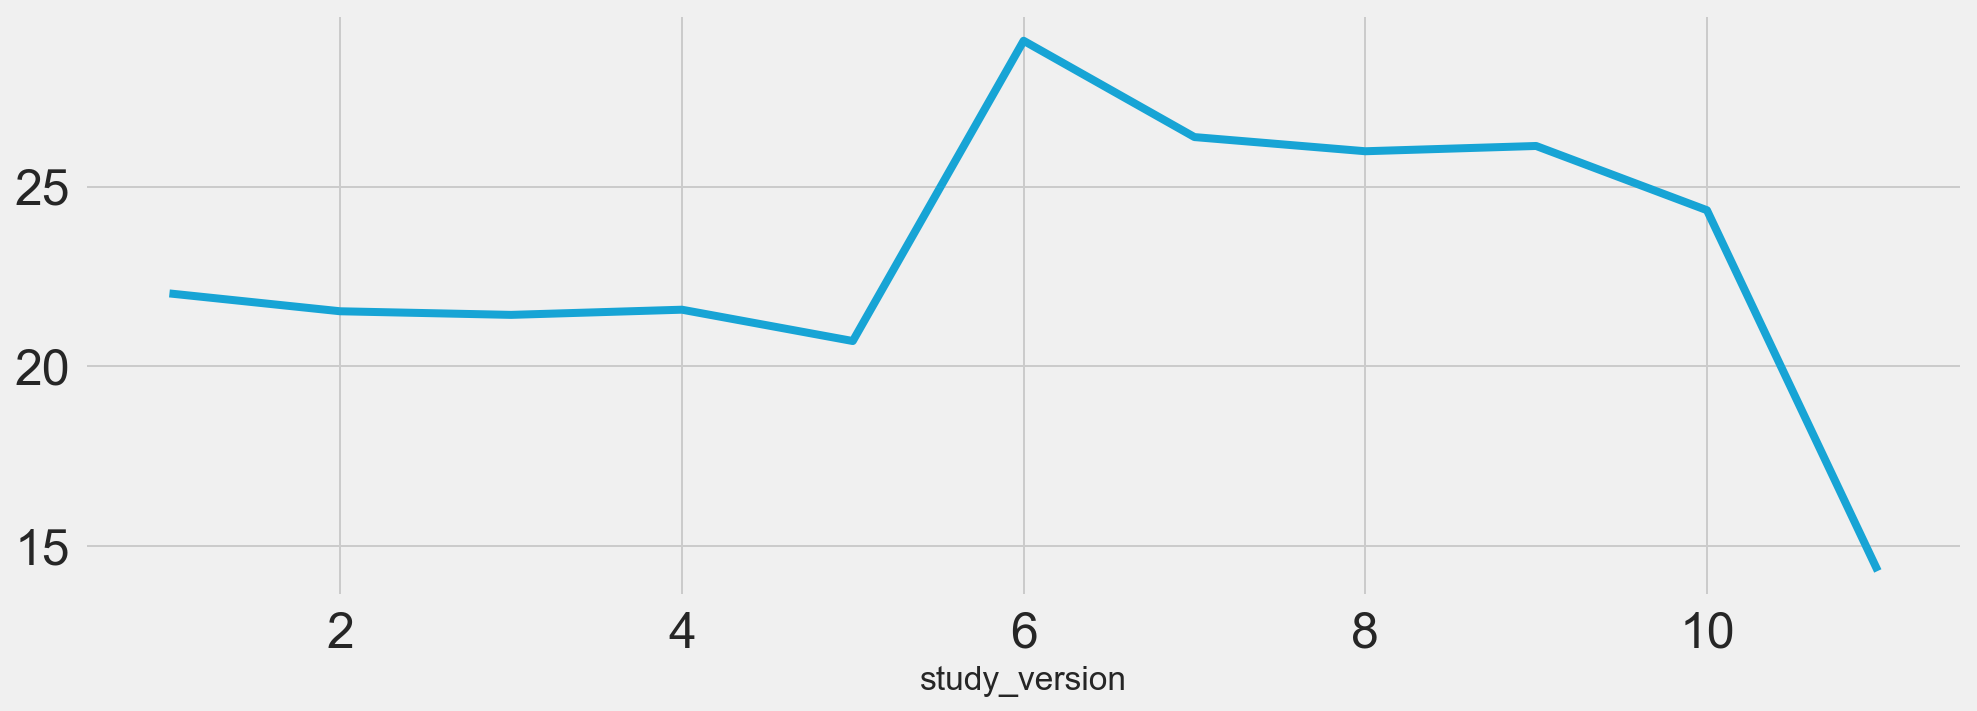

In [127]:
# Symptoms scores across study versions
fig, ax = plt.subplots(figsize =(15,5))
df_symptoms_first_five_years.mean(axis = 1).plot(kind='line', color ='#17a4d5', ax=ax);

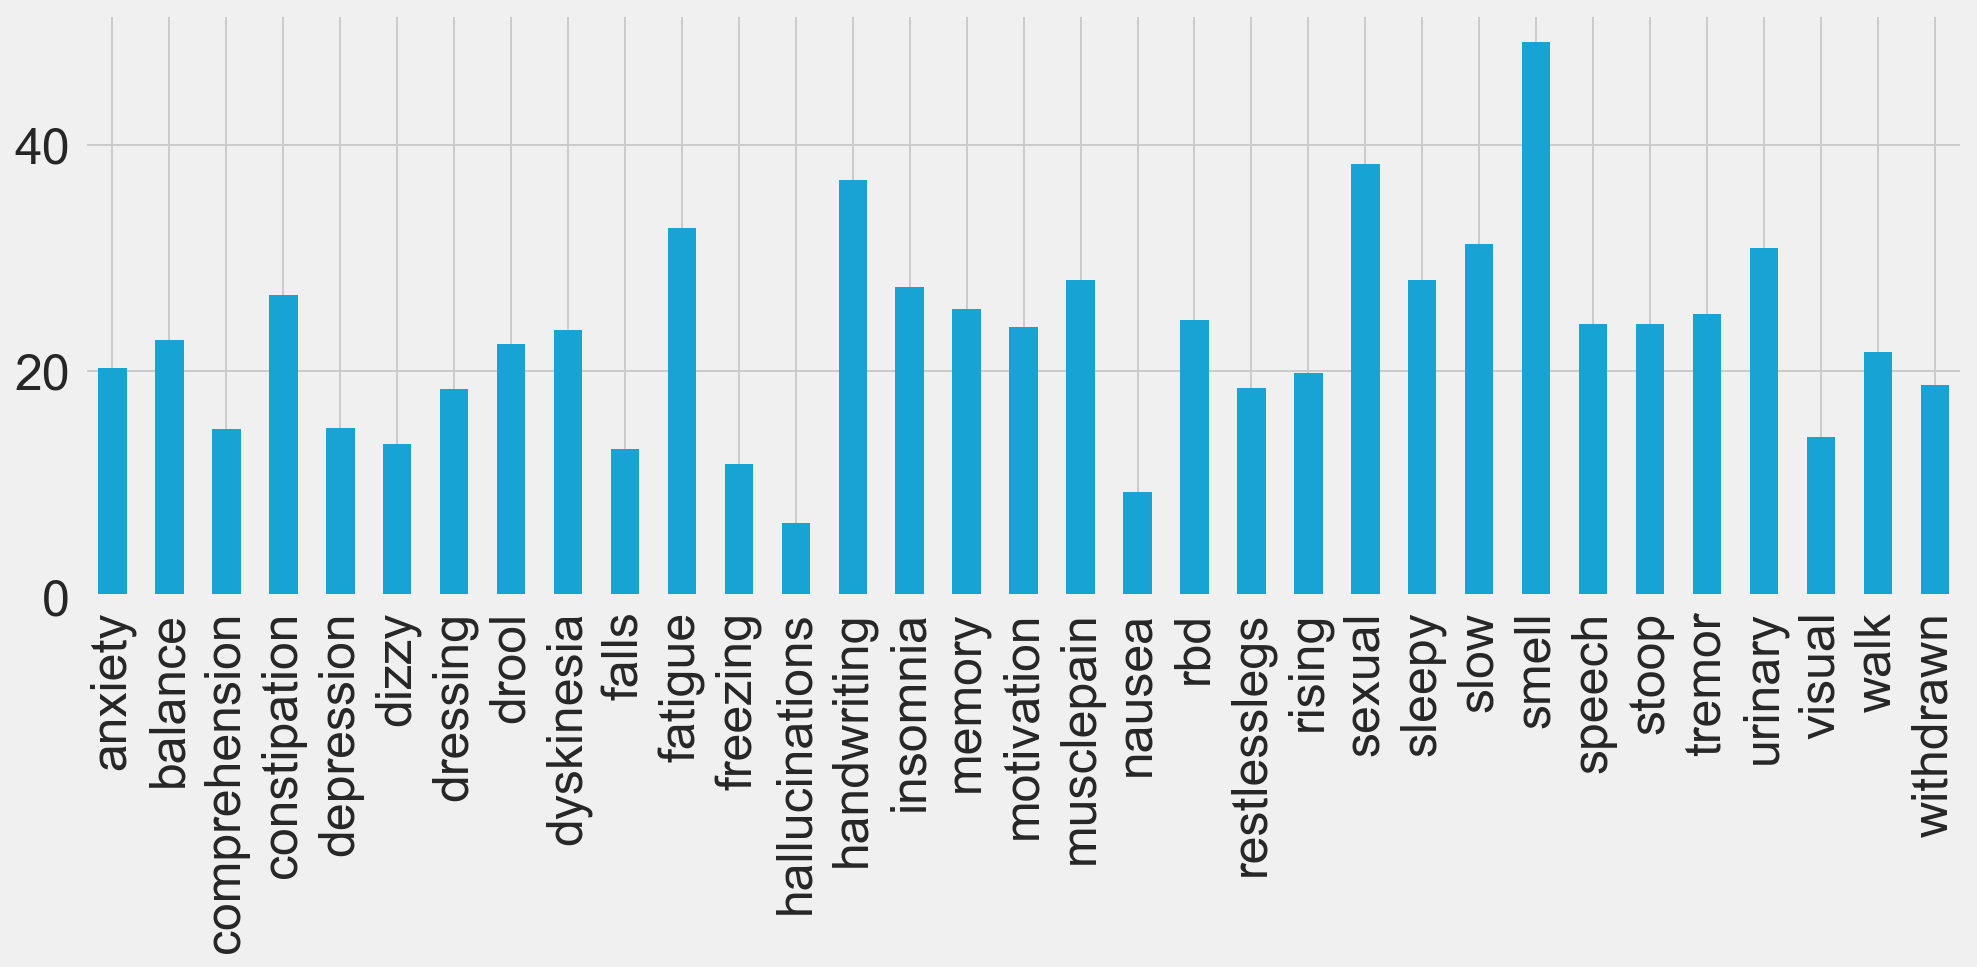

In [128]:
fig, ax = plt.subplots(figsize =(15,5))
df_symptoms_first_five_years.mean(axis = 0).plot(kind='bar', color ='#17a4d5', ax=ax);

The self-reported symptoms with higher scores, say above a mean of 30, and therefore have the most impact on participant health, are in order of impact: smell, sexual, handwriting, fatigue, urinary, and slow. 

According to the American Parkinson Disease Association (APDA): "There are five primary motor symptoms of Parkinson’s disease: tremor, rigidity, bradykinesia (slow movement), postural instability (balance problems), and walking/gait problems. Observing one or more of these symptoms is the main way that physicians diagnose Parkinson’s."

"Because Parkinson’s disease is a type of movement disorder, the associated non-motor symptoms can often be overlooked. However, there are several common symptoms of Parkinson’s disease that do not primarily involve movement: smell, sleep problems, depression and anxiety, psychosis, fatigue, cognitive changes, weight loss, gastrointestinal issues, urinary issues, sexual concerns, sweating, melanoma, personality changes, eye and vision issues."

Compare motor versus non-motor symptoms

In [129]:
pd.set_option('display.max_columns', None)

pd.pivot_table(df_symptoms_first_five_years,index=['study_version'],values=['slow', 'tremor', 'balance', 'fatigue', 'sleepy',
       'motivation', 'constipation', 'walk', 'rising', 'dressing', 'freezing',
       'falls', 'handwriting', 'drool', 'speech', 'visual', 'musclepain',
       'restlesslegs', 'rbd', 'insomnia', 'smell', 'nausea', 'depression',
       'anxiety', 'withdrawn', 'dizzy', 'stoop', 'memory', 'comprehension',
       'sexual', 'urinary', 'dyskinesia', 'hallucinations'],aggfunc=[np.mean])

mean                                                   \
                 anxiety    balance comprehension constipation depression   
study_version                                                               
1.0            26.966942  21.132231     16.958678    21.553719  16.512397   
2.0            23.712121  19.348485     15.848485    22.378788  17.924242   
3.0            21.036364  20.690909     12.836364    22.418182  16.109091   
4.0            20.264706  20.588235     12.764706    24.852941  16.058824   
5.0            17.708333  20.708333     11.833333    23.541667  11.916667   
6.0            22.538462  27.615385     24.461538    29.807692  16.692308   
7.0            20.750000  28.000000     20.375000    25.975000  14.850000   
8.0            18.203704  31.259259     15.685185    29.166667  13.351852   
9.0            20.727273  28.575758     15.787879    23.727273  16.666667   
10.0           21.000000  27.750000     17.000000    32.375000  15.125000   
11.0            9.500000   4.000000      0.000000    38.000000   9.500000   

                                                                      \
                   dizzy   dressing      drool dyskinesia      falls   
study_version                                                          
1.0            14.256198  15.247934  20.636364  16.099174  12.611570   
2.0            13.257576  15.045455  19.772727  16.393939   9.045455   
3.0            14.927273  14.618182  20.000000  16.127273  12.709091   
4.0            14.882353  13.235294  18.000000  17.382353   9.617647   
5.0             9.125000  18.916667  24.708333  20.458333  11.666667   
6.0            21.730769  28.807692  29.000000  21.923077  16.961538   
7.0            13.100000  22.000000  28.650000  17.825000  14.800000   
8.0            15.666667  23.851852  26.444444  23.370370  20.277778   
9.0            14.484848  24.272727  21.757576  24.030303  20.090909   
10.0           15.625000  25.125000  10.750000  41.625000  14.375000   
11.0            2.000000   1.500000  26.000000  44.500000   2.000000   

                                                                           \
                 fatigue   freezing hallucinations handwriting   insomnia   
study_version                                                               
1.0            33.082645  10.884298       5.057851   38.314050  28.842975   
2.0            30.439394   8.833333       7.151515   37.090909  26.515152   
3.0            29.363636  11.200000       5.945455   36.945455  29.109091   
4.0            35.294118  10.970588       2.441176   31.764706  33.588235   
5.0            35.041667  10.458333       3.375000   31.208333  30.458333   
6.0            41.692308  18.846154      11.038462   44.115385  31.307692   
7.0            42.825000  11.425000       8.225000   43.250000  34.250000   
8.0            35.851852  14.203704       6.166667   39.018519  33.092593   
9.0            40.545455  15.575758       9.575758   41.848485  29.909091   
10.0           28.750000  16.500000      10.875000   40.875000  19.875000   
11.0            6.000000   0.000000       2.500000   21.500000   5.000000   

                                                                      \
                  memory motivation musclepain     nausea        rbd   
study_version                                                          
1.0            26.694215  24.247934  28.561983   9.033058  22.090909   
2.0            27.530303  22.454545  28.015152   7.878788  21.196970   
3.0            22.600000  24.036364  30.454545   9.400000  23.563636   
4.0            25.970588  30.911765  32.382353  10.058824  18.323529   
5.0            19.375000  25.041667  27.750000   6.083333  17.833333   
6.0            34.576923  33.269231  33.884615  12.000000  27.692308   
7.0            33.000000  25.225000  30.100000   9.150000  21.650000   
8.0            29.555556  24.074074  33.333333   9.444444  25.888889   
9.0            26.575758  22.303030  29.575758  10.000000  32

#### Compare balance as key motor symptom with three global indicators of health for first five years of symptoms

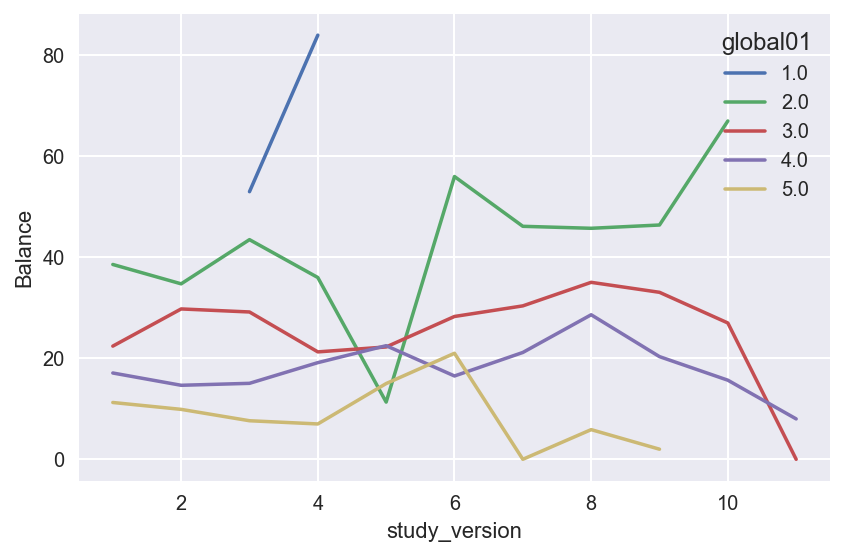

In [130]:
sns.set()  # use Seaborn styles
# births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
# plt.ylabel('total births per year');

# Global01 indicator:In general, would you say your health is:... 5, Excellent | 4, Very good | 3, Good | 2, Fair | 1, Poor

df_first_five_years.pivot_table('balance', index='study_version', columns=['global01',], aggfunc='mean').plot()
plt.ylabel('Balance');

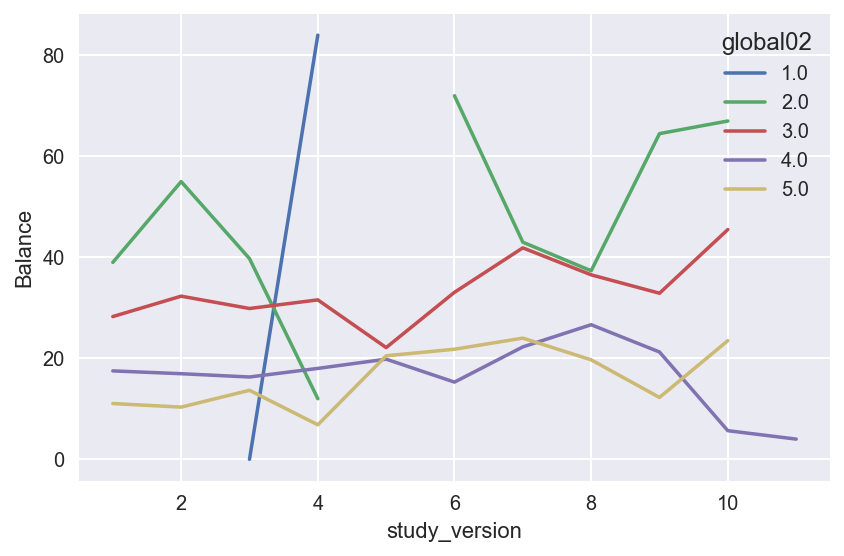

In [131]:
# Global02 indicator:In general, would you say your quality of life is:... 5, Excellent | 4, Very good | 3, Good | 2, Fair | 1, Poor

df_first_five_years.pivot_table('balance', index='study_version', columns=['global02',], aggfunc='mean').plot()
plt.ylabel('Balance');

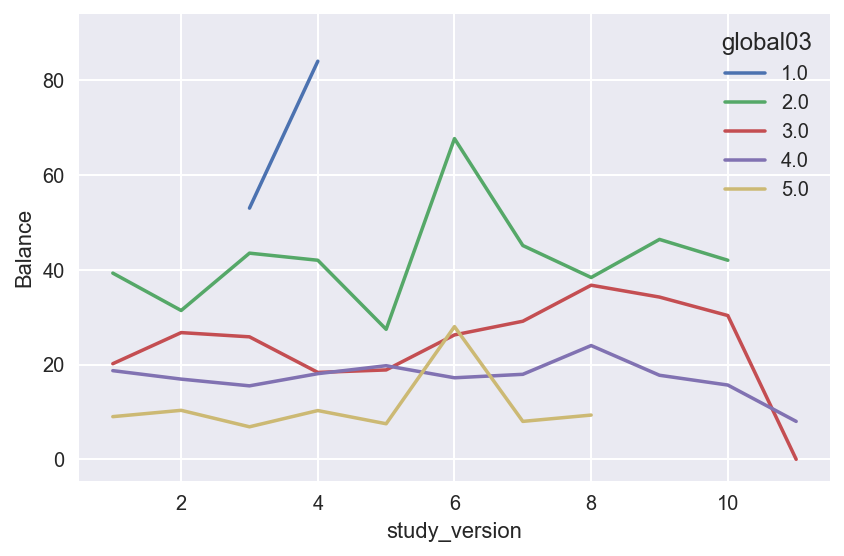

In [132]:
# Global03 indicator:In general, how would you rate your physical health?... 5, Excellent | 4, Very good | 3, Good | 2, Fair | 1, Poor

df_first_five_years.pivot_table('balance', index='study_version', columns=['global03',], aggfunc='mean').plot()
plt.ylabel('Balance');

#### Compare tremor as key motor symptom with three global indicators of health for first five years of symptoms

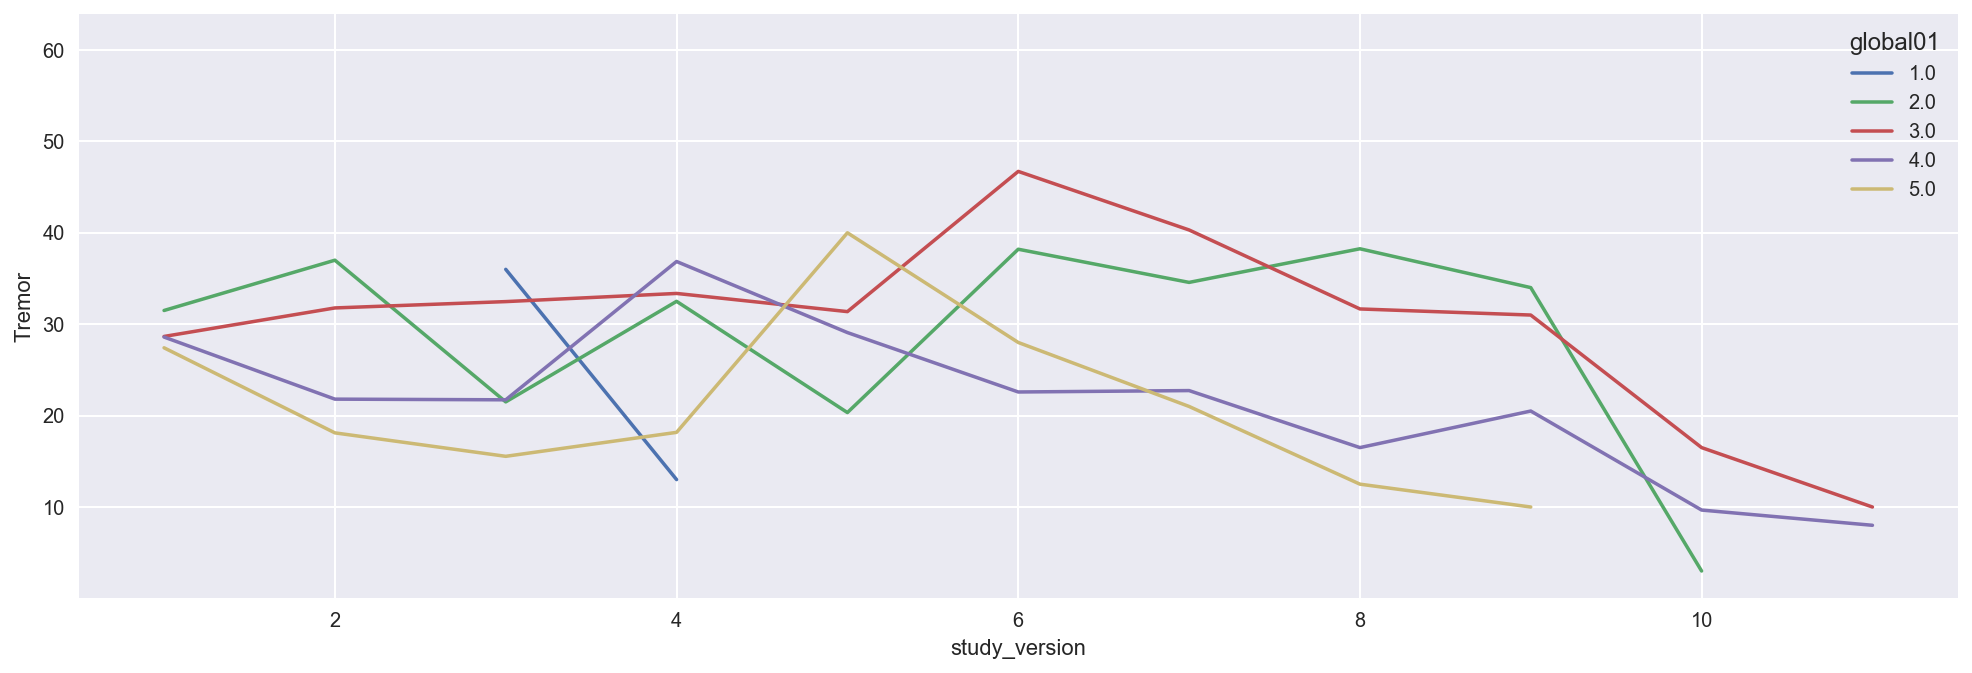

In [253]:
# Global01 indicator:In general, would you say your health is:... 5, Excellent | 4, Very good | 3, Good | 2, Fair | 1, Poor
fig, ax = plt.subplots(figsize =(15,5))
df_first_five_years.pivot_table('tremor', index='study_version', columns=['global01',], aggfunc='mean').plot(ax=ax)
plt.ylabel('Tremor');
plt.savefig('tremor_global01.pdf')

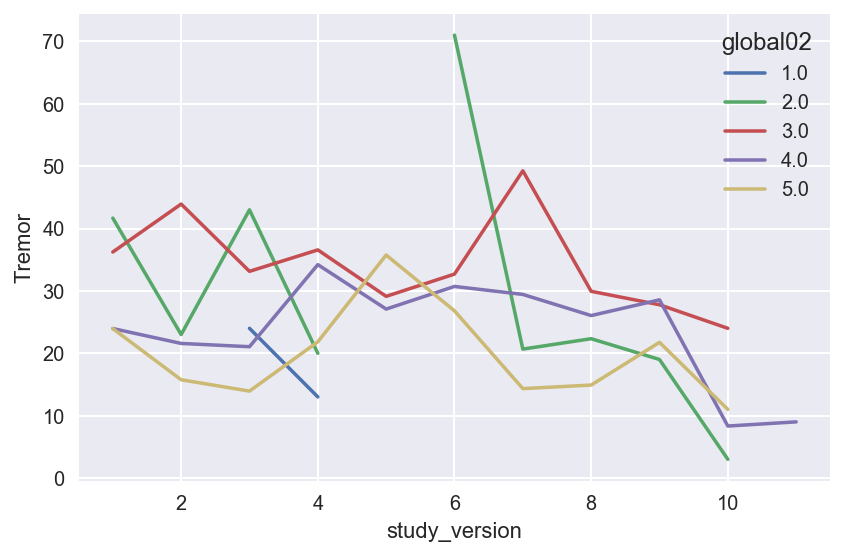

In [136]:
# Global02 indicator:In general, would you say your quality of life is:... 5, Excellent | 4, Very good | 3, Good | 2, Fair | 1, Poor

df_first_five_years.pivot_table('tremor', index='study_version', columns=['global02',], aggfunc='mean').plot()
plt.ylabel('Tremor');

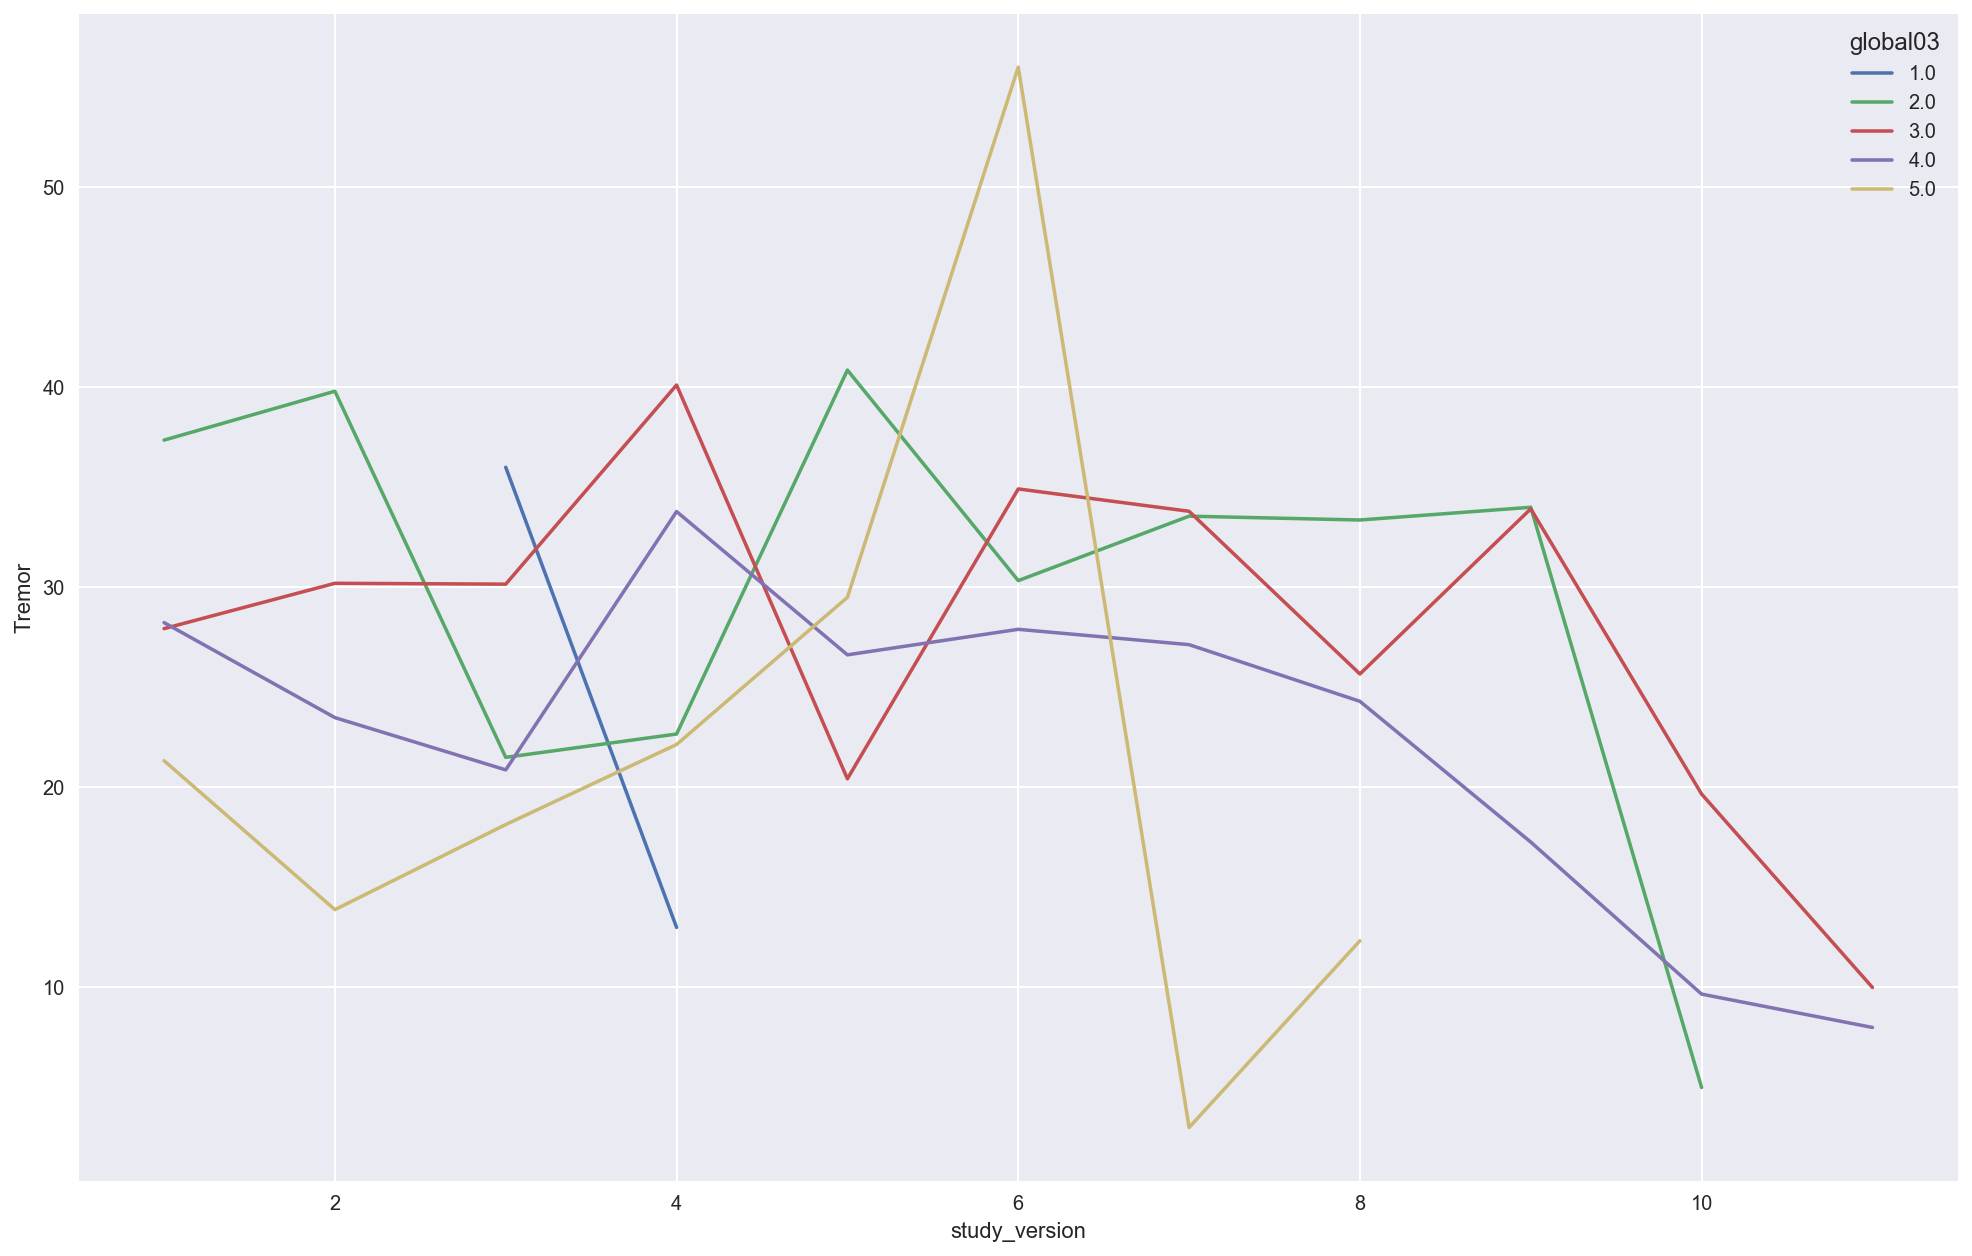

In [256]:
# Global03 indicator:In general, how would you rate your physical health?... 5, Excellent | 4, Very good | 3, Good | 2, Fair | 1, Poor
fig, ax = plt.subplots(figsize =(15,10))
df_first_five_years.pivot_table('tremor', index='study_version', columns=['global03',], aggfunc='mean').plot(ax=ax)
plt.ylabel('Tremor');
plt.savefig('tremor_global03.pdf')

In [ ]:
#### Compare tremor as key motor symptom with three global indicators of health for first five years of symptoms

#### Identify key symptoms after first five years time between symptom and diagnosis

In [138]:
after_five = df_clean['time_between_symptom_diagnosis'] > 5
less_than_zero = df_clean['time_between_symptom_diagnosis'] < 0
df_after_five_years = df_clean[first_five & less_than_zero]

In [139]:
df_symptoms_after_five_years = pd.pivot_table(df_after_five_years,index=['study_version'],values=['slow', 'tremor', 'balance', 'fatigue', 'sleepy',
       'motivation', 'constipation', 'walk', 'rising', 'dressing', 'freezing',
       'falls', 'handwriting', 'drool', 'speech', 'visual', 'musclepain',
       'restlesslegs', 'rbd', 'insomnia', 'smell', 'nausea', 'depression',
       'anxiety', 'withdrawn', 'dizzy', 'stoop', 'memory', 'comprehension',
       'sexual', 'urinary', 'dyskinesia', 'hallucinations'])

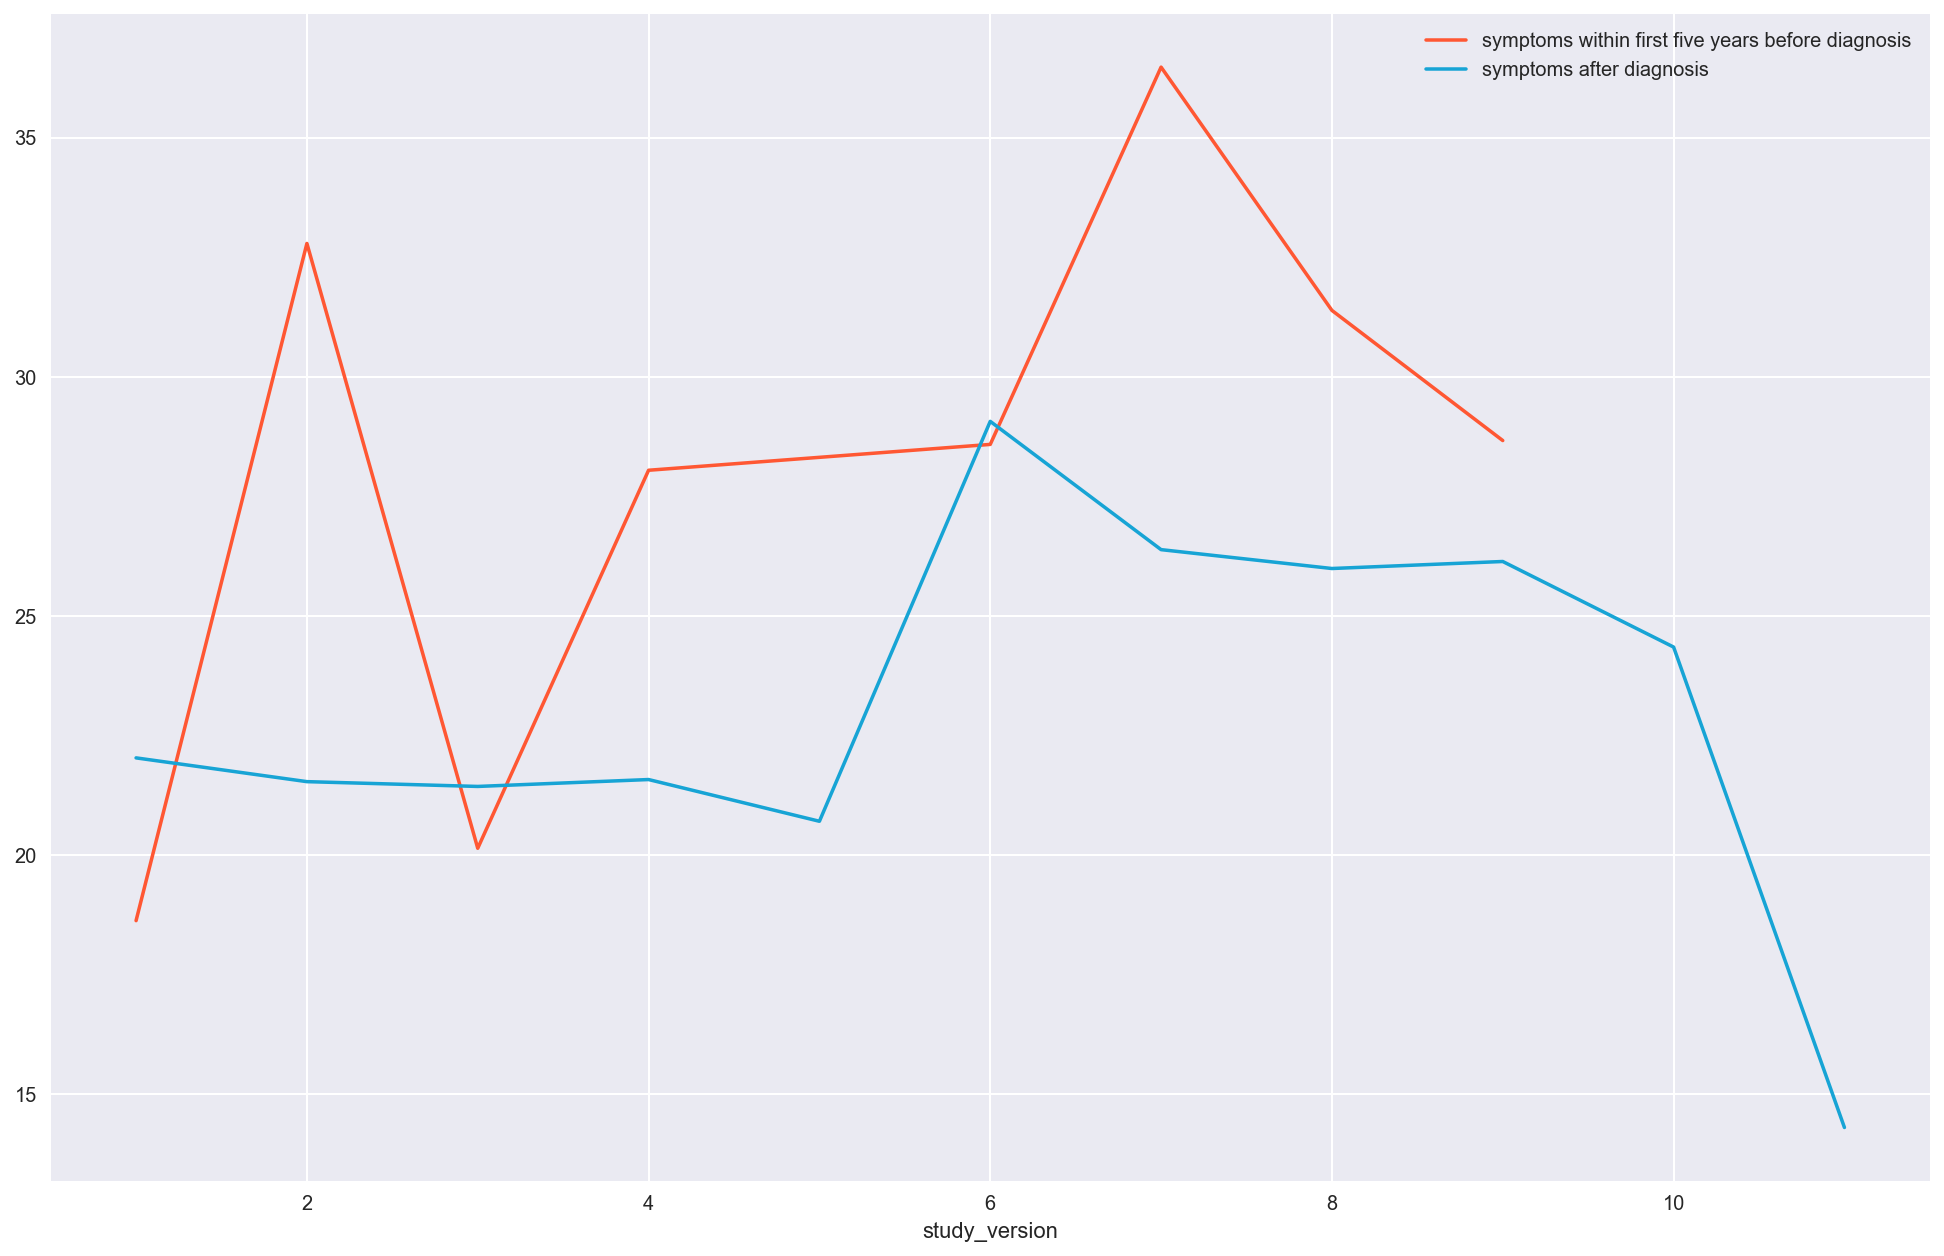

In [264]:
# Comparison of mean of symptoms scores across study versions
fig, ax = plt.subplots(figsize =(15,10))
df_symptoms_after_five_years.mean(axis = 1).plot(kind='line', color ='#FF5733', ax=ax, label ='symptoms within first five years before diagnosis');
df_symptoms_first_five_years.mean(axis = 1).plot(kind='line', color ='#17a4d5', ax=ax, label ='symptoms after diagnosis');
plt.legend();
plt.savefig('symptom_comparison_study_version.pdf')

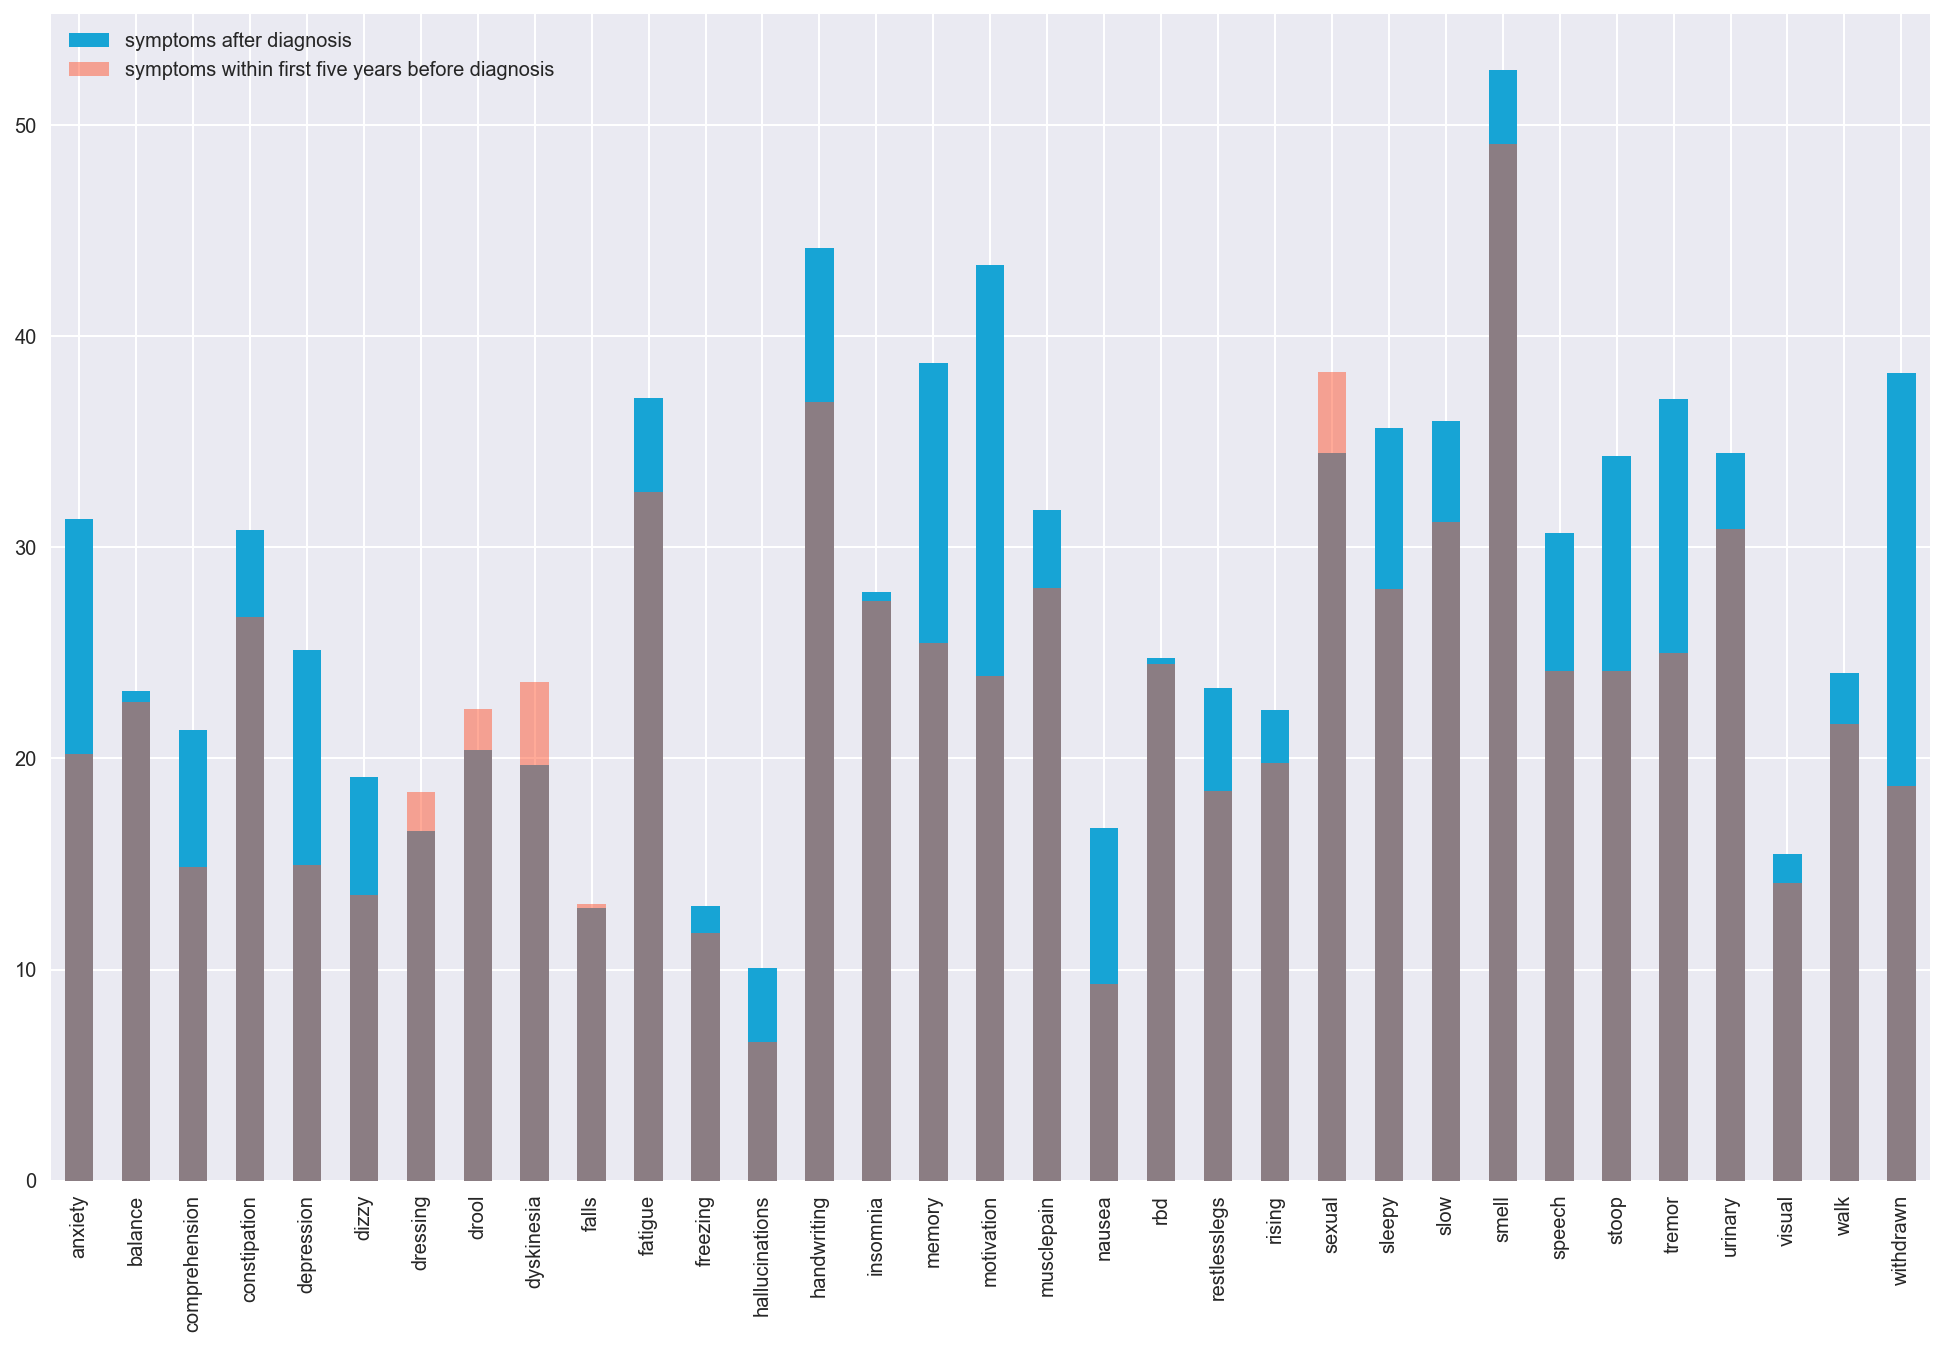

In [258]:
fig, ax = plt.subplots(figsize =(15,10))
df_symptoms_after_five_years.mean(axis = 0).plot(kind='bar', color ='#17a4d5', alpha = 1.0, ax=ax, label ='symptoms after diagnosis');
df_symptoms_first_five_years.mean(axis = 0).plot(kind='bar', color = '#FF5733', alpha = 0.5, ax=ax, label ='symptoms within first five years before diagnosis');
plt.legend();
plt.savefig('symptom_comparison.pdf')

In [145]:
df_after_five_years[['diagnosis_date', 'first_symptoms_date', 'time_between_symptom_diagnosis']].sort_values(by = 'time_between_symptom_diagnosis', ascending = False)

diagnosis_date first_symptoms_date  time_between_symptom_diagnosis
4826     2013-09-09          2013-11-10                            -1.0
3144     2014-07-22          2014-10-15                            -1.0
4042     2006-04-15          2006-07-15                            -1.0
2487     2011-01-01          2011-01-15                            -1.0
2206     2013-09-14          2014-05-06                            -1.0
2157     2003-05-19          2003-08-15                            -1.0
4150     2014-08-01          2014-10-15                            -1.0
1675     2016-08-23          2017-01-02                            -1.0
1651     2014-04-15          2014-10-08                            -1.0
1201     2011-05-05          2011-10-09                            -1.0
4605     1997-01-15          1997-03-15                            -1.0
729      2013-02-17          2013-06-15                            -1.0
4723     2016-06-15          2016-07-15                            -1.0
336      2017-05-15          2017-10-15                            -1.0
617      2014-11-03          2016-11-01                            -2.0
4082     2016-09-26          2018-05-15                            -2.0
3359     2015-12-15          2017-05-15                            -2.0
1073     2014-12-10          2017-08-15                            -3.0
3888     2014-12-09          2017-08-15                            -3.0
224      2014-07-14          2017-07-15                            -4.0
229      2013-07-01          2017-05-15                            -4.0
2267     2014-06-01          2018-02-07                            -4.0
2013     2014-05-13          2017-06-15                            -4.0
4052     2013-02-01          2017-09-15                            -5.0
4056     2010-04-15          2015-04-15                            -5.0
3552     2012-12-12          2018-09-15                            -6.0
3566     2012-05-01          2017-11-15                            -6.0
3052     2009-05-22          2018-04-22                            -9.0
2749     2007-05-04          2016-11-15                           -10.0
4318     2006-01-01          2015-01-15                           -10.0
2750     2007-05-04          2016-11-15                           -10.0
471      2007-01-01          2018-04-15                           -12.0
937      2004-06-15          2018-02-15                           -14.0
4512     1998-01-28          2017-11-01                           -20.0

#### Chart progress of key symptoms across study versions

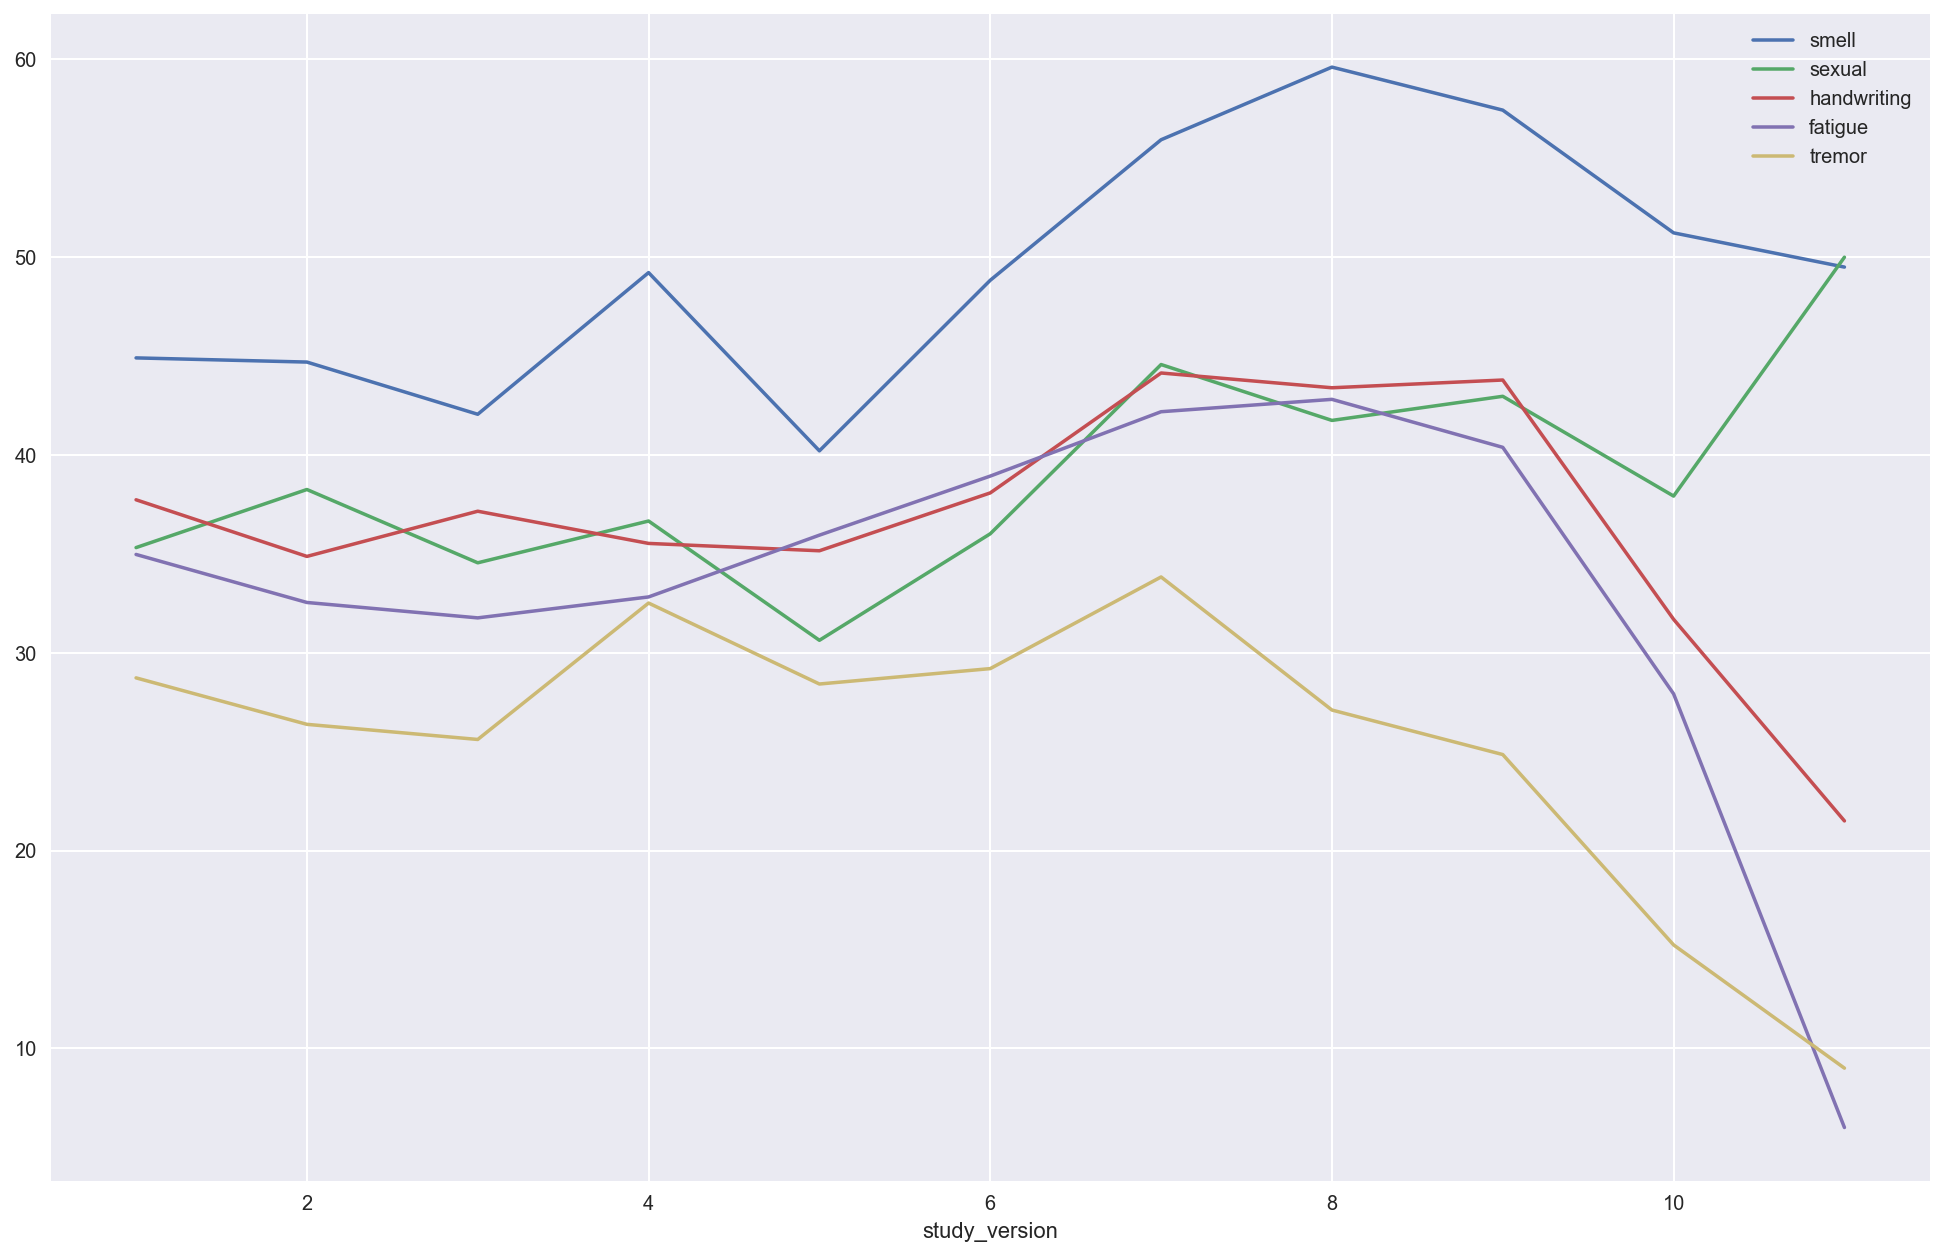

In [147]:
fig, ax = plt.subplots(figsize =(15,10))
df_clean.groupby('study_version')['smell', 'sexual','handwriting','fatigue','tremor'].mean().plot(kind='line', ax=ax);
plt.savefig('group_of_symptom_comparison_study_version.pdf')

#### Symptoms that predict poor quality of life

What symptoms are more prevalent in first five years Global 1-10 quality of life measure promise global short form from NIH - look at form as values reverse cumulative score - is there is a significant symptom that influences quality of life?

In [ ]:
# global02: In general, would you say your quality of life is:... 5, Excellent | 4, Very Good | 3, Good | 2, Fair | 1, Poor

In [148]:
df_clean['global02_poor'] = df_clean['global02'] == 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [149]:
df_clean['global02_poor'] = df_clean['global02_poor'].astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [150]:
df_clean['global02'].value_counts()

4.0    424
3.0    274
5.0    167
2.0     81
1.0      9
Name: global02, dtype: int64

In [151]:
X = df_clean[['slow', 'tremor', 'balance', 'fatigue', 'sleepy',
       'motivation', 'constipation', 'walk', 'rising', 'dressing', 'freezing',
       'falls', 'handwriting', 'drool', 'speech', 'visual', 'musclepain',
       'restlesslegs', 'rbd', 'insomnia', 'smell', 'nausea', 'depression',
       'sexual', 'urinary', 'dyskinesia', 'hallucinations']]
y = df_clean['global02_poor']

In [152]:
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True False False  True False  True  True  True  True
 False False False  True  True False  True  True  True  True  True False
  True False  True]
[ 1  1  1  1  7  9  1  3  1  1  1  1  8  5 10  1  1  6  1  1  1  1  1  4
  1  2  1]


In [153]:
estimator = RFE(estimator=LogisticRegression(), n_features_to_select=3)
v_transform = estimator.fit_transform(X,y)
print(estimator.support_)  # The mask of selected features.
print(estimator.ranking_)  # The feature ranking

[False False False  True False False False False False False  True False
 False False False False False False False False False False  True False
 False False False]
[ 9  5 10  1 22 24 14 18 15  6  1 11 23 20 25  3  2 21 16  7 13  4  1 19
  8 17 12]


In [154]:
X = df_clean[['fatigue','freezing','depression']]

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [156]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [157]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.192499
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          global02_poor   No. Observations:                  955
Model:                          Logit   Df Residuals:                      952
Method:                           MLE   Df Model:                            2
Date:                Tue, 17 Jul 2018   Pseudo R-squ.:                  -2.609
Time:                        00:06:11   Log-Likelihood:                -183.84
converged:                       True   LL-Null:                       -50.938
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
fatigue       -0.1508      0.016     -9.581      0.000      -0.182      -0.120
freezing       0.0107      0.

In [158]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.988


In [159]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[285   1]
 [  1   0]]


In [160]:
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [161]:
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
df_conf_norm

Predicted         0    1       All
Actual                            
0          0.498252  0.5  0.498258
1          0.001748  0.0  0.001742
All        0.500000  0.5  0.500000

In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       286
          1       0.00      0.00      0.00         1

avg / total       0.99      0.99      0.99       287



The three symptoms that predict poor quality of life are fatigue, freezing, and depression.

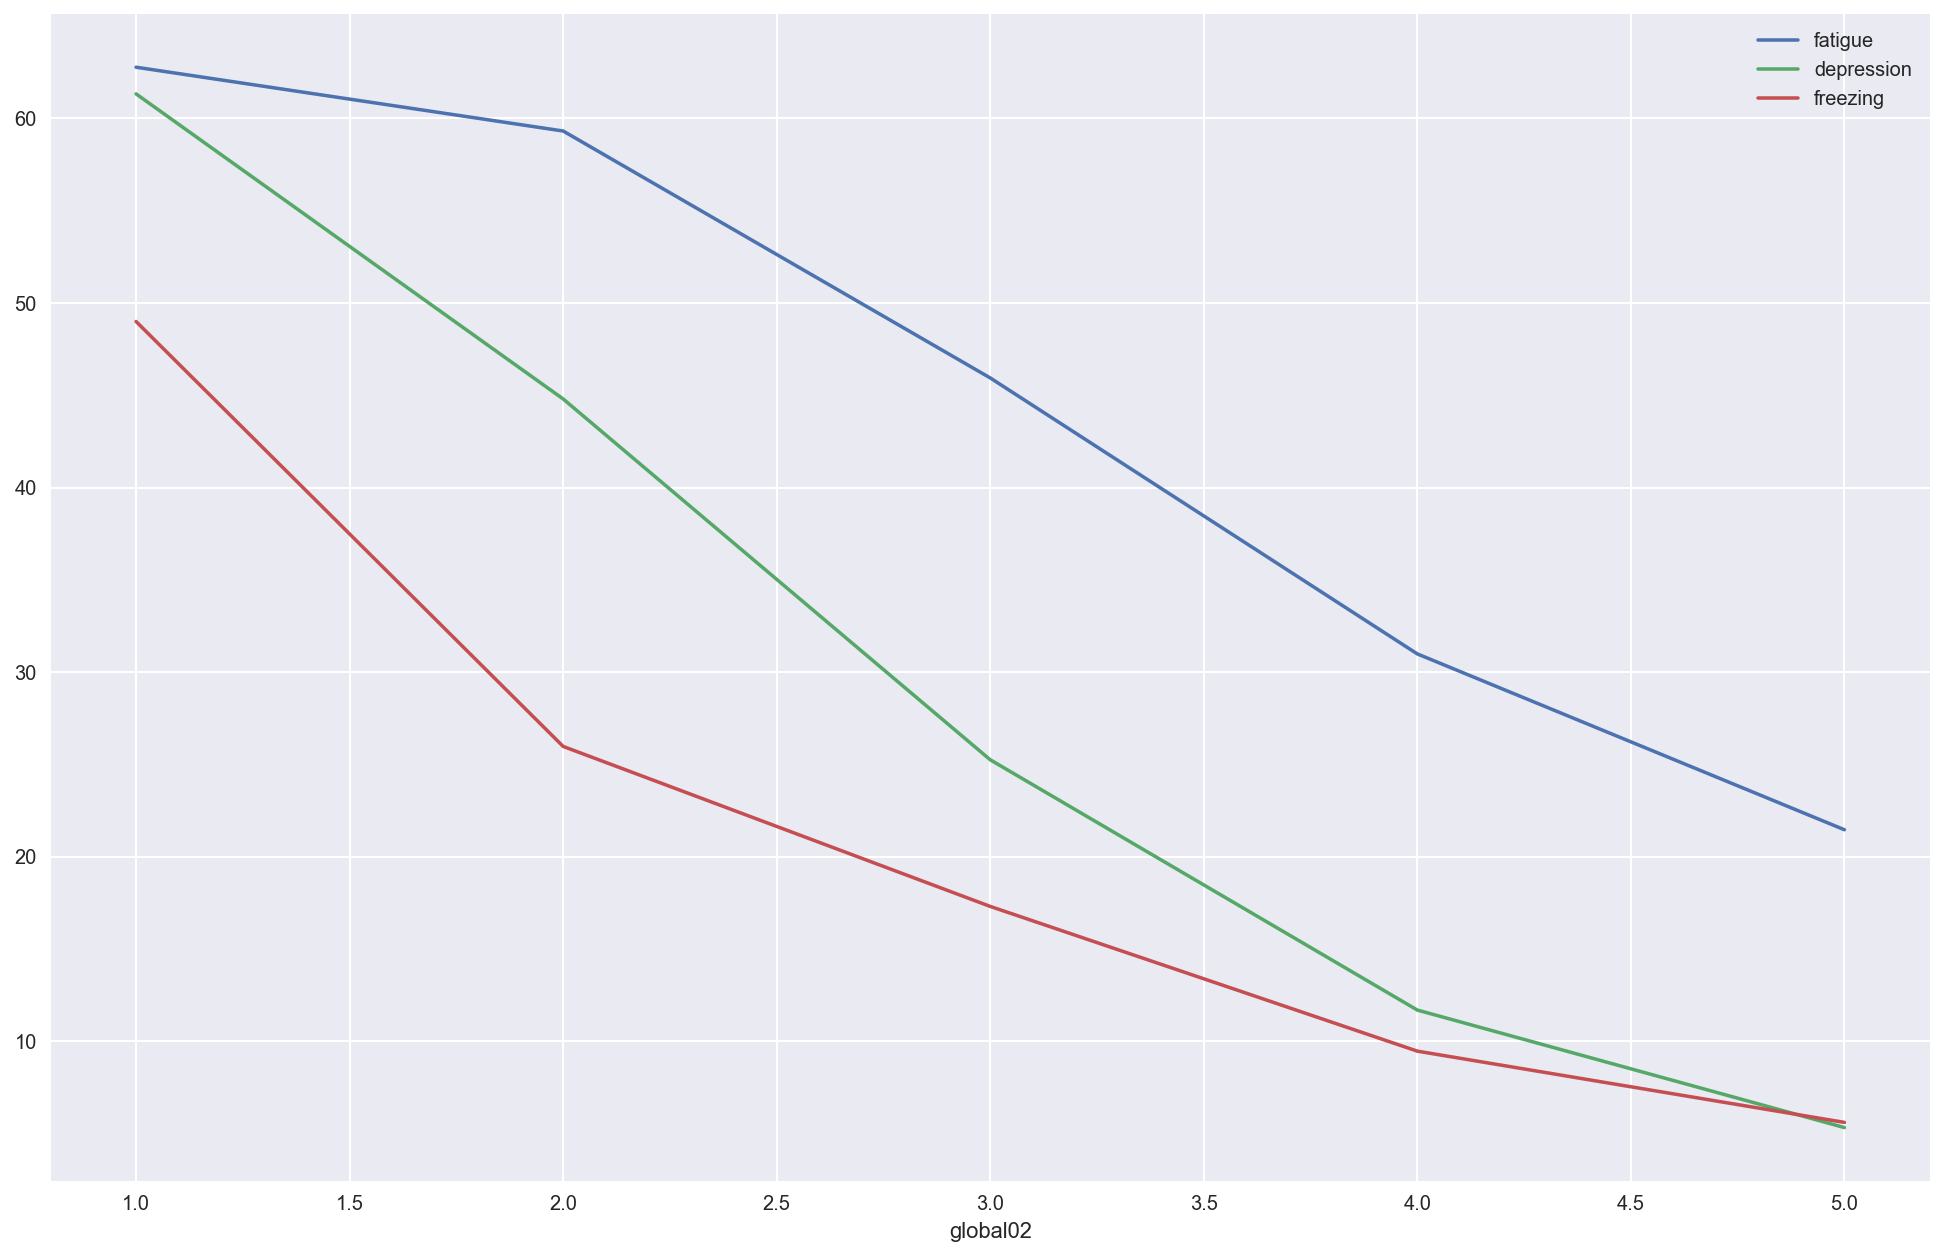

In [166]:
fig, ax = plt.subplots(figsize =(15,10))
df_clean.groupby('global02')['fatigue', 'depression','freezing'].mean().plot(kind='line', ax=ax);
plt.savefig('symptom_comparison_global02.pdf')

#### Symptoms that predict poor health

In [167]:
df_clean['global01'].value_counts()

4.0    389
3.0    339
2.0    116
5.0    100
1.0     11
Name: global01, dtype: int64

In [168]:
df_clean['global01_poor'] = df_clean['global01'] == 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [169]:
df_clean['global01_poor'] = df_clean['global01_poor'].astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [170]:
X = df_clean[['slow', 'tremor', 'balance', 'fatigue', 'sleepy',
       'motivation', 'constipation', 'walk', 'rising', 'dressing', 'freezing',
       'falls', 'handwriting', 'drool', 'speech', 'visual', 'musclepain',
       'restlesslegs', 'rbd', 'insomnia', 'smell', 'nausea', 'depression',
       'sexual', 'urinary', 'dyskinesia', 'hallucinations']]
y = df_clean['global01_poor']

In [171]:
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False  True  True False False False
  True  True  True  True  True  True False False  True False  True False
 False  True  True]
[ 1  1  1  1  1  1  4  1  1  9  5  6  1  1  1  1  1  1 10  2  1  3  1  7
  8  1  1]


In [172]:
estimator = RFE(estimator=LogisticRegression(), n_features_to_select=3)
v_transform = estimator.fit_transform(X,y)
print(estimator.support_)  # The mask of selected features.
print(estimator.ranking_)  # The feature ranking

[False  True  True False False False False False False False False False
 False False False False False False False False False False  True False
 False False False]
[11  1  1  4  6  8 19 10 12 24 20 21  9  7  5 14  3 13 25 17  2 18  1 22
 23 15 16]


In [173]:
X = df_clean[['tremor', 'balance','depression']]

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [175]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [176]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.167311
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          global01_poor   No. Observations:                  955
Model:                          Logit   Df Residuals:                      952
Method:                           MLE   Df Model:                            2
Date:                Tue, 17 Jul 2018   Pseudo R-squ.:                  -1.661
Time:                        00:07:39   Log-Likelihood:                -159.78
converged:                       True   LL-Null:                       -60.038
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
tremor        -0.1640      0.018     -9.003      0.000      -0.200      -0.128
balance       -0.0406      0.

In [177]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.985


In [178]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[286   0]
 [  1   0]]


In [181]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       286
          1       0.00      0.00      0.00         1

avg / total       0.99      1.00      0.99       287



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The symptoms that predict poor health are tremor, balance, and depression.

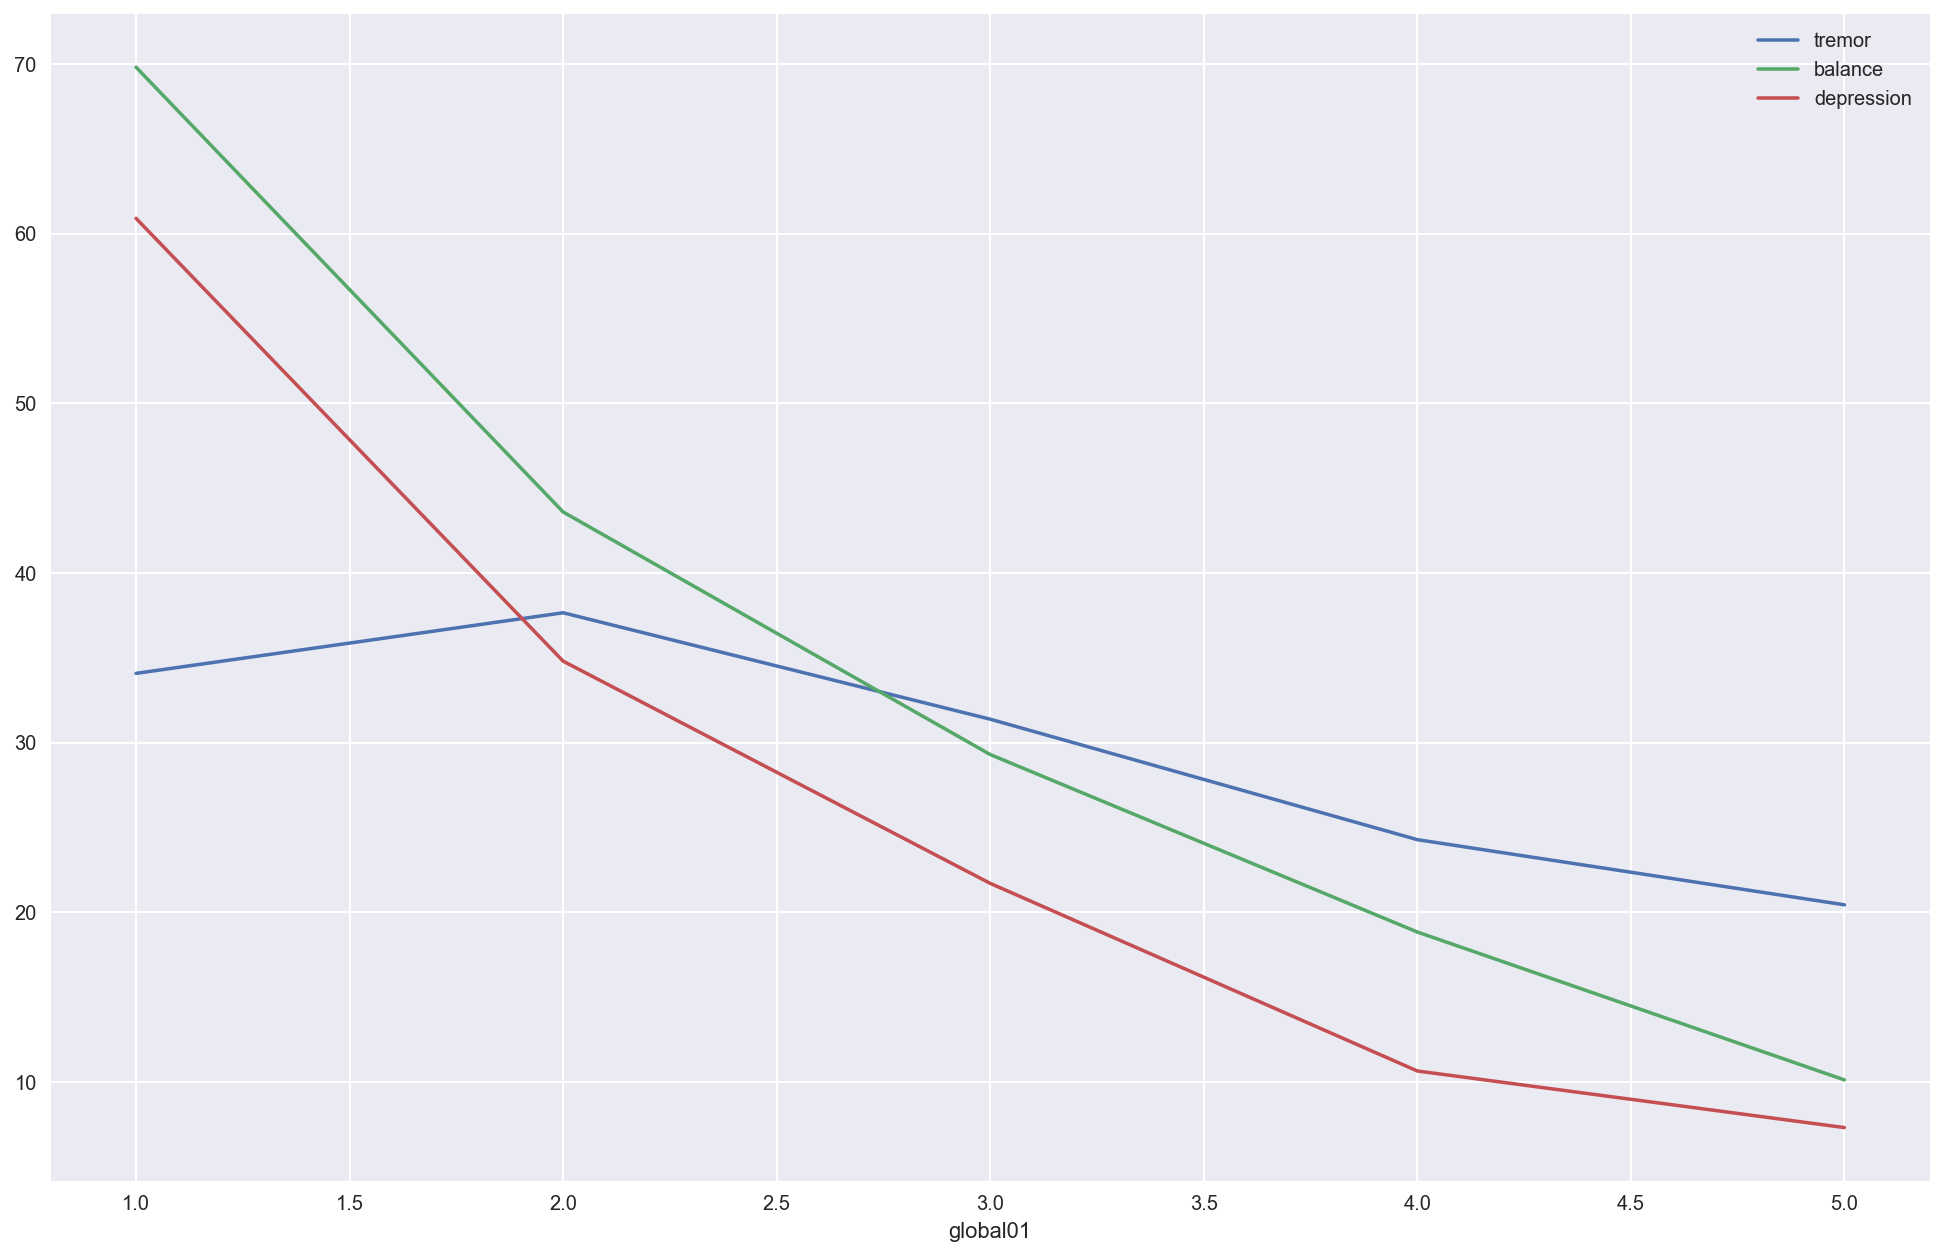

In [183]:
fig, ax = plt.subplots(figsize =(15,10))
df_clean.groupby('global01')['tremor', 'balance','depression'].mean().plot(kind='line', ax=ax);
plt.savefig('symptom_comparison_global01.pdf')

#### Symptoms that predict poor physical health

In [184]:
df_clean['global03'].value_counts()

4.0    383
3.0    337
2.0    139
5.0     83
1.0     13
Name: global03, dtype: int64

In [185]:
df_clean['global03_poor'] = df_clean['global03'] == 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [186]:
df_clean['global03_poor'] = df_clean['global03_poor'].astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [187]:
X = df_clean[['slow', 'tremor', 'balance', 'fatigue', 'sleepy',
       'motivation', 'constipation', 'walk', 'rising', 'dressing', 'freezing',
       'falls', 'handwriting', 'drool', 'speech', 'visual', 'musclepain',
       'restlesslegs', 'rbd', 'insomnia', 'smell', 'nausea', 'depression',
       'sexual', 'urinary', 'dyskinesia', 'hallucinations']]
y = df_clean['global03_poor']

In [188]:
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True False  True  True False  True False  True  True
 False  True False  True  True  True False  True  True  True  True False
 False  True False]
[ 1  1  1  1  5  1  1  2  1  6  1  1 10  1  4  1  1  1  8  1  1  1  1  9
  7  1  3]


In [189]:
estimator = RFE(estimator=LogisticRegression(), n_features_to_select=3)
v_transform = estimator.fit_transform(X,y)
print(estimator.support_)  # The mask of selected features.
print(estimator.ranking_)  # The feature ranking

[False False  True False False False False False False False False False
 False  True False False False False False False False False  True False
 False False False]
[ 6  4  1 11 20  2  7 17  3 21 14 16 25  1 19  9 10  8 23 13  5 12  1 24
 22 15 18]


In [190]:
X = df_clean[['balance','drool', 'depression']]

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [192]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [193]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.259135
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          global03_poor   No. Observations:                  955
Model:                          Logit   Df Residuals:                      952
Method:                           MLE   Df Model:                            2
Date:                Tue, 17 Jul 2018   Pseudo R-squ.:                  -2.599
Time:                        00:08:40   Log-Likelihood:                -247.47
converged:                       True   LL-Null:                       -68.769
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
balance       -0.0549      0.010     -5.576      0.000      -0.074      -0.036
drool         -0.0887      0.

In [194]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.986


In [195]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[283   0]
 [  4   0]]


In [198]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       283
          1       0.00      0.00      0.00         4

avg / total       0.97      0.99      0.98       287



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The symptoms that predict poor physical health are balance, drool, and depression. 

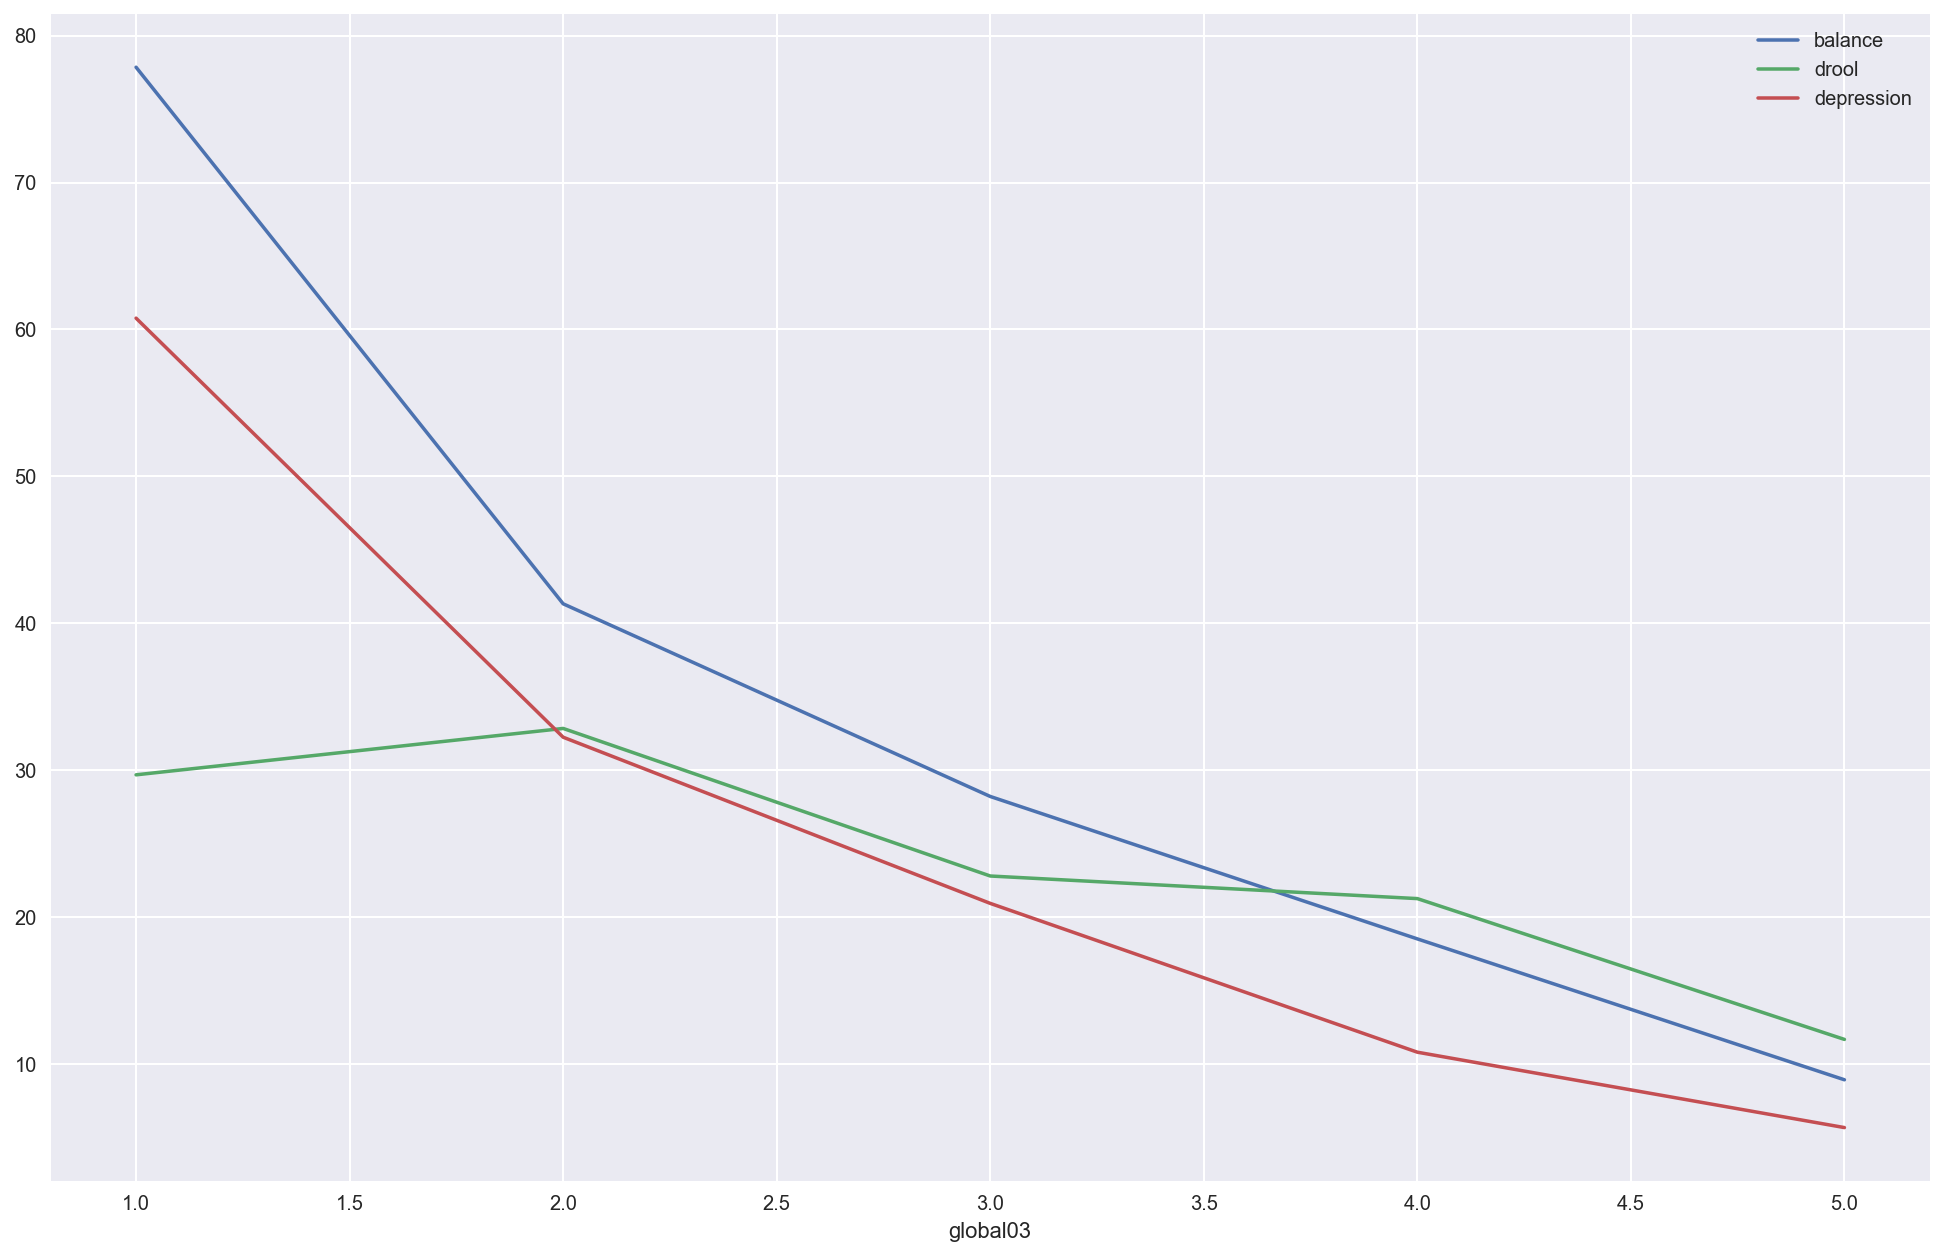

In [200]:
fig, ax = plt.subplots(figsize =(15,10))
df_clean.groupby('global03')['balance', 'drool','depression'].mean().plot(kind='line', ax=ax);
plt.savefig('symptom_comparison_global03.pdf')

In [ ]:
# mask = np.triu_indices(df_patient_reported_outcome.shape[1], k=1)
# dates = df_patient_reported_outcome.index.get_level_values(0)
# avgs = [df_patient_reported_outcome.loc[date].values[mask].mean() 
#         for date in dates]

# s = pd.Series(avgs, index=dates)
# s.dropna()

# print(s.tail())

### Impact of loneliness on health

In [ ]:
df_clean.columns

In [201]:
# What is your current marital or partnership status? 1, Married | 2, Divorced | 3, Single | 4, Domestic partnership | 5, Other
df_clean['marital'].value_counts()

1.0    712
2.0    100
4.0     58
3.0     53
5.0     32
Name: marital, dtype: int64

In [202]:
# friends: I have lots of friends True/False
df_clean['friends'].value_counts()

1.0    630
0.0    325
Name: friends, dtype: int64

In [203]:
# loneliness: I am lonely True/False
df_clean['lonely'].value_counts()

0.0    821
1.0    134
Name: lonely, dtype: int64

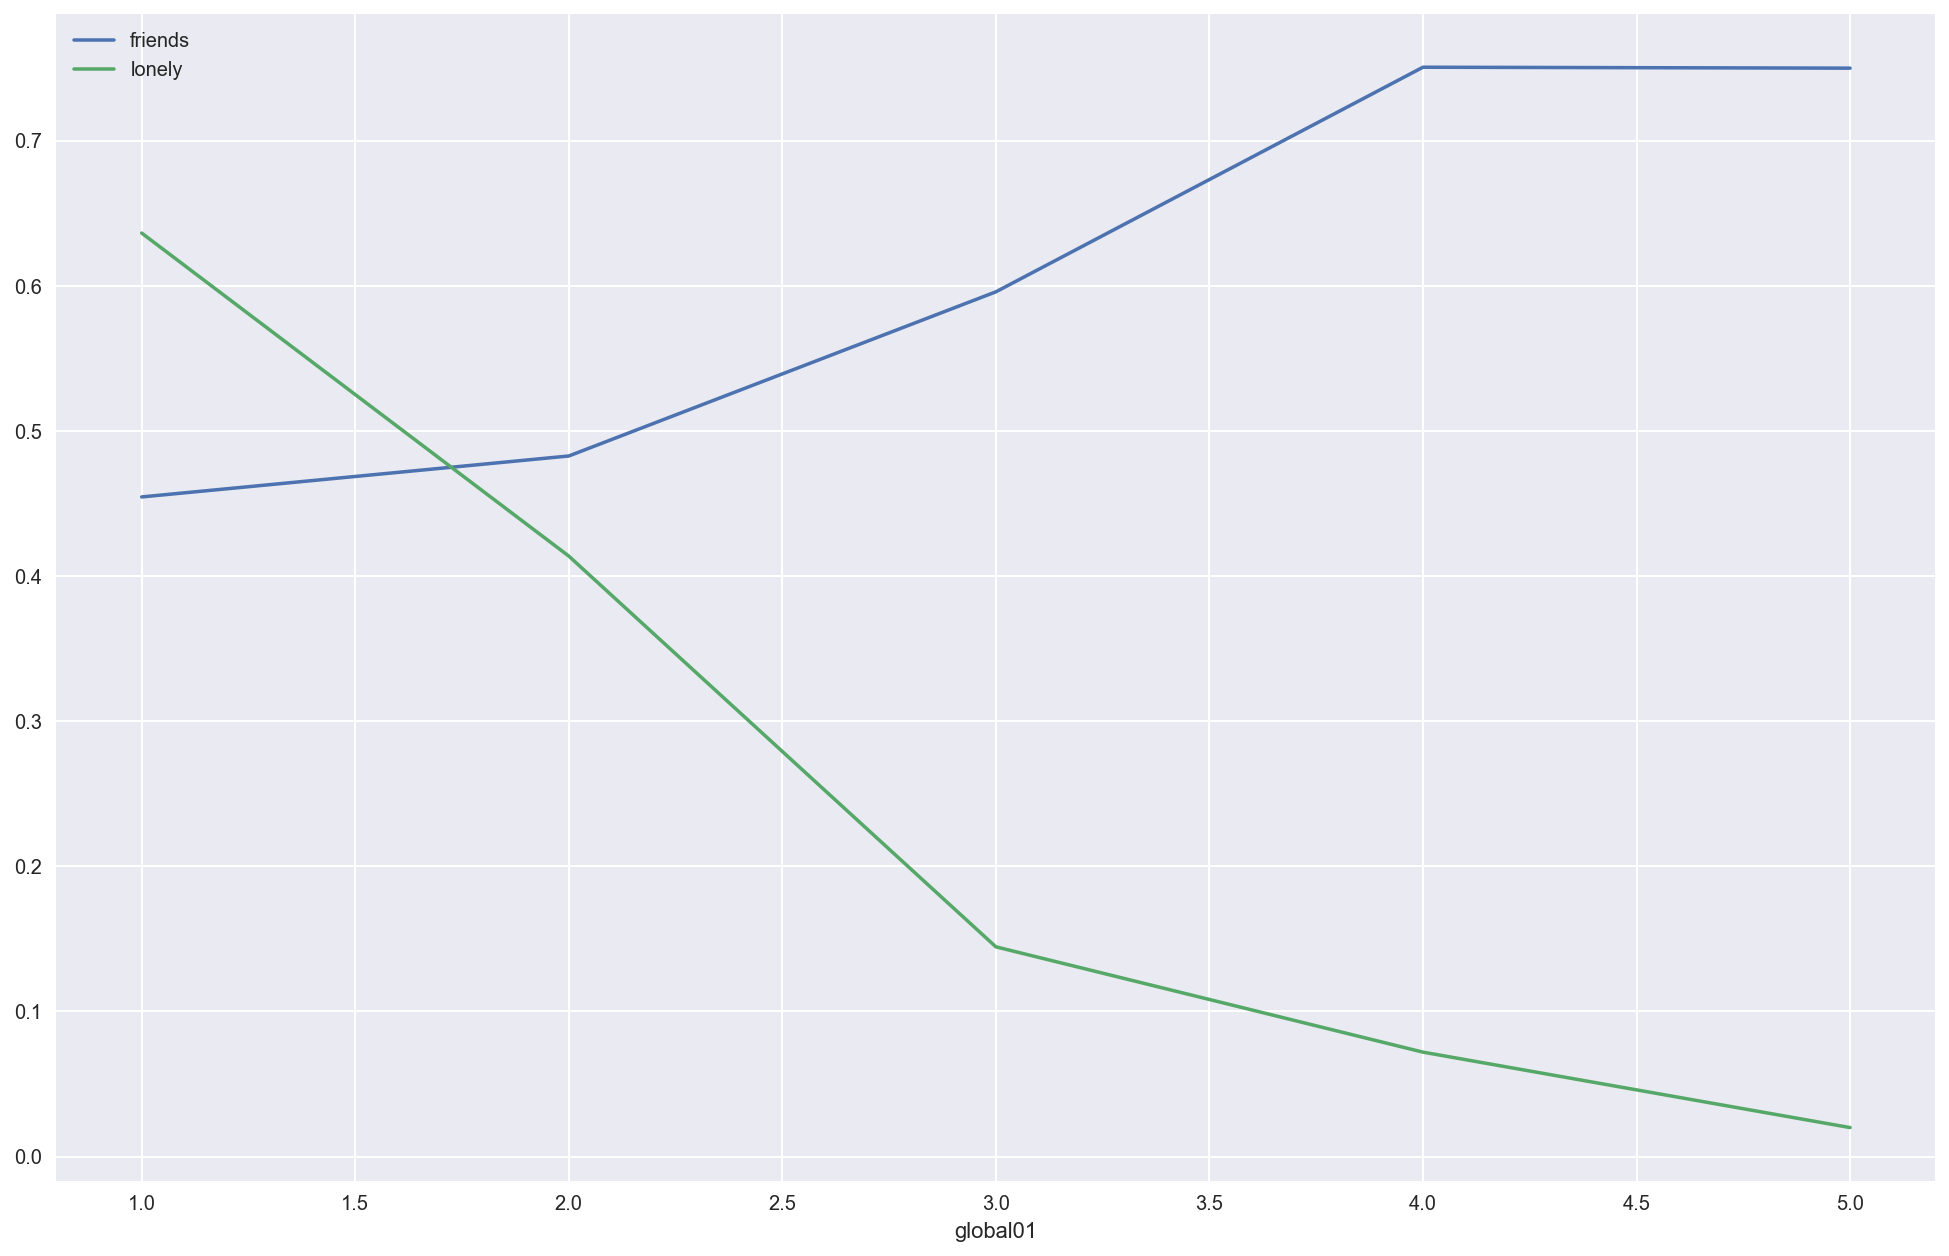

In [259]:
# Impact of friends and loneliness on general health
fig, ax = plt.subplots(figsize =(15,10))
df_clean.groupby('global01')['friends','lonely'].mean().plot(kind='line', ax=ax);
plt.savefig('global01_lonely.pdf')

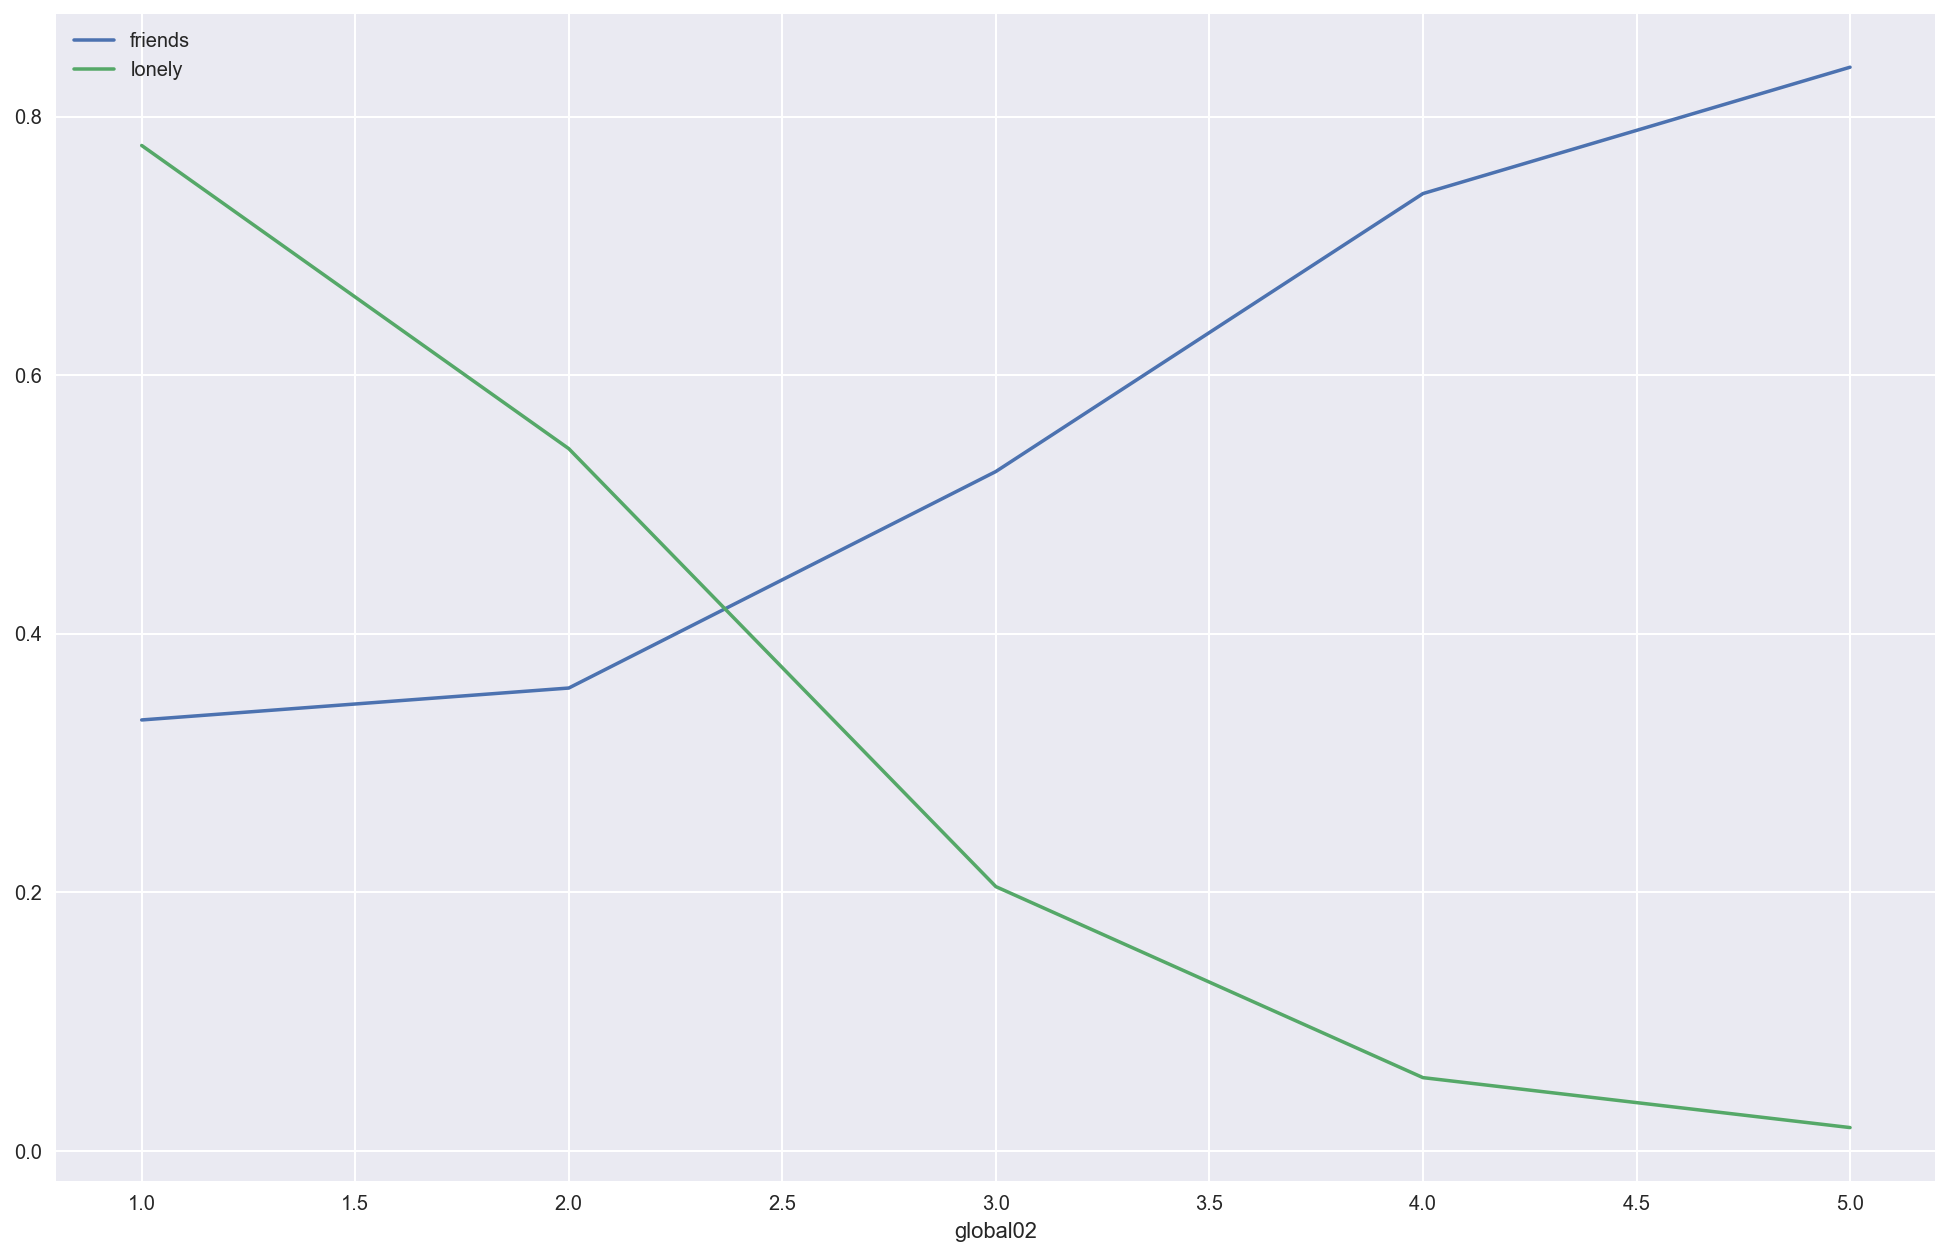

In [260]:
# Impact of friends and loneliness on quality of life
fig, ax = plt.subplots(figsize =(15,10))
df_clean.groupby('global02')['friends','lonely'].mean().plot(kind='line', ax=ax);
plt.savefig('global02_lonely.pdf')

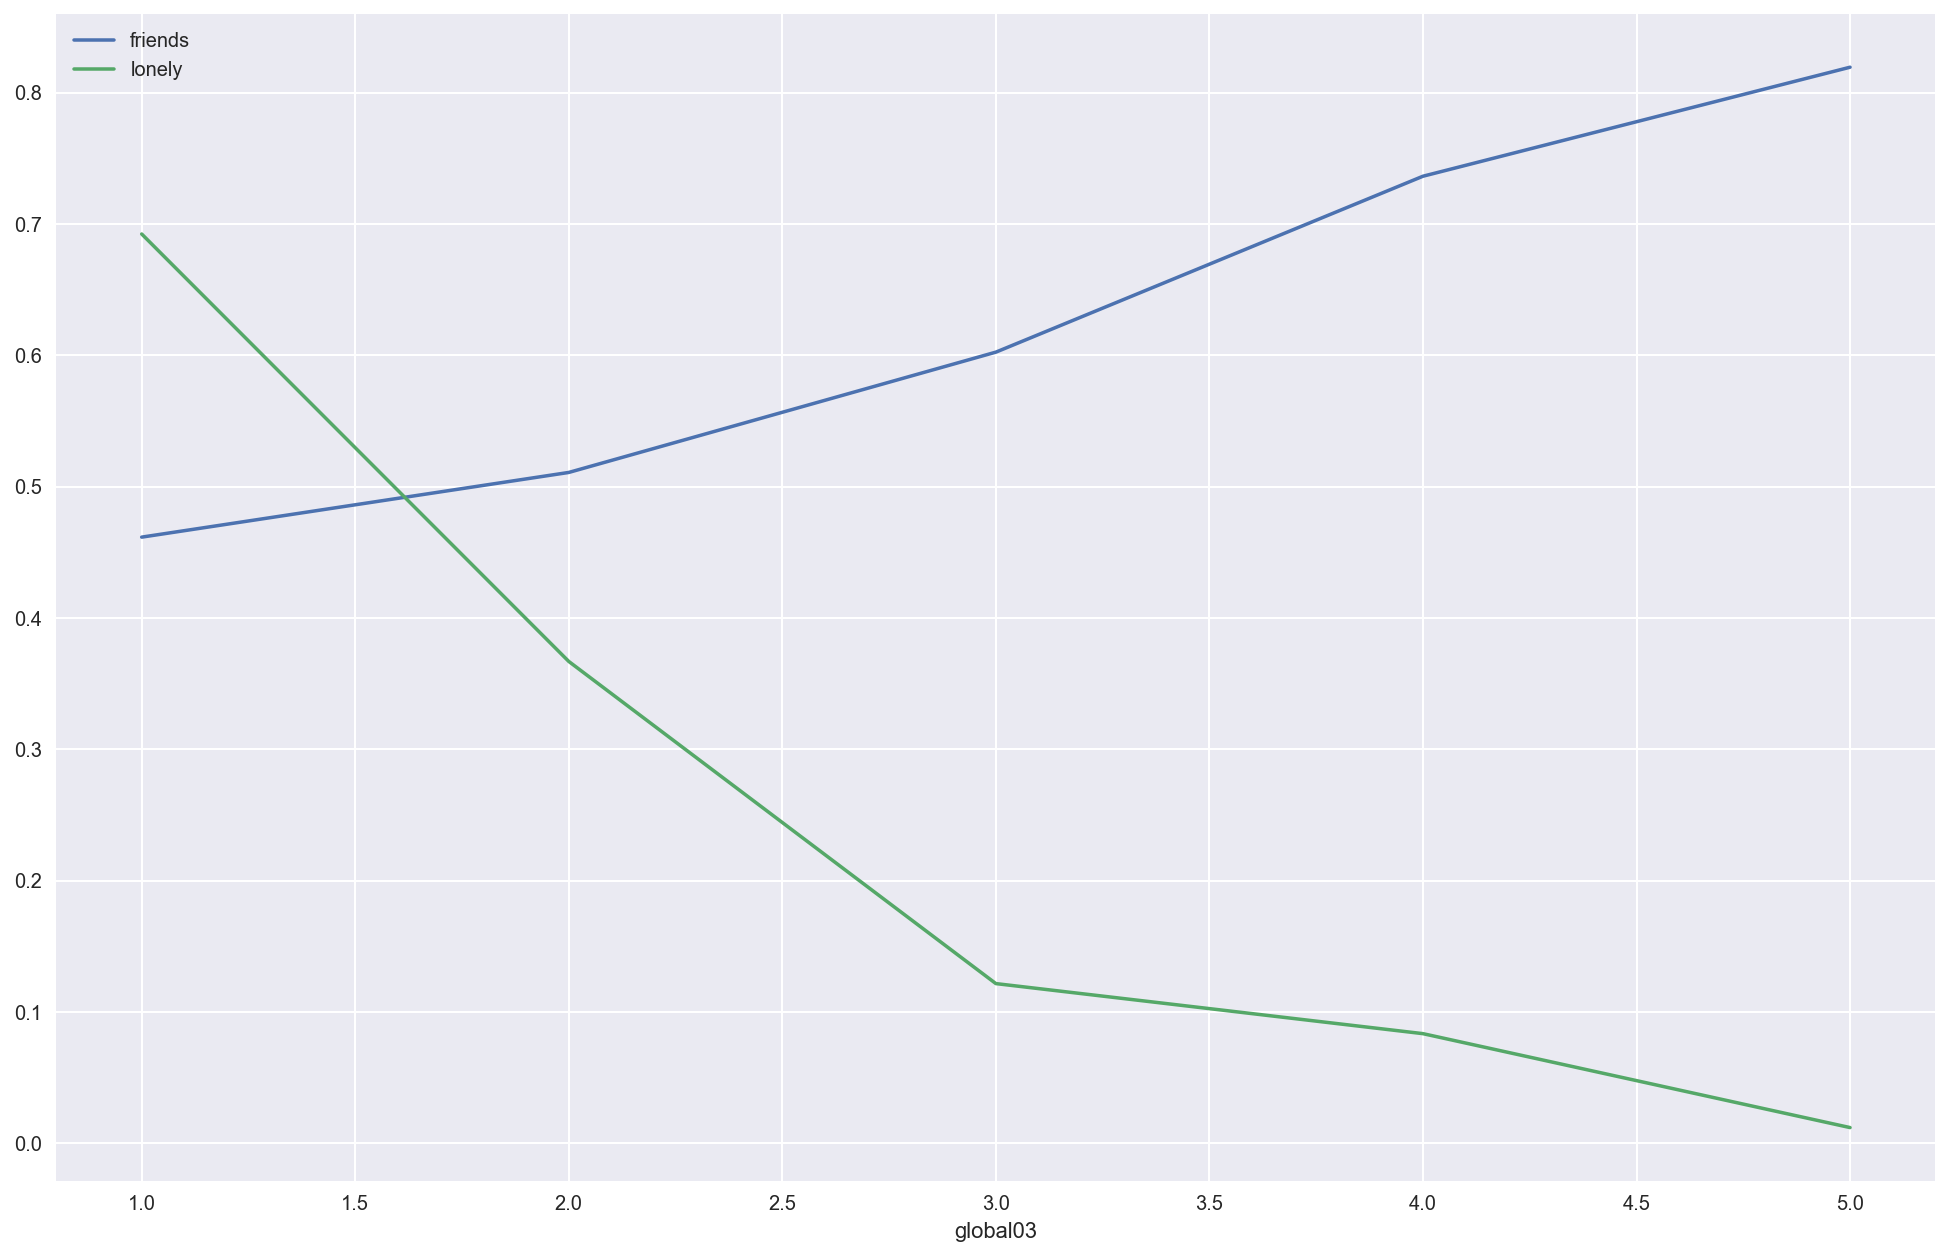

In [261]:
# Impact of friends and loneliness on physical health
fig, ax = plt.subplots(figsize =(15,10))
df_clean.groupby('global03')['friends','lonely'].mean().plot(kind='line', ax=ax);
plt.savefig('global03_lonely.pdf')

### Impact of marital status on health

In [209]:
# dummy marital status columns 
df_marital = pd.get_dummies(df_clean['marital'])

In [210]:
df_clean_new = pd.concat([df_clean, df_marital], axis=1)

In [211]:
df_clean_new.head()

participant_id  study_version record_id patient_birthdate  consent  \
1             1605            1.0    EPHE58        1958-05-08      1.0   
3              171            8.0    CCTC74        1974-05-14      1.0   
10             469            8.0    KBHN65        1965-06-29      1.0   
12             469            7.0    KBHN65        1965-06-29      1.0   
16             545            6.0    TAPD65        1965-06-26      1.0   

    whosays  todaydate diagnosis_date first_symptoms_date  diagnosis  \
1       1.0 2017-11-14     2012-03-01          2005-08-15        1.0   
3       1.0 2017-10-29     2013-09-09          2007-07-15        1.0   
10      1.0 2018-02-23     2014-04-15          2013-12-15        1.0   
12      1.0 2017-08-16     2014-04-30          2012-04-15        1.0   
16      1.0 2017-06-06     2015-07-15          2011-08-15        1.0   

    progression_6_months  disease_stage  slow  tremor  balance  fatigue  \
1                    2.0            3.0  67.0    53.0     85.0     77.0   
3                    2.0            1.0  73.0    70.0     31.0     68.0   
10                   3.0            2.0  22.0     7.0     18.0     64.0   
12                   2.0            1.0  19.0    11.0     20.0     84.0   
16                   2.0            1.0  25.0    58.0     28.0     64.0   

    sleepy  motivation  constipation  walk  rising  dressing  freezing  falls  \
1     68.0        70.0          67.0  72.0    87.0      86.0      35.0   50.0   
3     70.0        65.0          38.0  72.0    78.0      71.0      55.0   31.0   
10    26.0        23.0          10.0  42.0    61.0       7.0      12.0    0.0   
12    74.0        85.0           4.0  26.0    13.0       9.0       0.0    7.0   
16    58.0        53.0          18.0  23.0    10.0      12.0      15.0    0.0   

    handwriting  drool  speech  visual  musclepain  restlesslegs   rbd  \
1          40.0    2.0    52.0    36.0        58.0          53.0  57.0   
3          62.0   40.0    64.0    58.0        75.0          68.0  36.0   
10         64.0    0.0    10.0    10.0        76.0          70.0   0.0   
12         23.0    0.0     0.0     0.0        71.0          68.0   0.0   
16         55.0    0.0    19.0     0.0        63.0          47.0  24.0   

    insomnia  smell  nausea  depression  anxiety  withdrawn  dizzy  stoop  \
1       63.0   47.0    18.0        76.0     72.0       40.0   63.0   63.0   
3       62.0   75.0    64.0        70.0     69.0       63.0   59.0   60.0   
10      63.0   58.0     0.0         0.0     16.0       18.0    0.0    0.0   
12      78.0   78.0    10.0         0.0     12.0       69.0    0.0    0.0   
16      19.0    0.0     0.0        20.0     30.0       25.0    0.0   10.0   

    memory  comprehension  sexual  urinary  dyskinesia  hallucinations  \
1     66.0           27.0     5.0     67.0         6.0             8.0   
3     58.0           58.0    88.0     89.0        76.0            30.0   
10    12.0            9.0    83.0      0.0         0.0             0.0   
12    14.0           14.0    92.0      0.0         0.0             0.0   
16    24.0           10.0     0.0      0.0         3.0             2.0   

    patient_reported_outcome  global01  global02  global03  global04  \
1                     1736.0       2.0       3.0       2.0       3.0   
3                     2046.0       2.0       2.0       2.0       2.0   
10                     781.0       4.0       4.0       4.0       4.0   
12                     881.0       3.0       4.0       3.0       4.0   
16                     715.0       3.0       3.0       4.0       3.0   

    global05  global09  global06  global10  global08  global07  gender  \
1        4.0       2.0       3.0       4.0       3.0       4.0     2.0   
3        2.0       2.0       2.0       4.0       4.0       8.0     2.0   
10       4.0       3.0       3.0       3.0       3.0       4.0     2.0   
12       4.0       4.0       4.0       1.0       3.0       3.0     2.0   
16       3.0       3.0       5.0

In [212]:
# rename columns: 1, Married | 2, Divorced | 3, Single | 4, Domestic partnership | 5, Other
df_clean_new.rename(columns={1.0: 'married',
                   2.0: 'divorced',
                   3.0: 'single',
                   4.0: 'domestic_partnership',
                   5.0: 'other'
                  }, inplace=True)

In [213]:
df_clean_new.columns

Index(['participant_id', 'study_version', 'record_id', 'patient_birthdate',
       'consent', 'whosays', 'todaydate', 'diagnosis_date',
       'first_symptoms_date', 'diagnosis', 'progression_6_months',
       'disease_stage', 'slow', 'tremor', 'balance', 'fatigue', 'sleepy',
       'motivation', 'constipation', 'walk', 'rising', 'dressing', 'freezing',
       'falls', 'handwriting', 'drool', 'speech', 'visual', 'musclepain',
       'restlesslegs', 'rbd', 'insomnia', 'smell', 'nausea', 'depression',
       'anxiety', 'withdrawn', 'dizzy', 'stoop', 'memory', 'comprehension',
       'sexual', 'urinary', 'dyskinesia', 'hallucinations',
       'patient_reported_outcome', 'global01', 'global02', 'global03',
       'global04', 'global05', 'global09', 'global06', 'global10', 'global08',
       'global07', 'gender', 'deep_brain_stimulation', 'wgt', 'hgt', 'marital',
       'race_ethnicity', 'highestedu', 'income', 'friends', 'lonely', 'age',
       'time_between_symptom_diagnosis', 'male', 'fe

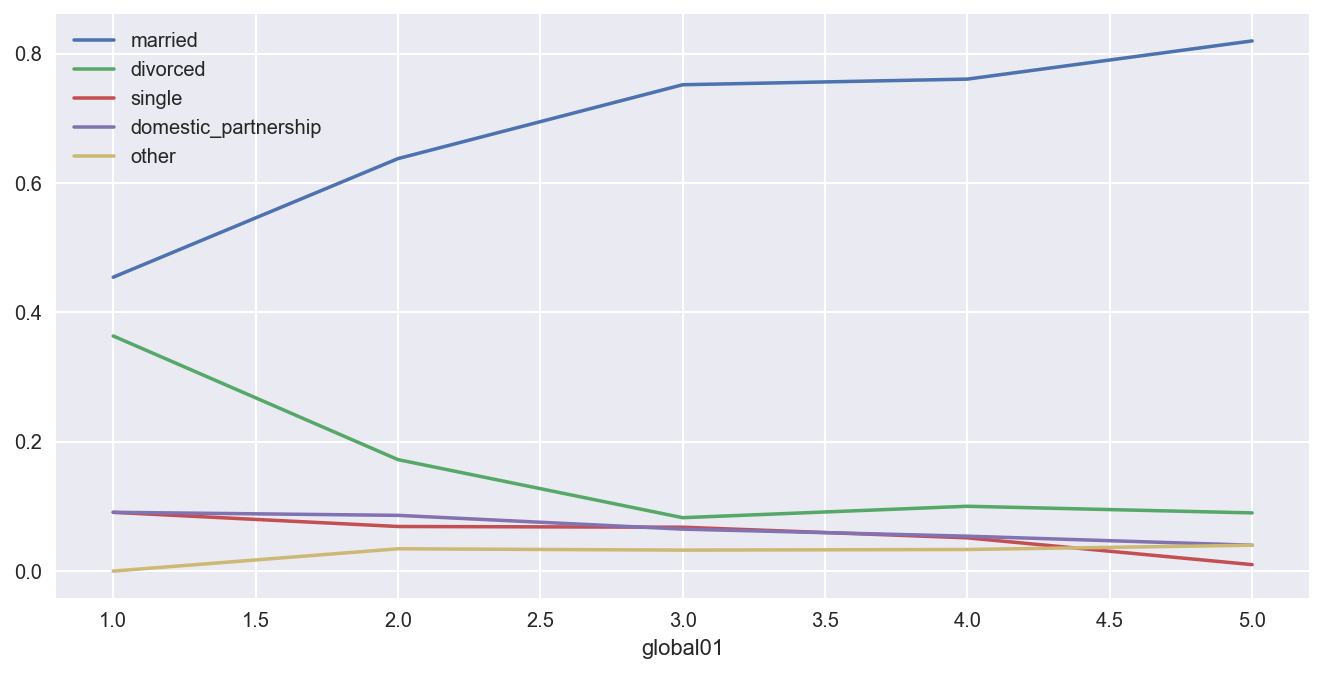

In [215]:
# Impact of marital status on general health
fig, ax = plt.subplots(figsize =(10,5))
df_clean_new.groupby('global01')['married', 'divorced', 'single', 'domestic_partnership', 'other'].mean().plot(kind='line', ax=ax);
plt.savefig('global_01_marital.pdf')

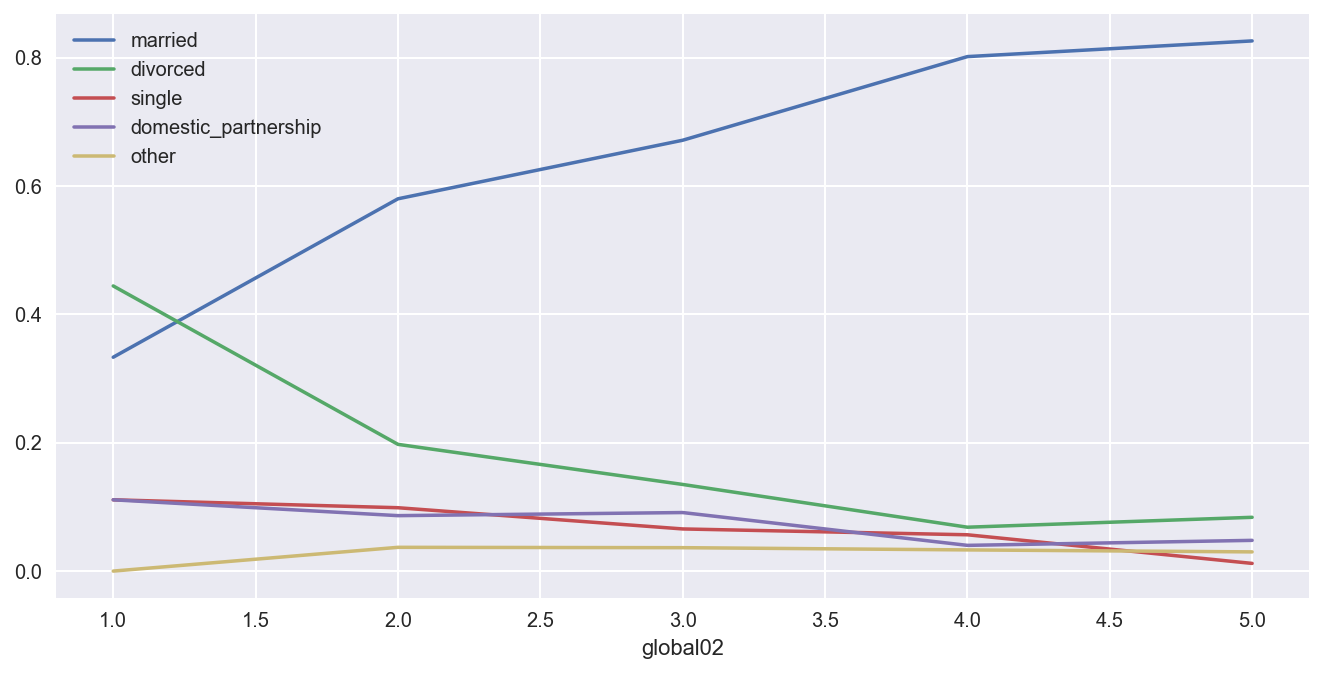

In [216]:
# Impact of marital status on quality of life
fig, ax = plt.subplots(figsize =(10,5))
df_clean_new.groupby('global02')['married', 'divorced', 'single', 'domestic_partnership', 'other'].mean().plot(kind='line', ax=ax);
plt.savefig('global_02_marital.pdf')

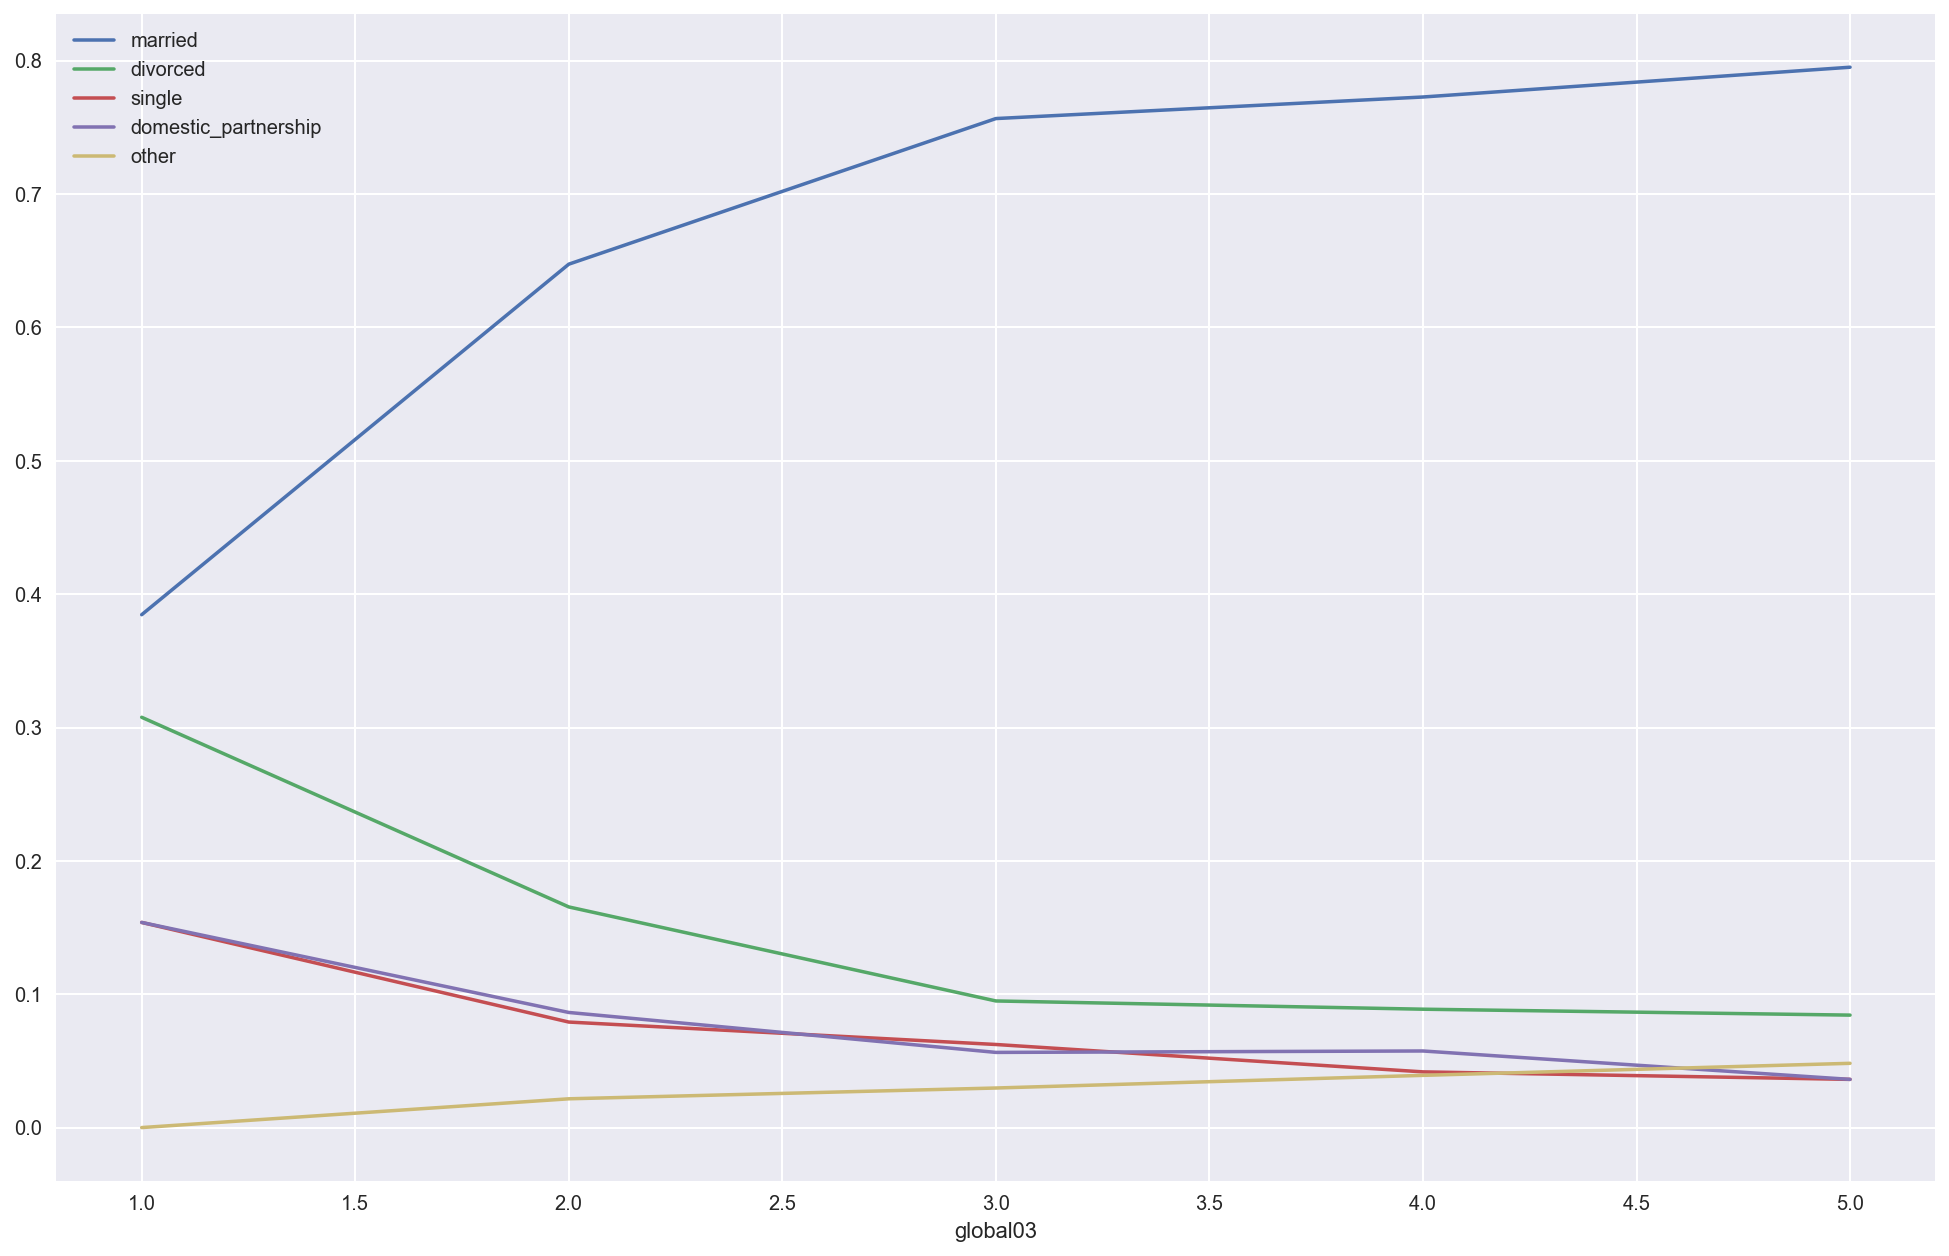

In [262]:
# Impact of marital status on on physical health
fig, ax = plt.subplots(figsize =(15,10))
df_clean_new.groupby('global03')['married', 'divorced', 'single', 'domestic_partnership', 'other'].mean().plot(kind='line', ax=ax);
plt.savefig('global_03_marital.pdf')

### Plotting

#### Height, Weight, BMI

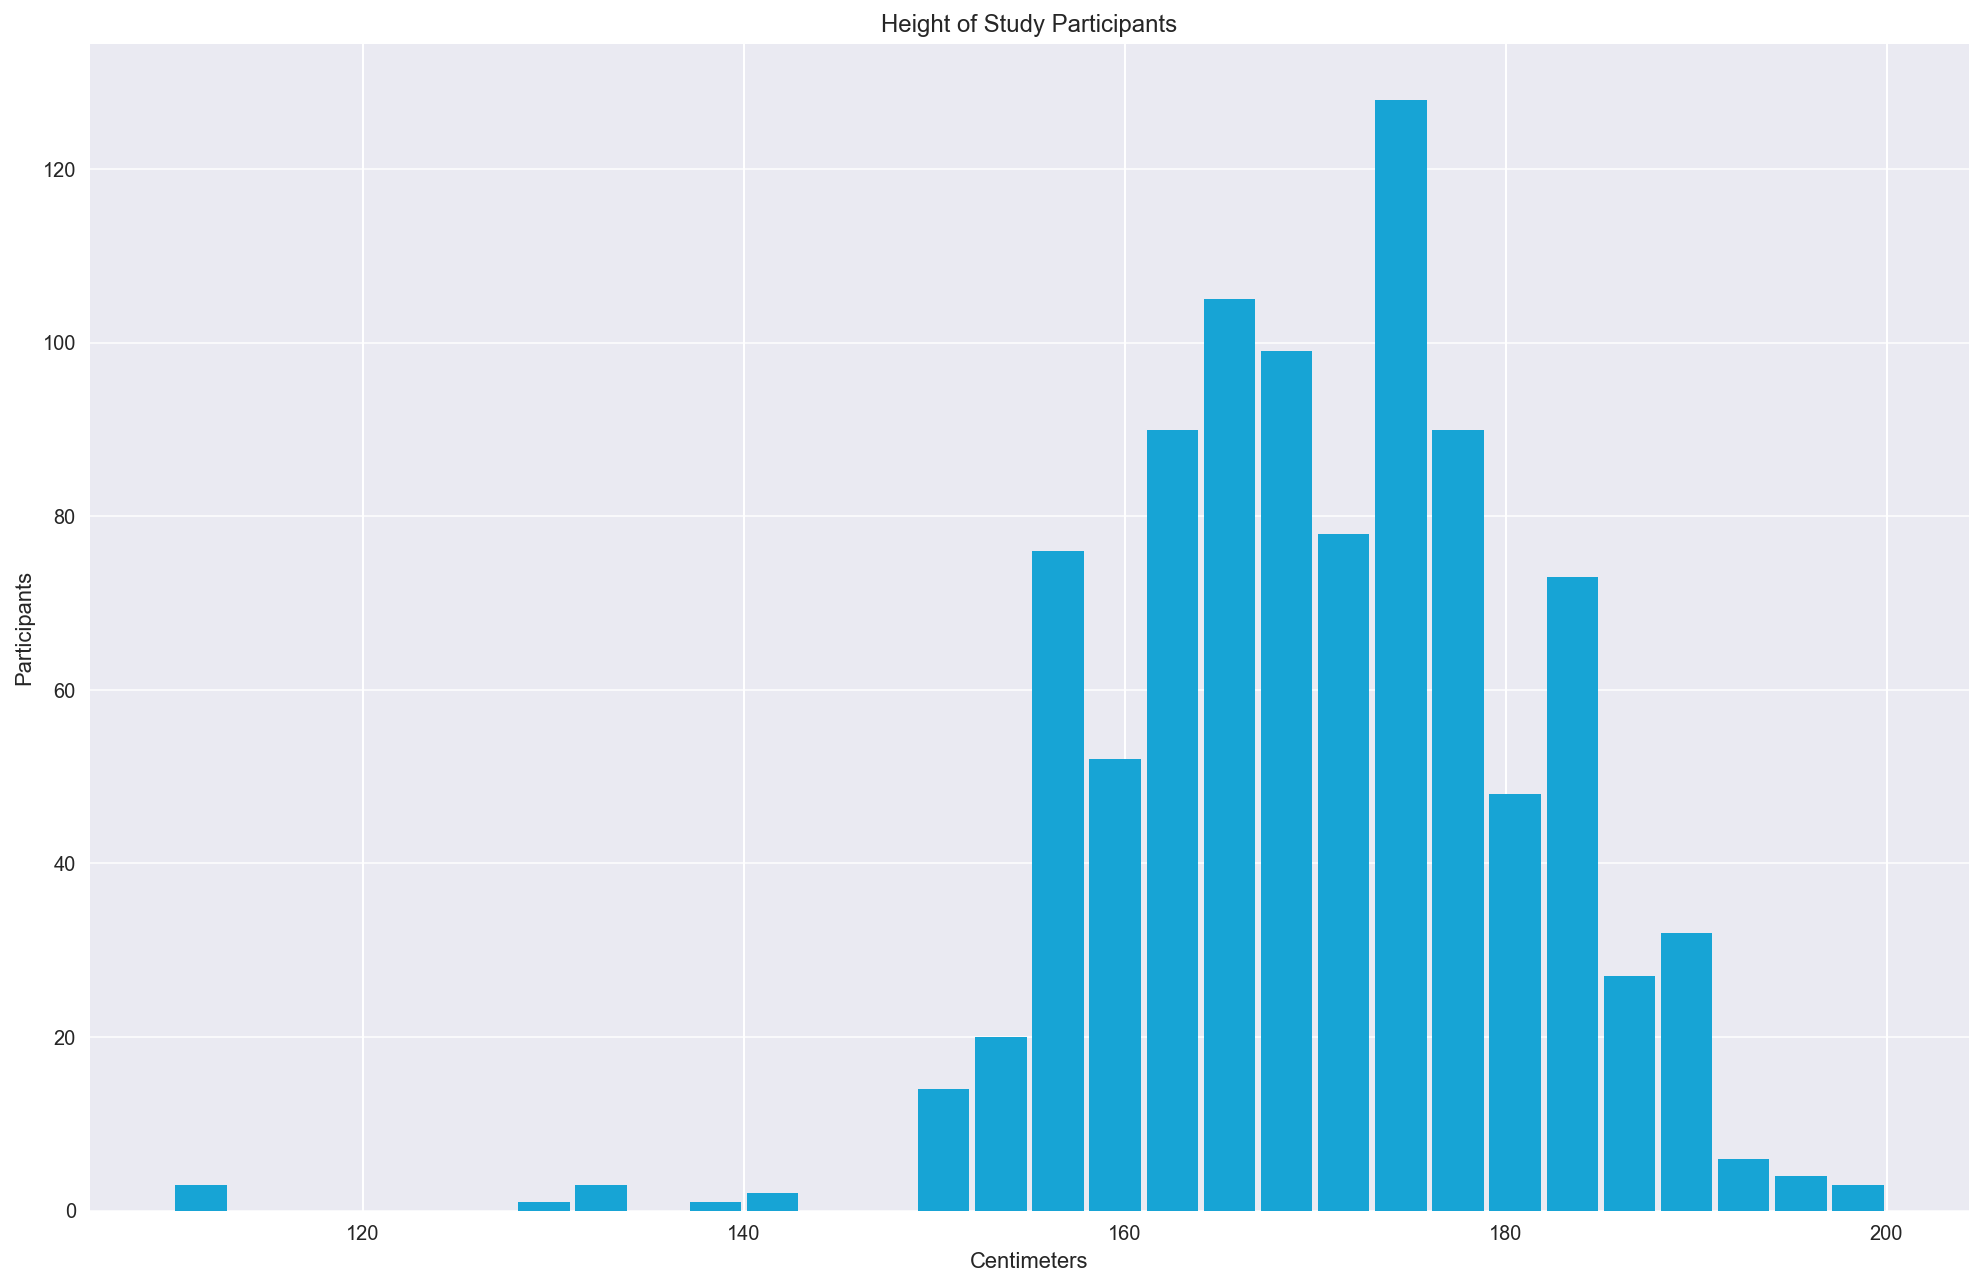

In [242]:
# Distribution of height
fig, ax = plt.subplots(figsize =(15,10))
df_clean['clean_hgt'].plot.hist(grid=True, bins=30, rwidth=0.9, color='#17a4d5', ax=ax)
plt.title('Height of Study Participants')
plt.xlabel('Centimeters')
plt.ylabel('Participants')
plt.grid(axis='y', alpha=0.75)
plt.savefig('height.pdf')

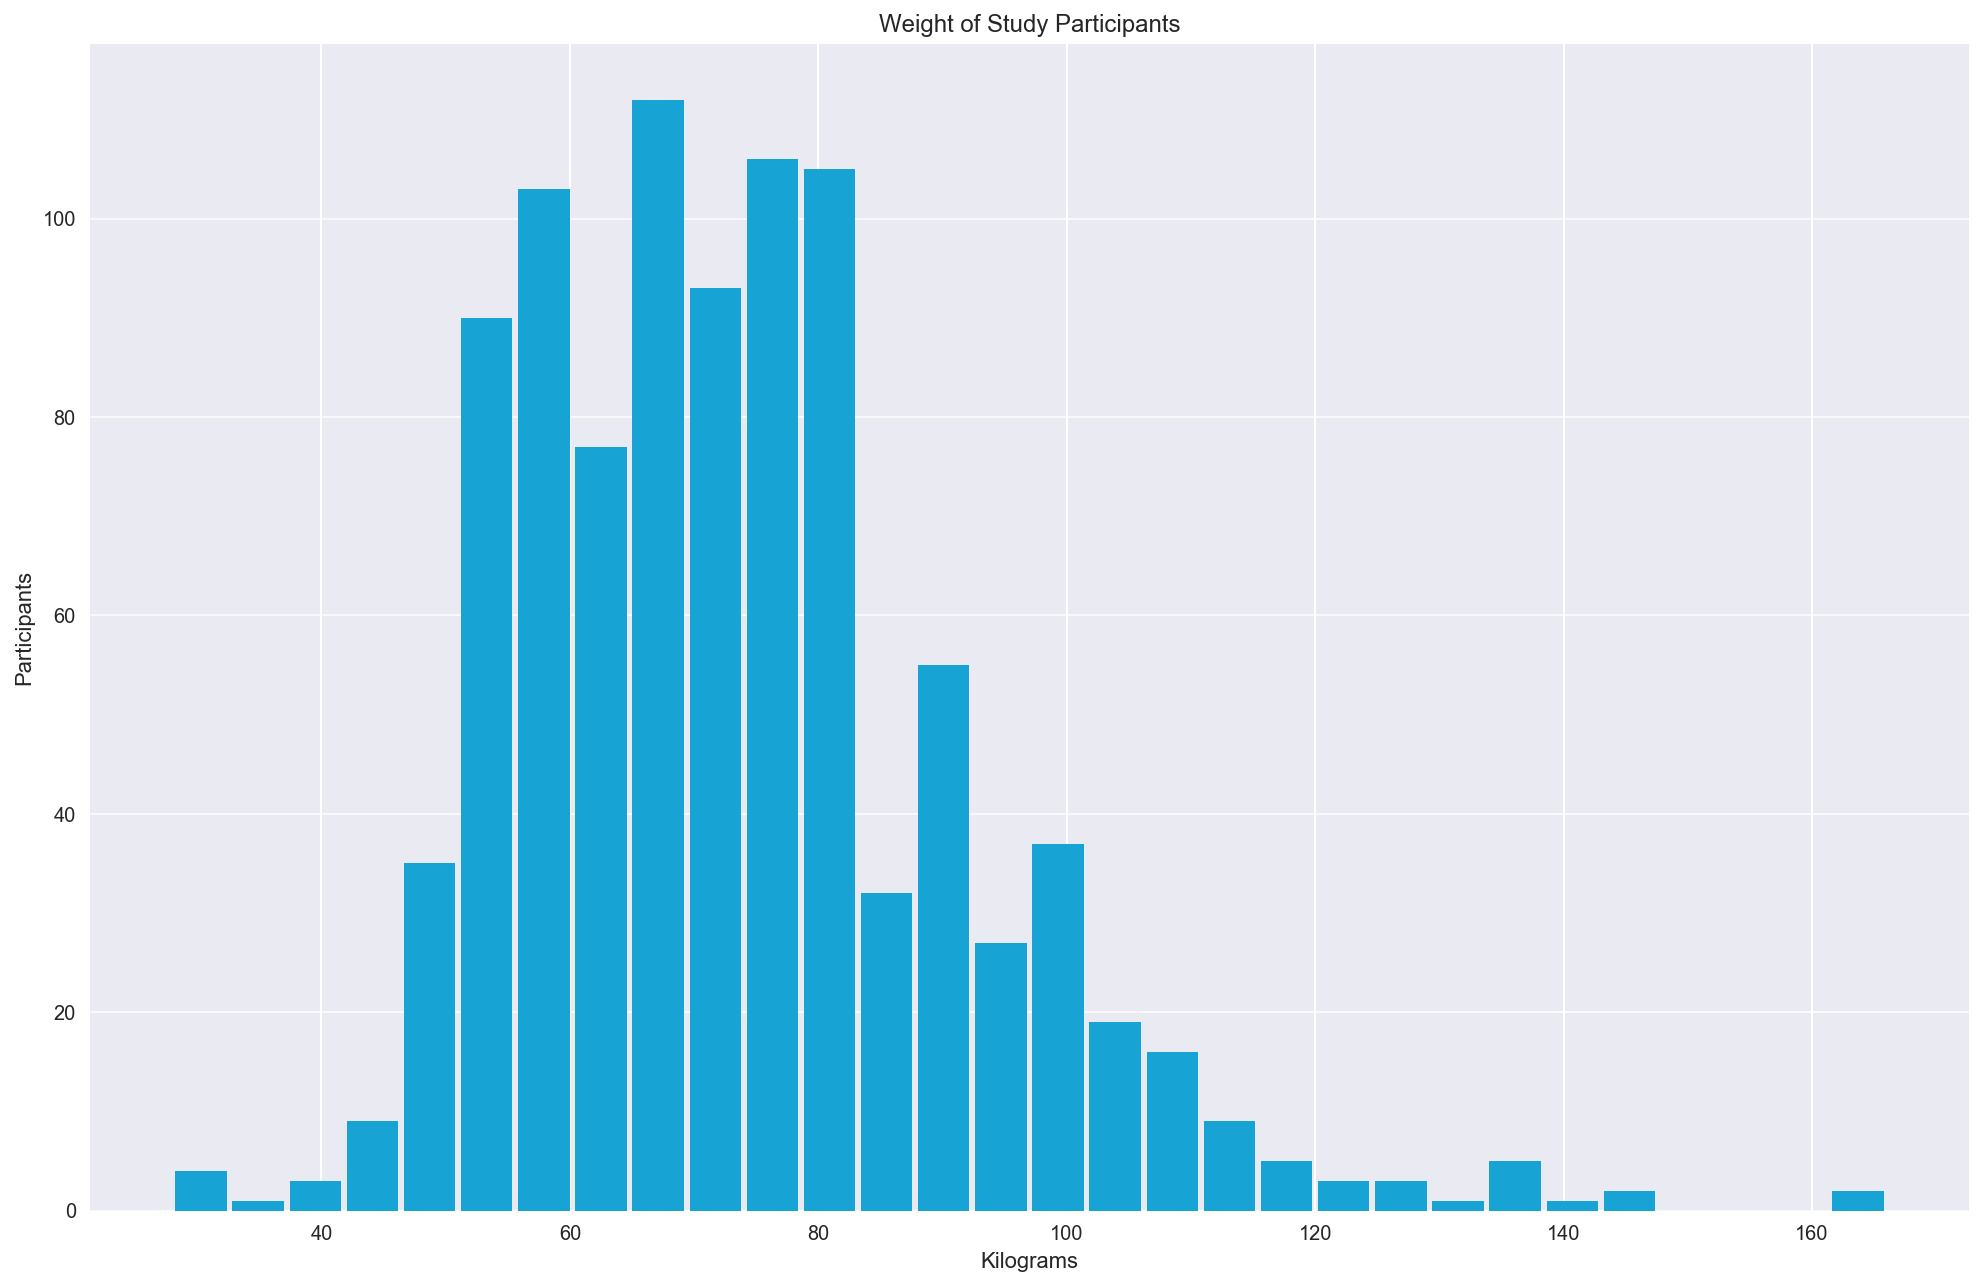

In [243]:
# Distribution of weight
fig, ax = plt.subplots(figsize =(15,10))
df_clean['clean_wgt'].plot.hist(grid=True, bins=30, rwidth=0.9, color='#17a4d5', ax=ax)
plt.title('Weight of Study Participants')
plt.xlabel('Kilograms')
plt.ylabel('Participants')
plt.grid(axis='y', alpha=0.75)
plt.savefig('weight.pdf')

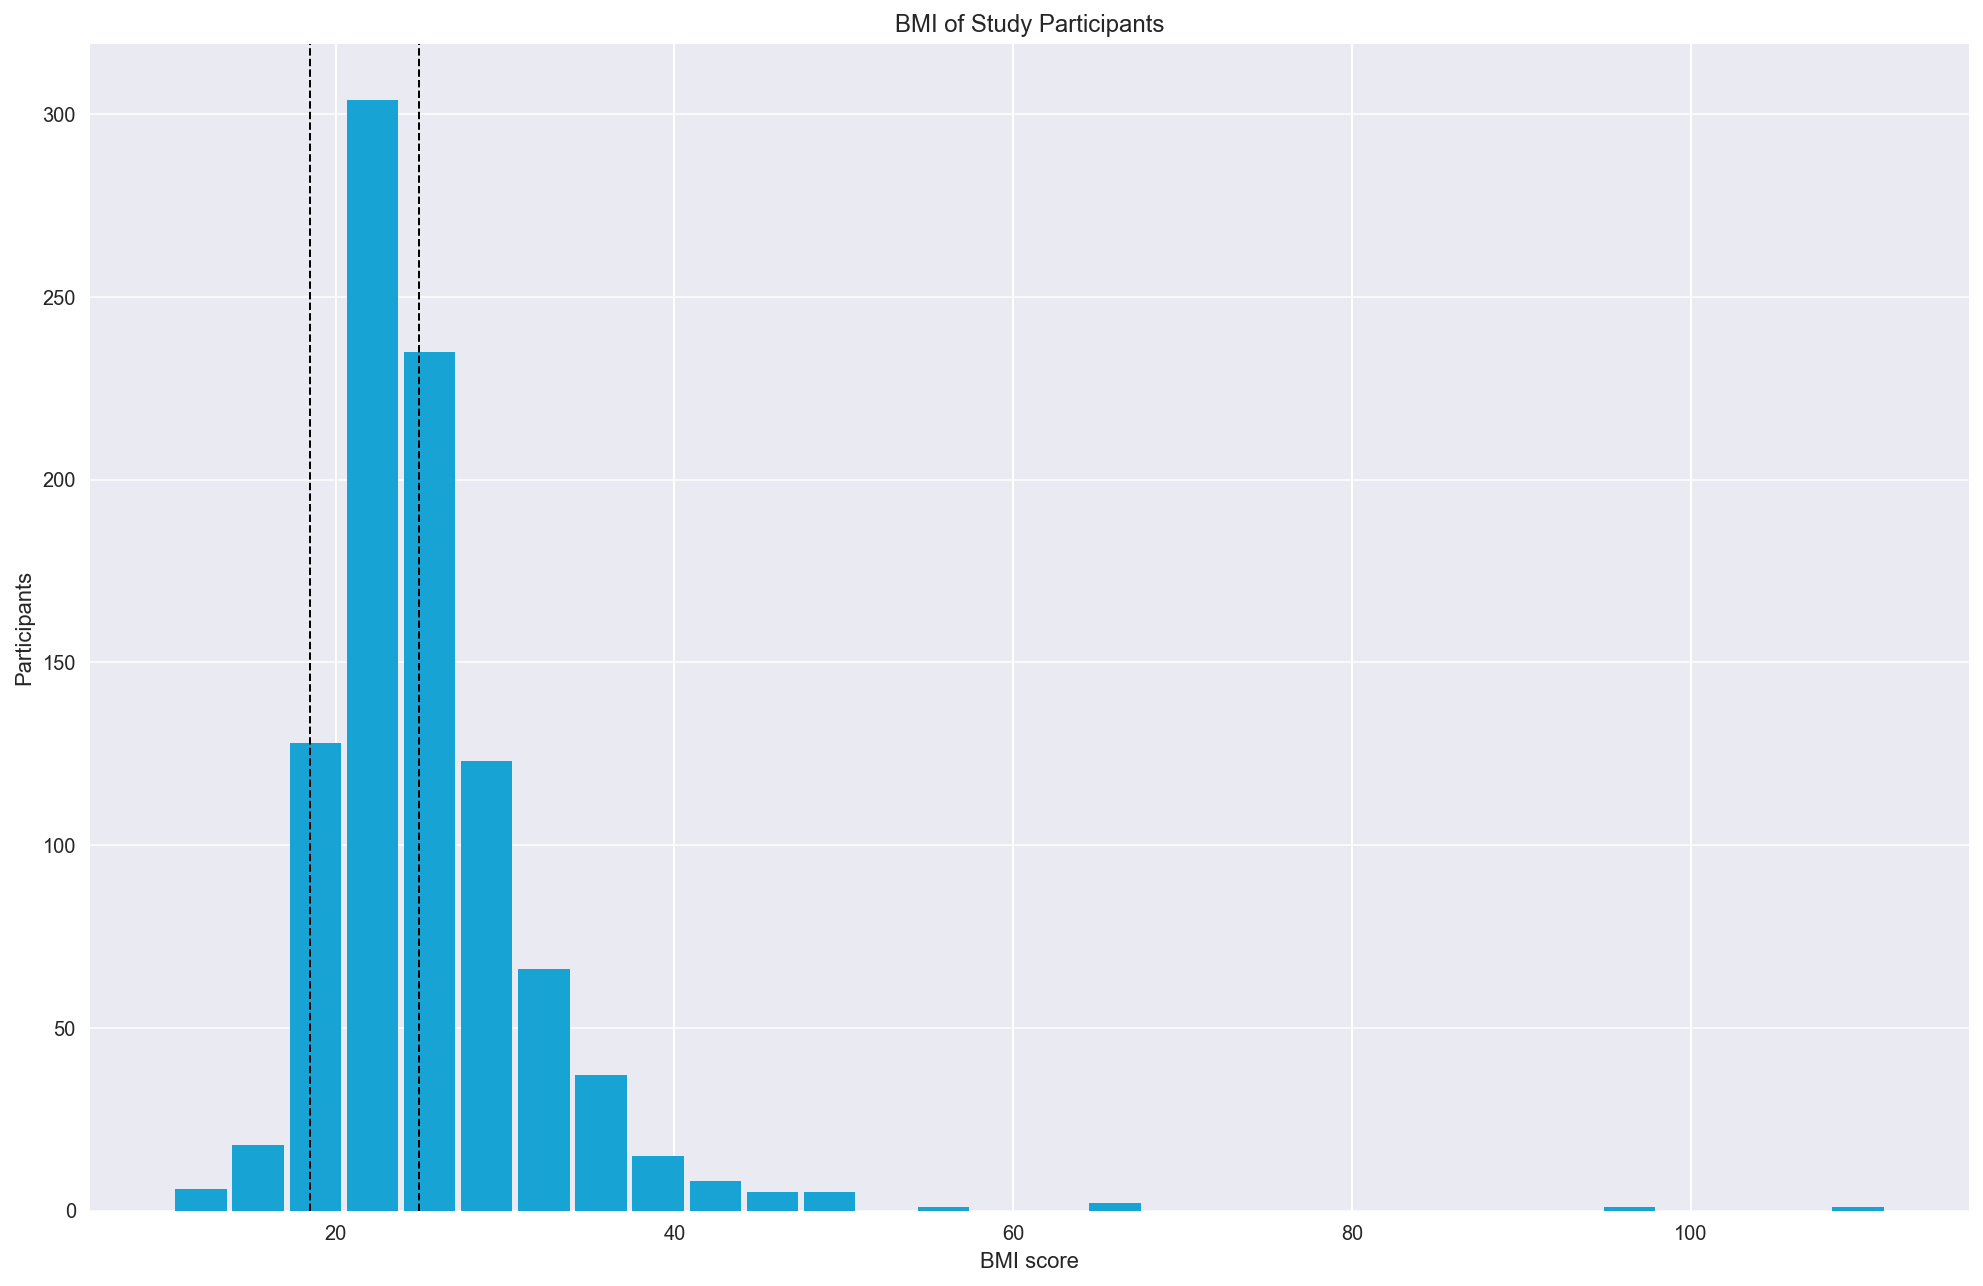

In [244]:
# BMI with dotted lines representing healthy range
fig, ax = plt.subplots(figsize =(15,10))
df_clean['BMI'].plot.hist(grid=True, bins=30, rwidth=0.9, color='#17a4d5', ax=ax)
plt.title('BMI of Study Participants')
plt.xlabel('BMI score')
plt.ylabel('Participants')
plt.grid(axis='y', alpha=0.75)
x = 18.5
x1 = 24.9
plt.axvline(x = x, color='k', linestyle='dashed', linewidth=1)
plt.axvline(x = x1, color='k', linestyle='dashed', linewidth=1);
plt.savefig('BMI.pdf')

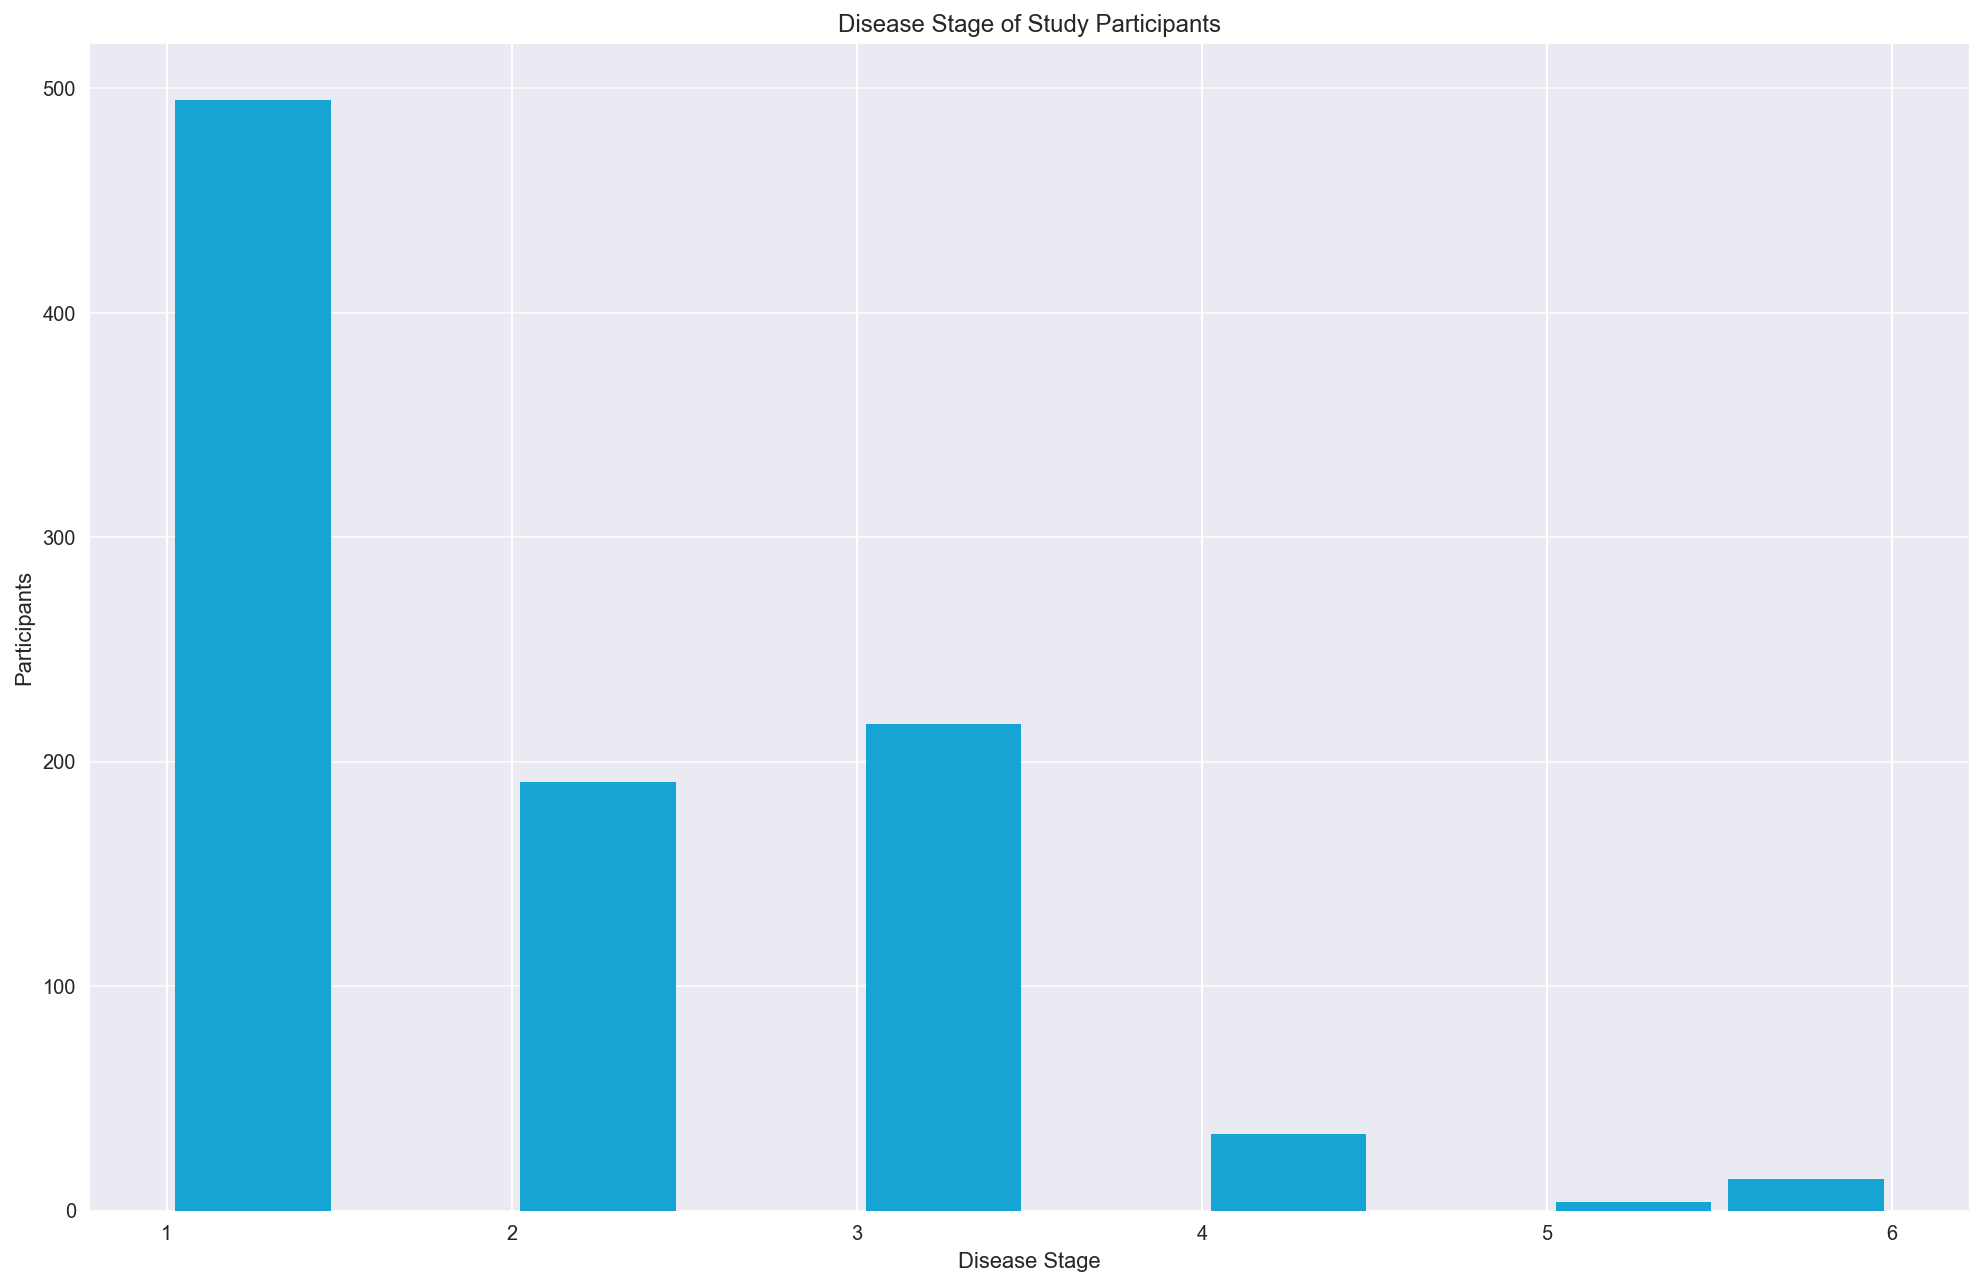

In [249]:
# Distribution of disease stage
fig, ax = plt.subplots(figsize =(15,10))
df_clean['disease_stage'].plot.hist(grid=True, bins=10, rwidth=0.9, color='#17a4d5', ax=ax)
plt.title('Disease Stage of Study Participants')
plt.xlabel('Disease Stage')
plt.ylabel('Participants')
plt.grid(axis='y', alpha=0.75)
plt.savefig('disease_stage.pdf')

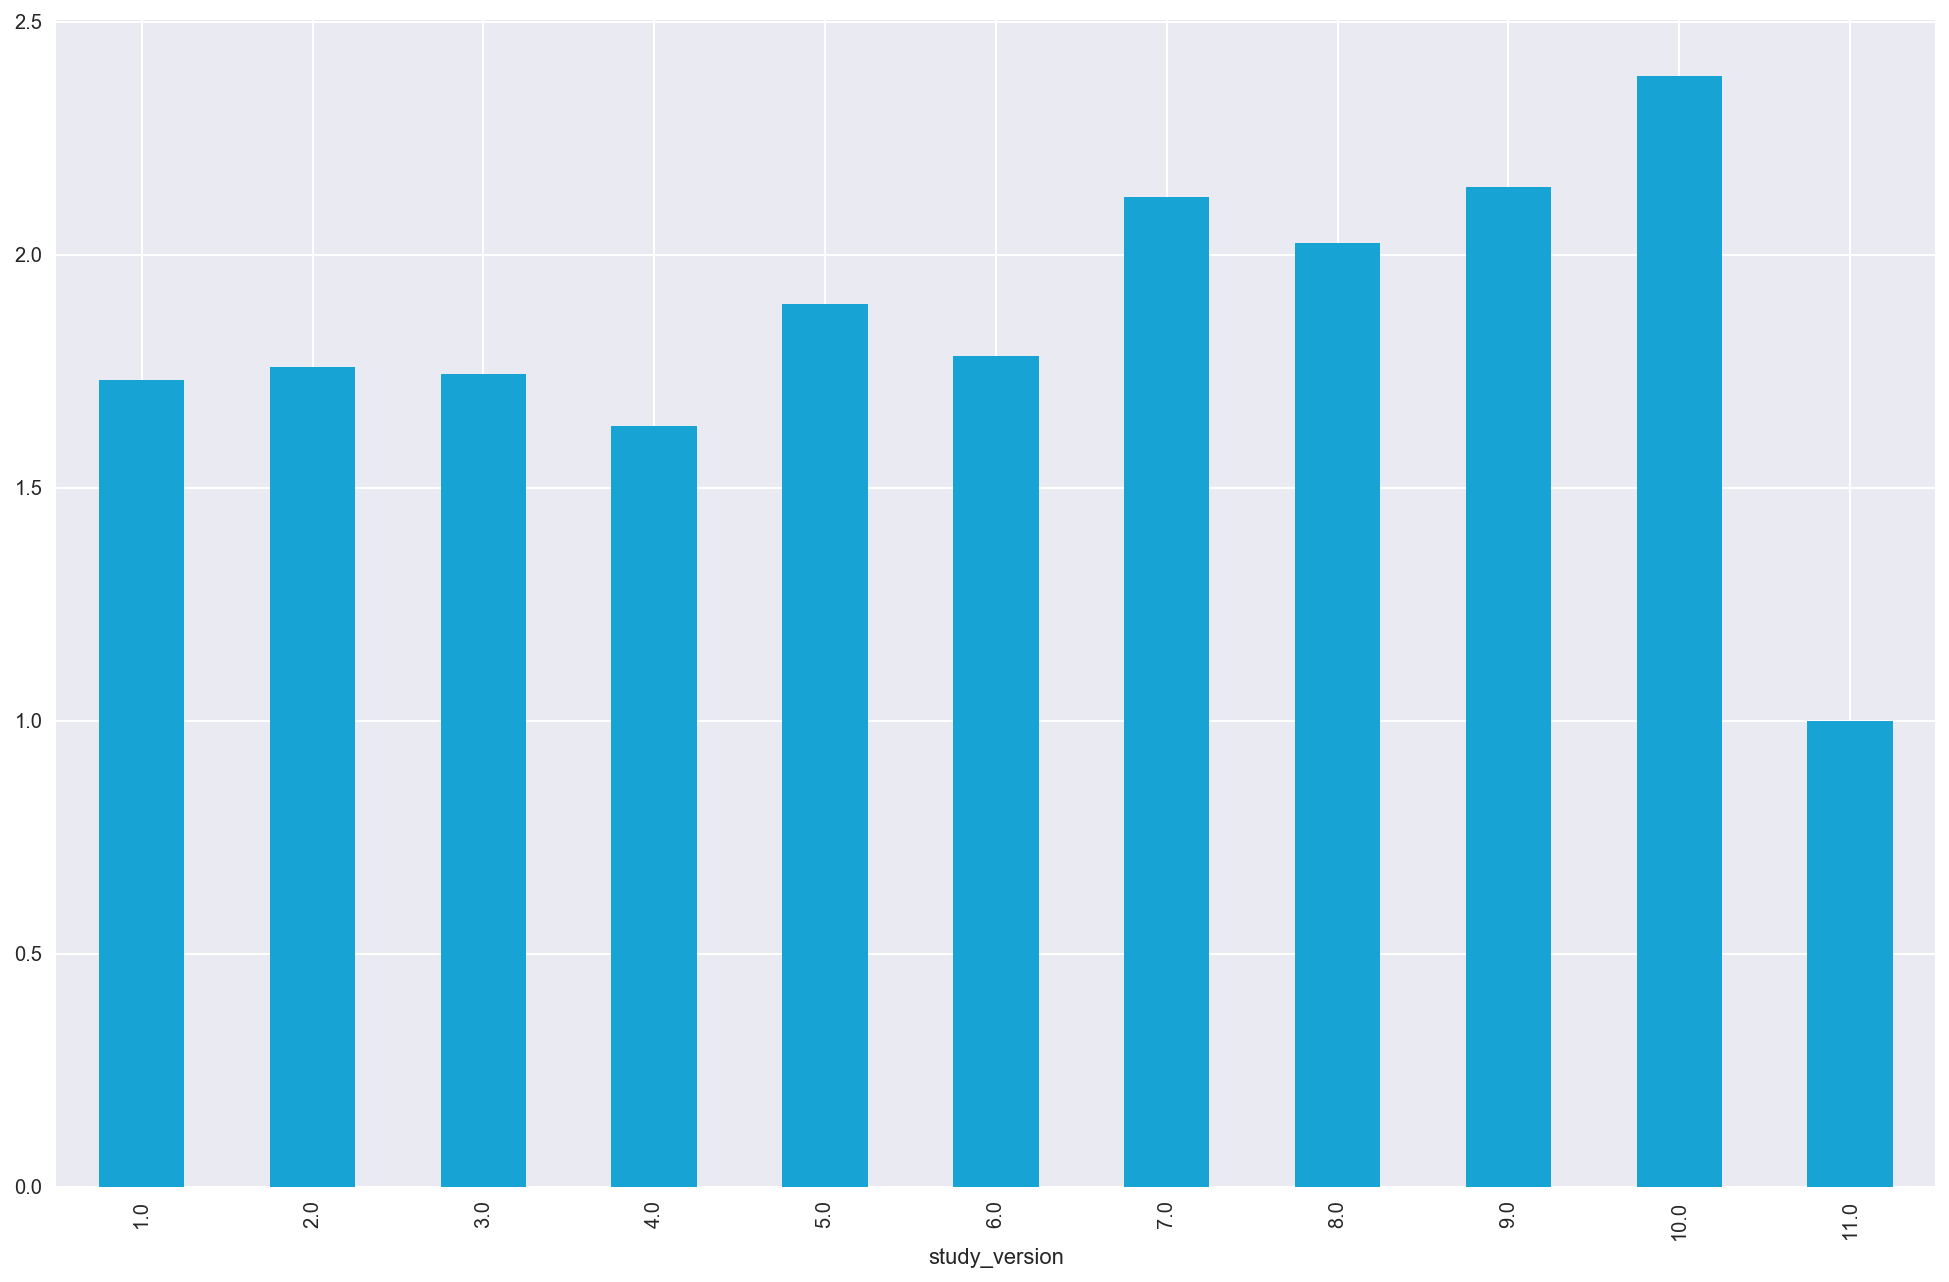

In [251]:
fig, ax = plt.subplots(figsize =(15,10))
df_clean.groupby('study_version')['disease_stage'].mean().plot(kind='bar', color ='#17a4d5', ax=ax);
plt.savefig('disease_stage_study_versions.pdf')

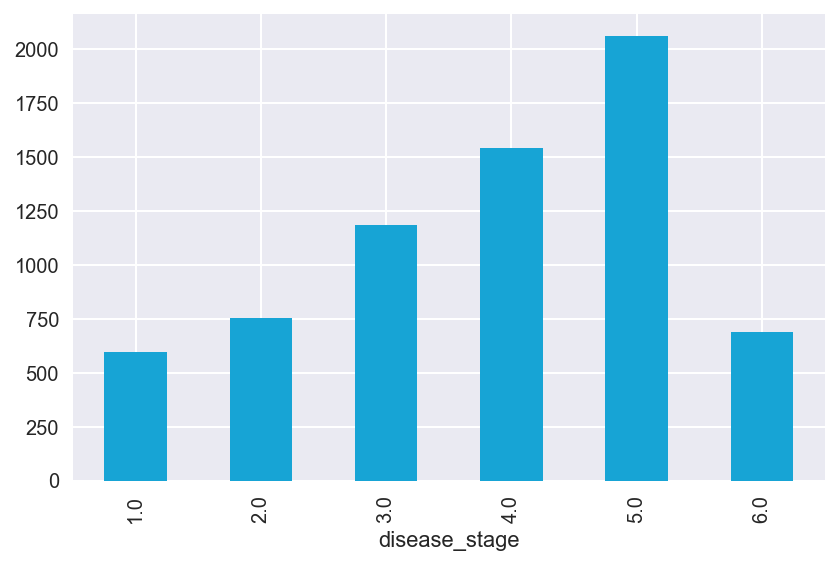

In [225]:
df_clean.groupby("disease_stage")['patient_reported_outcome'].mean().plot(kind='bar', color ='#17a4d5');

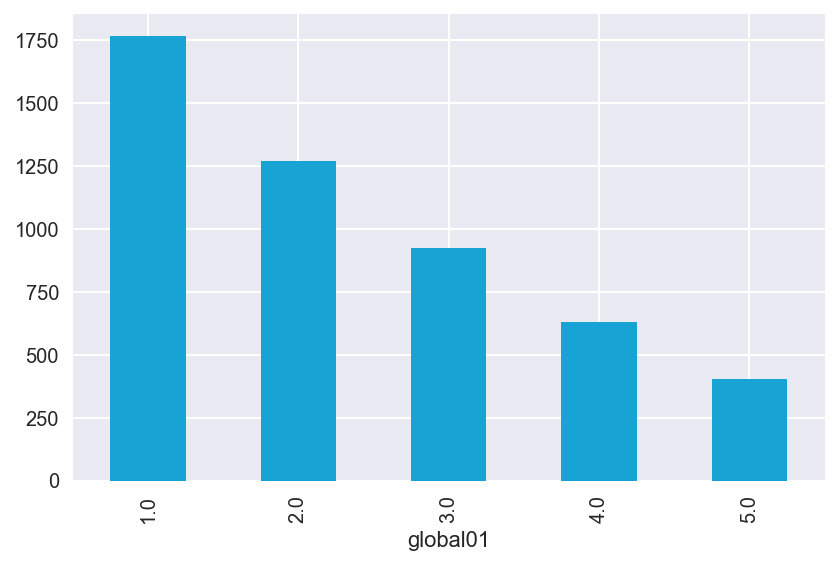

In [226]:
# compare propd patient reported outcome measure with global quality of life measure
df_clean.groupby("global01")['patient_reported_outcome'].mean().plot(kind='bar', color ='#17a4d5');

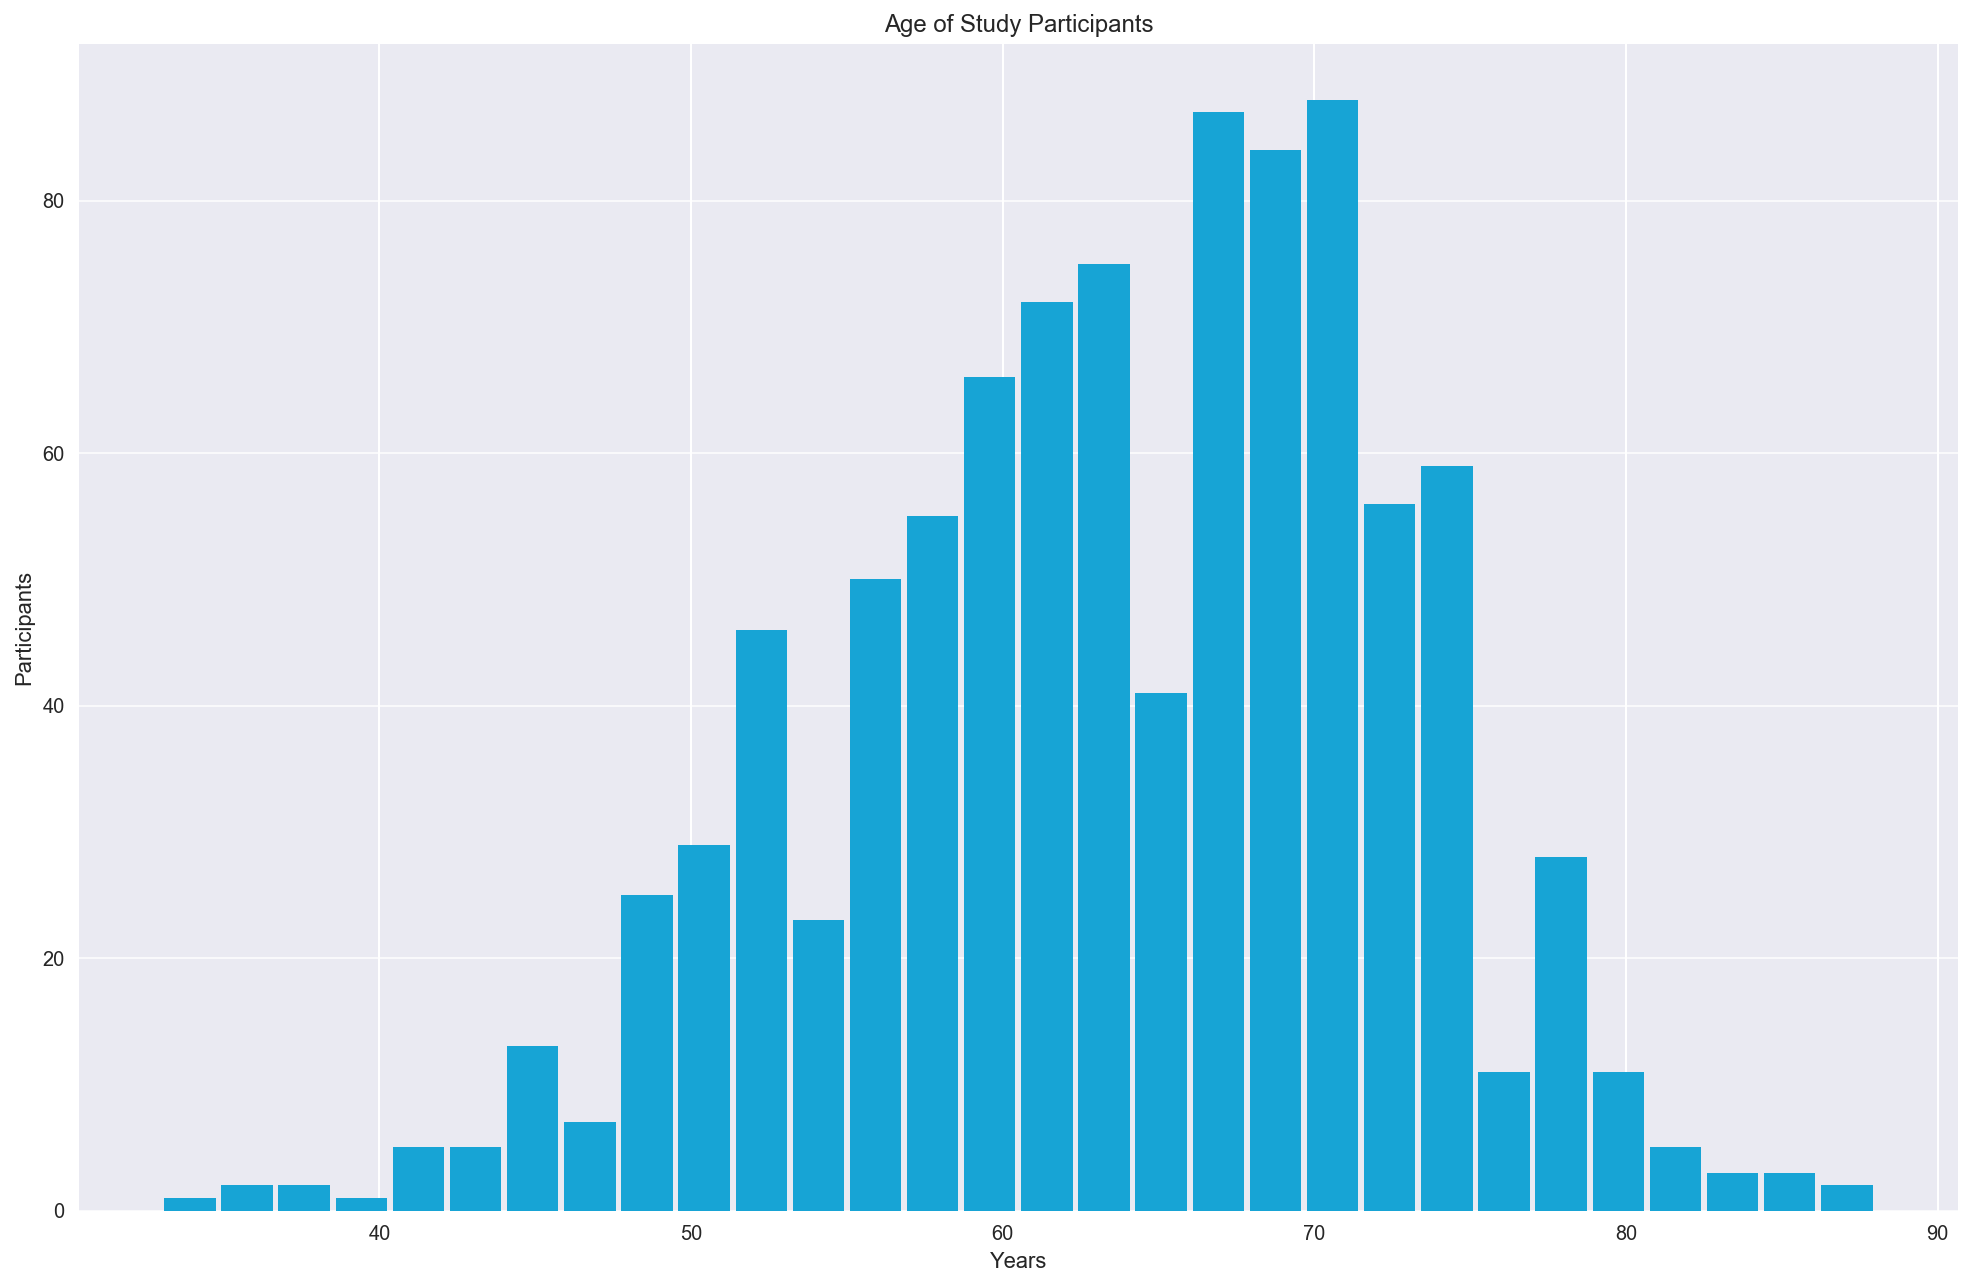

In [245]:
# Age
fig, ax = plt.subplots(figsize =(15,10))
df_clean['age'].plot.hist(grid=True, bins=30, rwidth=0.9, color='#17a4d5', ax=ax)
plt.title('Age of Study Participants')
plt.xlabel('Years')
plt.ylabel('Participants')
plt.grid(axis='y', alpha=0.75)
x = .185
x1 = .249
# plt.axvline(x = x, color='k', linestyle='dashed', linewidth=1)
# plt.axvline(x = x1, color='k', linestyle='dashed', linewidth=1);
plt.savefig('age.pdf')

In [ ]:
# fig, ax = plt.subplots(figsize =(15,10))
# df_clean.groupby('participant_id').plot(x='diagnosis_date', y='progression6mo', ax=ax, legend=False);

In [ ]:
# df_clean.groupby('participant_id').plot(x='diagnosis_date', figsize =(16,10));

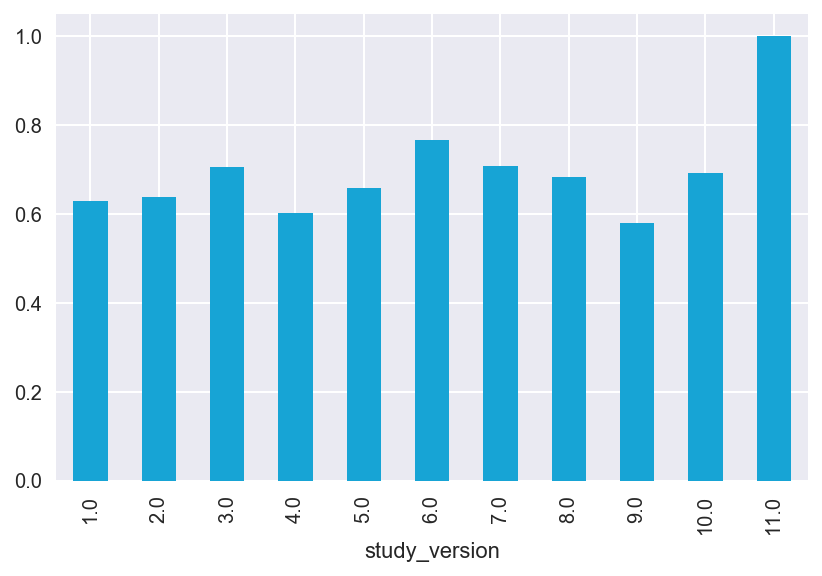

In [233]:
df_clean.groupby("study_version")['friends'].mean().plot(kind='bar', color='#17a4d5');
plt.savefig('friends_study_version.pdf')

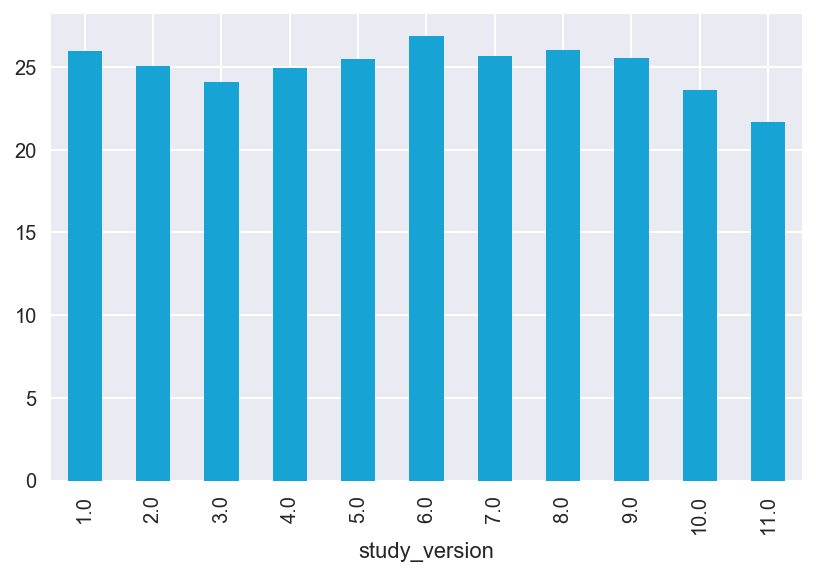

In [234]:
df_clean.groupby("study_version")['BMI'].mean().plot(kind='bar', color='#17a4d5');
plt.savefig('BMI_study_version.pdf')